In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import random as rdm
import os
np.random.seed(0)
import seaborn as sns
from scipy.optimize import linprog

In [2]:
#problem 1
Rfunc1 = np.zeros((10,10))
Rfunc1[-1][-1] = 1.0
Rfunc2 = np.zeros((10, 10))
Rfunc2[1:7,4] = -100.0
Rfunc2[1,5] = -100.0
Rfunc2[1:4,6] = Rfunc2[7:9,6] = -100.0
Rfunc2[3,7] = Rfunc2[7,7] = -100.0
Rfunc2[3:8,8] = -100.0
Rfunc2[-1][-1] = 10.0

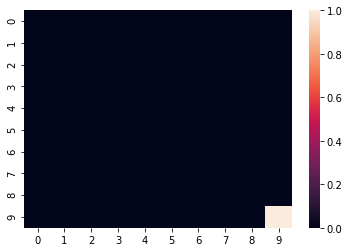

In [3]:
hm1 = sns.heatmap(Rfunc1)

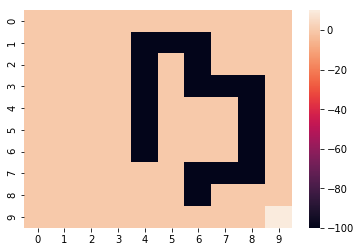

In [4]:
hm2 = sns.heatmap(Rfunc2)

In [5]:
#problem 2
width = 10
height = 10
tp = np.zeros((height * width, 5, 4)) # third dimension is direction, last denotes action
#direction to next state 0 : up 1 : right 2 : down 3 : left 4: stay
#action 0 : up 1 : right 2 : down 3 : left
w = 0.1
dx = [0, 1, 0, -1, 0]
dy = [-1, 0, 1, 0, 0]

In [6]:
def isCorner(x, y, height, width):
    return (((y == height - 1) or (y == 0)) and ((x == width - 1) or (x == 0)))
def isEdge(x, y, height, width):
    return (x == 0) or (x == height - 1) or (y == 0) or(y == width - 1)
def offGrid(x, y, height, width):
    return (x < 0) or (x >= height) or (y < 0) or(y >= width)

In [7]:
def cornerSol(x, y, tp, height, width, w):
    state = x * height + y
    for i in range(4): #action
        if(offGrid(x + dx[i], y + dy[i], height, width)):
            for j in range(4):
                if not offGrid(x + dx[j], y + dy[j], height, width):
                    tp[state][j][i] = w / 4.0
            tp[state][4][i] = 1 - w / 2.0
        else:
            for j in range(4):
                if i == j:
                    tp[state][j][i] = 1 - w + w / 4.0
                elif not offGrid(x + dx[j], y + dy[j], height, width):
                    tp[state][j][i] = w / 4.0
            tp[state][4][i] = w / 2.0
            
def edgeSol(x, y, tp, height, width, w):
    state = x * height + y
    for i in range(4): #action
        if(offGrid(x + dx[i], y + dy[i], height, width)):
            for j in range(4):
                if not offGrid(x + dx[j], y + dy[j], height, width):
                    tp[state][j][i] = w / 4.0
            tp[state][4][i] = 1 - w + w / 4.0
        else:
            for j in range(4):
                if i == j:
                    tp[state][j][i] = 1 - w + w / 4.0
                elif not offGrid(x + dx[j], y + dy[j], height, width):
                    tp[state][j][i] = w / 4.0
            tp[state][4][i] = w / 4.0   
            
def innerSol(x, y, tp, height, width, w):
    state = x * height + y
    for i in range(4): # atcion
        for j in range(4):
            if i == j:
                tp[state][j][i] = 1 - w + w / 4.0
            else:
                tp[state][j][i] = w / 4.0

In [8]:
w = 0.1
for i in range(height * width): #calculate transition prob
    x = i // height
    y = i % height
    if isCorner(x, y, height, width):
        cornerSol(x, y, tp, height, width, w)
    elif isEdge(x, y, height, width):
        edgeSol(x, y, tp, height, width, w)
    else:
        innerSol(x, y, tp, height, width, w)

In [73]:
def calStateValue(state, tp, Rfunc, Vs, discount):
    value = np.zeros(4)
    x = state // height
    y = state % height
    for action in range(4):
        for i in range(5):
            x1 = x + dx[i]
            y1 = y + dy[i]
            if offGrid(x1, y1, height, width):
                continue
            state1 = x1 * height + y1
            value[action] += tp[state][i][action] * (Rfunc[y1][x1] + discount * Vs[state1])
    return value
def calVs(Vs, tp, Rfunc, discount, theta):
    while True:
        delta = 0.0
        for s in range(width * height):
            actionValue = calStateValue(s, tp, Rfunc, Vs, discount)
            maxActionValue = max(actionValue)
            delta = max(np.abs(maxActionValue - Vs[s]), delta)
            Vs[s] = maxActionValue
        if delta < theta:
            break
def calVs_new(Vs, tp, Rfunc, discount, theta):
    while True:
        delta = 0.0
        Vs_new = Vs.copy()
        for s in range(width * height):
            actionValue = calStateValue(s, tp, Rfunc, Vs, discount)
            maxActionValue = max(actionValue)
            delta = max(np.abs(maxActionValue - Vs[s]), delta)
            Vs_new[s] = maxActionValue
            #print(delta)
        if delta < theta:
            Vs = Vs_new.copy()
            return Vs
            print(Vs)
        
        Vs = Vs_new.copy()

In [10]:
Vs1 = np.zeros(height * width)
discount = 0.8
theta = 0.01
# calVs(Vs1, tp, Rfunc1, discount, theta) #calculate state value for each state
Vs1 = calVs_new(Vs1, tp, Rfunc1, discount, theta)

In [11]:
from tabulate import tabulate

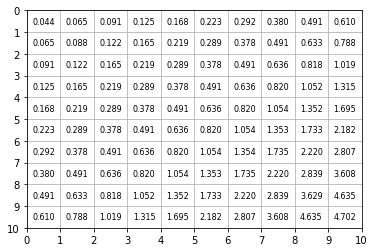

In [12]:
Vs1_2d = Vs1.reshape((height, width))
#print(tabulate(Vs1_2d.T,  tablefmt='fancy_grid'))
fig = plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, width + 1, 1))
ax.set_yticks(np.arange(0, height + 1, 1))
for j in range(width):
    for i in range(height):
        plt.text(i + 0.5, j + 0.5, '%.3f' %Vs1_2d[i][j], horizontalalignment = 'center', verticalalignment = 'center', fontsize = 8, color='black')
plt.grid()
plt.show()

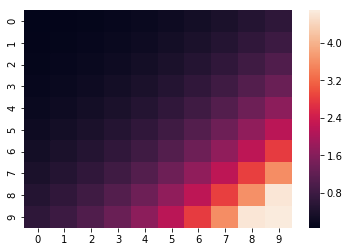

In [13]:
#problem 3
hm3 = sns.heatmap(Vs1_2d.T)

In [14]:
#problem 5
arrows = ['↑','→','↓','←']
def calOptimalAction(optimalAction, tp, Rfunc, Vs, discount):
    for s in range(height * width):
        actionValue = calStateValue(s, tp, Rfunc, Vs, discount)
        optimal = np.argmax(actionValue)
        optimalAction[s] = optimal
def action2Arrow(action, arrows):
    ll = [1, 0, 3, 2]
    return [ll[int(i)] for i in action]

In [15]:
optimalAction1 = np.zeros(height * width)
calOptimalAction(optimalAction1, tp, Rfunc1, Vs1, discount)

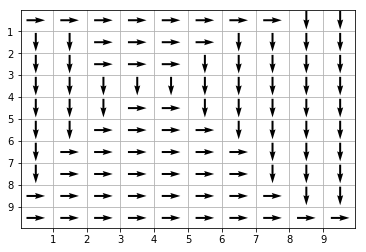

In [16]:
#optimalAction1_2d = optimalAction1.reshape((height, width))
arrows1 = action2Arrow(optimalAction1, arrows)
path1 = np.array(arrows1).reshape((height,width)).T
X = np.arange(0.5, height, 1)
Y = np.arange(0.5, width, 1)
U = np.cos(path1 * np.pi / 2)
V = np.sin(path1 * np.pi / 2)
plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, width + 1, 1))
ax.set_yticks(np.arange(0, height + 1, 1))
plt.quiver(X,Y,U,V,units='x',pivot='mid')
plt.grid()
plt.show()

In [17]:
#problem 6
Vs2 = np.zeros(height * width)
# calVs(Vs2, tp, Rfunc2, discount, theta)#calculate state value for each state
Vs2 = calVs_new(Vs2, tp, Rfunc2, discount, theta)

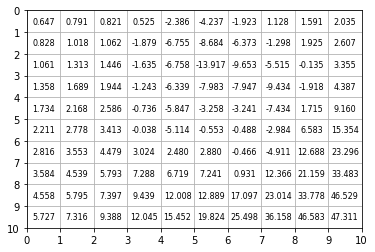

In [18]:
Vs2_2d = Vs2.reshape((height, width))
fig = plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, width + 1, 1))
ax.set_yticks(np.arange(0, height + 1, 1))
for j in range(width):
    for i in range(height):
        plt.text(i + 0.5, j + 0.5, '%.3f' %Vs2_2d[i][j], horizontalalignment = 'center', verticalalignment = 'center', fontsize = 8, color='black')
plt.grid()
plt.show()

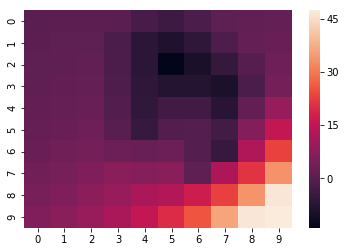

In [19]:
#problem 7
hm4 = sns.heatmap(Vs2_2d.T)

In [20]:
#problem 9
optimalAction2 = np.zeros(height * width)
calOptimalAction(optimalAction2, tp, Rfunc2, Vs2, discount)

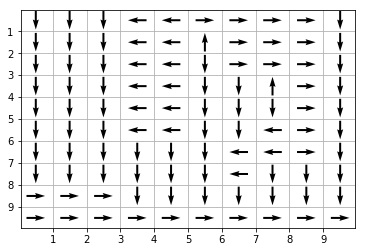

In [21]:
optimalAction2_2d = optimalAction2.reshape((height, width))
arrows2 = action2Arrow(optimalAction2, arrows)
path2 = np.array(arrows2).reshape((height,width)).T
X = np.arange(0.5, height, 1)
Y = np.arange(0.5, width, 1)
U = np.cos(path2 * np.pi / 2)
V = np.sin(path2 * np.pi / 2)
plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, width + 1, 1))
ax.set_yticks(np.arange(0, height + 1, 1))
plt.quiver(X,Y,U,V,units='x',pivot='mid')
plt.grid()
plt.show()

# IRL #

In [22]:
def tp2tpm(height, width, tp):
    tpm = np.zeros((height * width, 4, height * width))
    for s in range(tp.shape[0]):
        x = s // height
        y = s % height
        for action in range(tp.shape[2]):
            for i in range(tp.shape[1]):
                x1 = x + dx[i]
                y1 = y + dy[i]
                if not offGrid(x1, y1, height, width):
                    s1 = x1 * height + y1
                    tpm[s][action][s1] = tp[s][i][action]
    return tpm

In [51]:
def print_path(path):
    X = np.arange(0.5, height, 1)
    Y = np.arange(0.5, width, 1)
    U = np.cos(path * np.pi / 2)
    V = np.sin(path * np.pi / 2)
    plt.figure()
    ax = plt.gca()
    ax.invert_yaxis()
    ax.set_xticks(np.arange(0, width + 1, 1))
    ax.set_yticks(np.arange(0, height + 1, 1))
    plt.quiver(X,Y,U,V,units='x',pivot='mid')
    plt.grid()
    plt.show()

In [23]:
def calculate_LP_D(a, s, policy, gamma, tp):
    # (Pa1 −Pa)(I−γPa1)−1
#     print(tp.shape)
    return np.dot(tp[int(policy[s]), s] - tp[a, s], np.linalg.inv(np.eye(100) - gamma*tp[int(policy[s])]))

In [74]:
def calculate_accuracy(n_states, ground_truth, extracted_reward):
    Vs = np.zeros(100)
    discount = 0.8
    theta = 0.01
    er = np.zeros([10,10])
    for s in range(100):
        y = int(s / height)
        x = int(s % height)
        er[x,y] = extracted_reward[s]
#     calVs(Vs, tp, er, discount, theta)
    Vs = calVs_new(Vs, tp, er, discount, theta)
    optimalAction = np.zeros(height * width)
    calOptimalAction(optimalAction, tp, er, Vs, discount)
    count = 0
    for i in range(n_states):
        if ground_truth[i] == optimalAction[i]:
            count += 1
    return float(count)/float(n_states)

In [25]:
#Question 11:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import solvers,matrix
lamda_list = np.linspace(0,5,500)
A = {0,1,2,3}
n_actions = 4
n_states = 100
gamma = 0.8
tpm = tp2tpm(height, width, tp)
# print(tpm.shape)
transition_probability = np.transpose(tpm, (1, 0, 2))
Rmax1 = 0.0
for i in range(0,10):
    for j in range(0,10):
        Rmax1 = max(Rmax1, abs(Rfunc1[i,j]))   
Rmax2 = 0.0
for i in range(0,10):
    for j in range(0,10):
        Rmax2 = max(Rmax2, abs(Rfunc2[i,j]))  

In [26]:
def normalize(vals):
    min_val = np.min(vals)
    max_val = np.max(vals)
    return (vals - min_val) / (max_val - min_val)

In [27]:
def perform_IRL_4Attrs(optimalAction, transition_probability, Rmax, lamda_list):
    accuracy = []
    for lamda in lamda_list:
        n_states = 100
        policy = optimalAction
        C = -np.hstack([np.zeros(100), np.ones(100), -lamda*np.ones(100), np.zeros(100)]) 
#         print(C.shape)   
#         print(A - {policy[1]})
        T_stack = np.vstack([
                calculate_LP_D(a, s, policy, gamma, transition_probability)
                for s in range(n_states)
                for a in A - {policy[s]}
            ])
        one_stack = np.vstack([
                np.eye(1, n_states, s)
                for s in range(n_states)
                for a in A - {policy[s]}
            ])
        # X = [R, T, U, M]
        # (Pa1 −Pa)(I−γPa1)−1 * R >= T => -(Pa1 −Pa)(I−γPa1)−1 * R <= -T => -(Pa1 −Pa)(I−γPa1)−1 * R + T <= 0
        D_0 = np.hstack([-T_stack, one_stack,np.zeros((300,100)),np.zeros((300,100))])
        # (Pa1 −Pa)(I−γPa1)−1 * R >= 0 => -(Pa1 −Pa)(I−γPa1)−1 * R <= 0
        D_1 = np.hstack([-T_stack, np.zeros((300,100)),np.zeros((300,100)),np.zeros((300,100))])
        # R <= u and R >= -u => R-u<=0 and -R-u <=0
        D_2 = np.hstack([np.eye(n_states),np.zeros((100,100)),-np.eye(n_states),np.zeros((100,100))])
        D_3 = np.hstack([-np.eye(n_states),np.zeros((100,100)),-np.eye(n_states),np.zeros((100,100))])
        # R <= Rmax and R >= -Rmax => R - Rmax <=0 and -R - Rmax <=0
        D_4 = np.hstack([np.eye(n_states), np.zeros((100,100)), np.zeros((100,100)), -np.eye(n_states)])
        D_5 = np.hstack([-np.eye(n_states), np.zeros((100,100)), np.zeros((100,100)), -np.eye(n_states)])

        D = np.vstack([D_0, D_1, D_2, D_3, D_4, D_5])
        d = matrix(D)
        B = np.zeros((1000,1))
        b = matrix(B)
        c = matrix(C)
        results = solvers.lp(c, d, b)
        r = np.asarray(results["x"][:n_states], dtype=np.double)
        # print(r)
        res = r.reshape((n_states,))
#         print(res)
        temp_acc = calculate_accuracy(100, optimalAction, res)
        print(temp_acc)
        accuracy.append(temp_acc)
    return {'accuracy':accuracy, 'reward': res}

In [75]:
def perform_IRL_3Attrs(policy, transition_probability, Rmax, lamda_list):
    accuracy = []
    for lamda in lamda_list:
        n_states = 100
        C = -np.hstack([np.zeros(100), np.ones(100), -lamda*np.ones(100)]) 
#         print(C)
#         print(C.shape)   
#         print(A - {policy[1]})
        T_stack = np.vstack([
                calculate_LP_D(a, s, policy, gamma, transition_probability)
                for s in range(n_states)
                for a in A - {policy[s]}
            ])
        one_stack = np.vstack([
                np.eye(1, n_states, s)
                for s in range(n_states)
                for a in A - {policy[s]}
            ])
        # X = [R, T, U, RMax]
        # (Pa1 −Pa)(I−γPa1)−1 * R >= T => -(Pa1 −Pa)(I−γPa1)−1 * R <= -T => -(Pa1 −Pa)(I−γPa1)−1 * R + T <= 0
        D_0 = np.hstack([-T_stack, one_stack,np.zeros((300,100))])
        # (Pa1 −Pa)(I−γPa1)−1 * R >= 0 => -(Pa1 −Pa)(I−γPa1)−1 * R <= 0
        D_1 = np.hstack([-T_stack, np.zeros((300,100)),np.zeros((300,100))])
        # R <= u and R >= -u => R-u<=0 and -R-u <=0
        D_2 = np.hstack([np.eye(n_states),np.zeros((100,100)),-np.eye(n_states)])
        D_3 = np.hstack([-np.eye(n_states),np.zeros((100,100)),-np.eye(n_states)])
        # R <= Rmax and R >= -Rmax => R - Rmax <=0 and -R - Rmax <=0
        D_4 = np.hstack([np.eye(n_states), np.zeros((100,100)), np.zeros((100,100))])
        D_5 = np.hstack([-np.eye(n_states), np.zeros((100,100)), np.zeros((100,100))])

        D = np.vstack([D_0, D_1, D_2, D_3, D_4, D_5])        
        d = matrix(D)
        b = np.zeros((800, 1))
        b_bounds = np.vstack([Rmax*np.ones((n_states, 1))]*2)
        b = np.vstack((b, b_bounds))
        b = matrix(b)
        c = matrix(C)
        results = solvers.lp(c, d, b)
        r = np.asarray(results["x"][:n_states], dtype=np.double)
        # print(r)
        res = r.reshape((n_states,))
#         print(res)
        temp_acc = calculate_accuracy(100, policy, res)
        print(temp_acc)
        accuracy.append(temp_acc)
    return {'accuracy':accuracy, 'reward': res}

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.1131e+01 -1.0568e+02  4e+02  7e-01  5e+00  1e+00
 2: -2.0338e+01 -7.9226e+01  3e+02  5e-01  3e+00  7e-01
 3: -3.0467e+01 -5.9163e+01  1e+02  2e-01  2e+00  3e-01
 4: -3.6246e+01 -4.7375e+01  5e+01  9e-02  6e-01  1e-01
 5: -3.8451e+01 -4.4914e+01  3e+01  5e-02  4e-01  6e-02
 6: -3.9938e+01 -4.2943e+01  1e+01  2e-02  2e-01  3e-02
 7: -4.1140e+01 -4.2248e+01  5e+00  9e-03  6e-02  6e-03
 8: -4.1676e+01 -4.2245e+01  2e+00  4e-03  3e-02  3e-03
 9: -4.2008e+01 -4.2214e+01  9e-01  2e-03  1e-02  1e-03
10: -4.1997e+01 -4.2183e+01  8e-01  1e-03  1e-02  9e-04
11: -4.2097e+01 -4.2143e+01  2e-01  4e-04  3e-03  2e-04
12: -4.2109e+01 -4.2138e+01  1e-01  2e-04  2e-03  1e-04
13: -4.2122e+01 -4.2132e+01  4e-02  8e-05  5e-04  4e-05
14: -4.2124e+01 -4.2130e+01  3e-02  5e-05  3e-04  3e-05
15: -4.2125e+01 -4.2129e+01  2e-02  3e-05  2e-04  2e-05
16: -4.2124e+01 -4.2128e+01  2e-02  3e-05  2e-04  

17: -3.7861e+01 -3.7868e+01  3e-02  5e-05  4e-04  3e-05
18: -3.7861e+01 -3.7867e+01  2e-02  5e-05  3e-04  2e-05
19: -3.7862e+01 -3.7866e+01  2e-02  3e-05  2e-04  2e-05
20: -3.7862e+01 -3.7866e+01  1e-02  3e-05  2e-04  1e-05
21: -3.7863e+01 -3.7864e+01  5e-03  9e-06  6e-05  4e-06
22: -3.7863e+01 -3.7864e+01  2e-03  4e-06  3e-05  2e-06
23: -3.7864e+01 -3.7864e+01  7e-04  1e-06  9e-06  7e-07
24: -3.7864e+01 -3.7864e+01  2e-04  3e-07  2e-06  1e-07
25: -3.7864e+01 -3.7864e+01  8e-06  1e-08  9e-08  8e-09
Optimal solution found.
0.69
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  2e+01  1e+00
 1: -8.5528e+00 -9.8389e+01  4e+02  7e-01  5e+00  1e+00
 2: -1.6561e+01 -7.2866e+01  2e+02  4e-01  3e+00  7e-01
 3: -2.5576e+01 -5.3813e+01  1e+02  2e-01  2e+00  3e-01
 4: -3.0710e+01 -4.2906e+01  5e+01  1e-01  7e-01  1e-01
 5: -3.3345e+01 -4.0251e+01  3e+01  5e-02  4e-01  6e-02
 6: -3.5157e+01 -3.7730e+01  1e+01  2e-02  1e-01  1e-02
 7: -3.5978e+01 -3.74

24: -3.4111e+01 -3.4111e+01  5e-05  8e-08  6e-07  4e-08
25: -3.4111e+01 -3.4111e+01  2e-06  3e-09  5e-08  1e-09
Optimal solution found.
0.69
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  2e+01  1e+00
 1: -6.7481e+00 -9.2915e+01  4e+02  7e-01  5e+00  1e+00
 2: -1.3955e+01 -6.8172e+01  2e+02  4e-01  3e+00  7e-01
 3: -2.2259e+01 -4.9865e+01  1e+02  2e-01  2e+00  3e-01
 4: -2.7079e+01 -3.9597e+01  5e+01  1e-01  7e-01  1e-01
 5: -3.0661e+01 -3.5617e+01  2e+01  4e-02  3e-01  4e-02
 6: -3.1588e+01 -3.4258e+01  1e+01  2e-02  1e-01  2e-02
 7: -3.2671e+01 -3.3760e+01  4e+00  9e-03  6e-02  7e-03
 8: -3.2890e+01 -3.3544e+01  2e+00  5e-03  4e-02  3e-03
 9: -3.3095e+01 -3.3489e+01  1e+00  3e-03  2e-02  2e-03
10: -3.3199e+01 -3.3470e+01  1e+00  2e-03  1e-02  1e-03
11: -3.3322e+01 -3.3421e+01  4e-01  8e-04  5e-03  4e-04
12: -3.3378e+01 -3.3406e+01  1e-01  2e-04  2e-03  1e-04
13: -3.3382e+01 -3.3403e+01  8e-02  2e-04  1e-03  8e-05
14: -3.3382e+01 -3.34

0.65
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  2e+01  1e+00
 1: -4.9584e+00 -8.7147e+01  3e+02  7e-01  4e+00  1e+00
 2: -1.1335e+01 -6.3124e+01  2e+02  4e-01  3e+00  7e-01
 3: -1.8662e+01 -4.5666e+01  1e+02  2e-01  1e+00  3e-01
 4: -2.2725e+01 -3.6935e+01  6e+01  1e-01  8e-01  1e-01
 5: -2.5951e+01 -3.2063e+01  2e+01  5e-02  3e-01  6e-02
 6: -2.7625e+01 -3.0436e+01  1e+01  2e-02  2e-01  3e-02
 7: -2.8408e+01 -2.9611e+01  5e+00  9e-03  7e-02  8e-03
 8: -2.9001e+01 -2.9305e+01  1e+00  2e-03  2e-02  2e-03
 9: -2.9017e+01 -2.9269e+01  9e-01  2e-03  1e-02  1e-03
10: -2.9126e+01 -2.9202e+01  3e-01  6e-04  4e-03  4e-04
11: -2.9152e+01 -2.9186e+01  1e-01  3e-04  2e-03  2e-04
12: -2.9150e+01 -2.9184e+01  1e-01  3e-04  2e-03  2e-04
13: -2.9152e+01 -2.9179e+01  1e-01  2e-04  1e-03  1e-04
14: -2.9159e+01 -2.9170e+01  4e-02  8e-05  6e-04  5e-05
15: -2.9159e+01 -2.9170e+01  4e-02  8e-05  6e-04  5e-05
16: -2.9161e+01 -2.9167e+01  3e-02  5e-05  3e

21: -2.5076e+01 -2.5076e+01  3e-07  6e-10  4e-09  3e-10
Optimal solution found.
0.63
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  2e+01  1e+00
 1: -3.3901e+00 -8.1895e+01  3e+02  6e-01  4e+00  1e+00
 2: -8.8671e+00 -5.8022e+01  2e+02  4e-01  3e+00  7e-01
 3: -1.4991e+01 -4.0716e+01  1e+02  2e-01  1e+00  3e-01
 4: -1.8767e+01 -3.2559e+01  5e+01  1e-01  7e-01  2e-01
 5: -2.1477e+01 -2.7176e+01  2e+01  4e-02  3e-01  5e-02
 6: -2.3034e+01 -2.5329e+01  9e+00  2e-02  1e-01  2e-02
 7: -2.3565e+01 -2.4916e+01  5e+00  1e-02  7e-02  9e-03
 8: -2.4116e+01 -2.4621e+01  2e+00  4e-03  3e-02  3e-03
 9: -2.4271e+01 -2.4491e+01  8e-01  2e-03  1e-02  1e-03
10: -2.4356e+01 -2.4445e+01  3e-01  7e-04  5e-03  4e-04
11: -2.4391e+01 -2.4428e+01  1e-01  3e-04  2e-03  2e-04
12: -2.4389e+01 -2.4427e+01  1e-01  3e-04  2e-03  2e-04
13: -2.4393e+01 -2.4420e+01  1e-01  2e-04  1e-03  1e-04
14: -2.4397e+01 -2.4415e+01  7e-02  1e-04  1e-03  8e-05
15: -2.4401e+01 -2.44

0.64
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  1e+01  1e+00
 1: -2.1396e+00 -7.7041e+01  3e+02  6e-01  4e+00  1e+00
 2: -6.8099e+00 -5.3246e+01  2e+02  4e-01  2e+00  7e-01
 3: -1.1328e+01 -3.6908e+01  1e+02  2e-01  1e+00  3e-01
 4: -1.5488e+01 -2.7440e+01  4e+01  9e-02  6e-01  1e-01
 5: -1.7612e+01 -2.2024e+01  2e+01  3e-02  2e-01  3e-02
 6: -1.8634e+01 -2.0916e+01  8e+00  2e-02  1e-01  1e-02
 7: -1.9497e+01 -2.0079e+01  2e+00  5e-03  3e-02  3e-03
 8: -1.9729e+01 -2.0024e+01  1e+00  2e-03  2e-02  1e-03
 9: -1.9838e+01 -1.9969e+01  5e-01  1e-03  7e-03  5e-04
10: -1.9869e+01 -1.9956e+01  3e-01  7e-04  5e-03  3e-04
11: -1.9903e+01 -1.9943e+01  1e-01  3e-04  2e-03  2e-04
12: -1.9901e+01 -1.9939e+01  1e-01  3e-04  2e-03  1e-04
13: -1.9916e+01 -1.9927e+01  4e-02  9e-05  6e-04  4e-05
14: -1.9921e+01 -1.9923e+01  1e-02  2e-05  1e-04  1e-05
15: -1.9922e+01 -1.9922e+01  3e-03  5e-06  4e-05  3e-06
16: -1.9922e+01 -1.9922e+01  6e-04  1e-06  9e

0.67
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.1495e+00 -7.2512e+01  3e+02  6e-01  4e+00  1e+00
 2: -5.0740e+00 -4.8687e+01  2e+02  3e-01  2e+00  6e-01
 3: -8.0593e+00 -3.3503e+01  1e+02  2e-01  1e+00  3e-01
 4: -1.2688e+01 -2.1793e+01  3e+01  7e-02  5e-01  1e-01
 5: -1.3474e+01 -1.9261e+01  2e+01  5e-02  3e-01  5e-02
 6: -1.4987e+01 -1.7020e+01  7e+00  2e-02  1e-01  2e-02
 7: -1.5453e+01 -1.6313e+01  3e+00  7e-03  4e-02  5e-03
 8: -1.5687e+01 -1.6099e+01  1e+00  3e-03  2e-02  2e-03
 9: -1.5811e+01 -1.5978e+01  6e-01  1e-03  9e-03  7e-04
10: -1.5850e+01 -1.5944e+01  3e-01  7e-04  5e-03  4e-04
11: -1.5873e+01 -1.5919e+01  2e-01  4e-04  2e-03  2e-04
12: -1.5877e+01 -1.5916e+01  1e-01  3e-04  2e-03  1e-04
13: -1.5894e+01 -1.5901e+01  2e-02  5e-05  3e-04  2e-05
14: -1.5897e+01 -1.5898e+01  5e-03  1e-05  7e-05  5e-06
15: -1.5897e+01 -1.5898e+01  2e-03  4e-06  2e-05  2e-06
16: -1.5898e+01 -1.5898e+01  2e-04  4e-07  3e

17: -1.2338e+01 -1.2338e+01  5e-07  1e-09  7e-09  5e-10
Optimal solution found.
0.66
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  1e+01  1e+00
 1: -2.7380e-01 -6.7652e+01  2e+02  5e-01  3e+00  1e+00
 2: -3.4034e+00 -4.3638e+01  1e+02  3e-01  2e+00  6e-01
 3: -5.0400e+00 -2.9238e+01  9e+01  2e-01  1e+00  3e-01
 4: -8.7333e+00 -1.8636e+01  3e+01  8e-02  5e-01  1e-01
 5: -1.0008e+01 -1.5733e+01  2e+01  5e-02  3e-01  7e-02
 6: -1.0746e+01 -1.3932e+01  1e+01  3e-02  2e-01  3e-02
 7: -1.1312e+01 -1.2519e+01  4e+00  1e-02  6e-02  8e-03
 8: -1.1683e+01 -1.2078e+01  1e+00  3e-03  2e-02  2e-03
 9: -1.1808e+01 -1.1920e+01  4e-01  9e-04  6e-03  5e-04
10: -1.1845e+01 -1.1875e+01  1e-01  2e-04  2e-03  1e-04
11: -1.1857e+01 -1.1863e+01  2e-02  5e-05  3e-04  2e-05
12: -1.1859e+01 -1.1860e+01  6e-03  1e-05  9e-05  7e-06
13: -1.1859e+01 -1.1860e+01  1e-03  3e-06  2e-05  1e-06
14: -1.1859e+01 -1.1859e+01  2e-04  5e-07  3e-06  2e-07
15: -1.1859e+01 -1.18

0.69
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  1e+01  1e+00
 1:  3.8848e-01 -6.3053e+01  2e+02  5e-01  3e+00  1e+00
 2: -2.0028e+00 -3.8670e+01  1e+02  3e-01  2e+00  6e-01
 3: -2.6905e+00 -2.4522e+01  7e+01  2e-01  1e+00  3e-01
 4: -5.6407e+00 -1.4588e+01  3e+01  7e-02  4e-01  1e-01
 5: -6.7872e+00 -1.1324e+01  1e+01  4e-02  2e-01  5e-02
 6: -7.3438e+00 -9.2581e+00  6e+00  2e-02  9e-02  9e-03
 7: -7.7373e+00 -8.7160e+00  3e+00  8e-03  5e-02  4e-03
 8: -7.9772e+00 -8.3678e+00  1e+00  3e-03  2e-02  1e-03
 9: -8.0945e+00 -8.2374e+00  5e-01  1e-03  7e-03  5e-04
10: -8.1420e+00 -8.1856e+00  1e-01  3e-04  2e-03  1e-04
11: -8.1568e+00 -8.1674e+00  3e-02  8e-05  5e-04  4e-05
12: -8.1592e+00 -8.1646e+00  2e-02  4e-05  3e-04  2e-05
13: -8.1611e+00 -8.1621e+00  3e-03  8e-06  5e-05  3e-06
14: -8.1614e+00 -8.1617e+00  8e-04  2e-06  1e-05  8e-07
15: -8.1615e+00 -8.1616e+00  3e-04  7e-07  4e-06  3e-07
16: -8.1615e+00 -8.1615e+00  3e-05  8e-08  5e

0.66
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  1e+01  1e+00
 1:  8.8945e-01 -5.8652e+01  2e+02  5e-01  3e+00  1e+00
 2: -8.2225e-01 -3.3688e+01  1e+02  3e-01  2e+00  6e-01
 3: -9.2076e-01 -1.9182e+01  6e+01  1e-01  9e-01  2e-01
 4: -3.3463e+00 -9.8184e+00  2e+01  5e-02  3e-01  8e-02
 5: -4.1496e+00 -7.0280e+00  9e+00  2e-02  1e-01  2e-02
 6: -4.6551e+00 -5.9724e+00  4e+00  1e-02  6e-02  1e-02
 7: -4.8936e+00 -5.3376e+00  1e+00  3e-03  2e-02  2e-03
 8: -5.0034e+00 -5.1512e+00  4e-01  1e-03  7e-03  5e-04
 9: -5.0465e+00 -5.0880e+00  1e-01  3e-04  2e-03  1e-04
10: -5.0552e+00 -5.0728e+00  5e-02  1e-04  8e-04  5e-05
11: -5.0603e+00 -5.0636e+00  1e-02  3e-05  2e-04  1e-05
12: -5.0612e+00 -5.0618e+00  2e-03  5e-06  3e-05  2e-06
13: -5.0613e+00 -5.0615e+00  5e-04  1e-06  8e-06  5e-07
14: -5.0614e+00 -5.0614e+00  1e-04  3e-07  2e-06  1e-07
15: -5.0614e+00 -5.0614e+00  2e-05  4e-08  3e-07  2e-08
16: -5.0614e+00 -5.0614e+00  5e-06  1e-08  7e

0.66
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.2608e+00 -5.6517e+01  2e+02  5e-01  3e+00  1e+00
 2:  2.0470e-01 -3.0700e+01  1e+02  2e-01  1e+00  5e-01
 3: -1.8401e-01 -1.5966e+01  5e+01  1e-01  7e-01  2e-01
 4: -1.5778e+00 -6.9734e+00  2e+01  4e-02  2e-01  7e-02
 5: -2.0452e+00 -5.1984e+00  9e+00  2e-02  1e-01  4e-02
 6: -2.5463e+00 -3.5964e+00  3e+00  8e-03  5e-02  1e-02
 7: -2.6933e+00 -3.2358e+00  1e+00  4e-03  2e-02  4e-03
 8: -2.7380e+00 -3.0220e+00  7e-01  2e-03  1e-02  1e-03
 9: -2.8013e+00 -2.9068e+00  3e-01  8e-04  5e-03  4e-04
10: -2.8214e+00 -2.8579e+00  9e-02  3e-04  2e-03  1e-04
11: -2.8291e+00 -2.8364e+00  2e-02  6e-05  3e-04  2e-05
12: -2.8301e+00 -2.8323e+00  6e-03  2e-05  1e-04  6e-06
13: -2.8304e+00 -2.8311e+00  2e-03  5e-06  3e-05  2e-06
14: -2.8305e+00 -2.8307e+00  4e-04  1e-06  7e-06  4e-07
15: -2.8305e+00 -2.8306e+00  1e-04  3e-07  2e-06  1e-07
16: -2.8306e+00 -2.8306e+00  4e-05  1e-07  6e

 2:  9.0236e-01 -2.9738e+01  1e+02  2e-01  1e+00  5e-01
 3:  1.4962e-01 -1.1868e+01  3e+01  1e-01  5e-01  2e-01
 4: -5.7382e-01 -4.3261e+00  1e+01  3e-02  2e-01  5e-02
 5: -8.2693e-01 -3.3480e+00  7e+00  2e-02  1e-01  3e-02
 6: -1.0170e+00 -2.2515e+00  3e+00  1e-02  5e-02  1e-02
 7: -1.1349e+00 -1.7577e+00  2e+00  5e-03  3e-02  4e-03
 8: -1.1972e+00 -1.4642e+00  7e-01  2e-03  1e-02  8e-04
 9: -1.2466e+00 -1.3428e+00  2e-01  8e-04  4e-03  3e-04
10: -1.2621e+00 -1.2932e+00  8e-02  2e-04  1e-03  8e-05
11: -1.2686e+00 -1.2739e+00  1e-02  4e-05  2e-04  1e-05
12: -1.2693e+00 -1.2706e+00  3e-03  1e-05  6e-05  3e-06
13: -1.2695e+00 -1.2697e+00  7e-04  2e-06  1e-05  7e-07
14: -1.2695e+00 -1.2696e+00  2e-04  6e-07  3e-06  2e-07
15: -1.2695e+00 -1.2695e+00  4e-05  1e-07  6e-07  4e-08
16: -1.2695e+00 -1.2695e+00  8e-06  2e-08  1e-07  8e-09
17: -1.2695e+00 -1.2695e+00  2e-06  5e-09  3e-08  2e-09
18: -1.2695e+00 -1.2695e+00  3e-07  1e-09  6e-09  3e-10
Optimal solution found.
0.67
     pcost       dc

0.66
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.6824e+00 -5.8037e+01  2e+02  5e-01  3e+00  1e+00
 2:  1.4112e+00 -2.8663e+01  9e+01  2e-01  1e+00  5e-01
 3:  1.1421e+00 -1.0826e+01  3e+01  1e-01  5e-01  2e-01
 4:  4.2330e-01 -3.4257e+00  1e+01  3e-02  2e-01  5e-02
 5:  3.0159e-01 -1.0560e+00  3e+00  1e-02  6e-02  1e-02
 6:  2.2006e-01 -9.6309e-01  3e+00  9e-03  5e-02  8e-03
 7:  1.2013e-01 -3.6308e-01  1e+00  4e-03  2e-02  3e-03
 8:  7.1639e-02 -1.2402e-01  4e-01  2e-03  8e-03  1e-03
 9:  4.0797e-02 -5.5887e-02  2e-01  8e-04  4e-03  4e-04
10:  1.0224e-02 -8.3973e-03  3e-02  1e-04  8e-04  4e-05
11:  7.7337e-04 -5.4120e-04  2e-03  1e-05  6e-05  2e-06
12:  7.7644e-06 -5.4346e-06  2e-05  1e-07  6e-07  2e-08
13:  7.7641e-08 -5.4344e-08  2e-07  1e-09  6e-09  2e-10
14:  7.7640e-10 -5.4344e-10  2e-09  1e-11  6e-11  2e-12
Optimal solution found.
0.51
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.9139e+00 -5.9532e+01  2e+02  5e-01  2e+00  1e+00
 2:  1.9907e+00 -2.6428e+01  9e+01  2e-01  1e+00  5e-01
 3:  2.1629e+00 -4.3014e+00  2e+01  5e-02  3e-01  6e-02
 4:  9.7970e-01 -9.4900e-01  4e+00  2e-02  8e-02  7e-03
 5:  1.1081e-01 -7.9960e-02  3e-01  1e-03  8e-03  3e-04
 6:  1.8924e-03 -1.3594e-03  6e-03  3e-05  1e-04  6e-06
 7:  1.8921e-05 -1.3592e-05  6e-05  3e-07  1e-06  6e-08
 8:  1.8921e-07 -1.3592e-07  6e-07  3e-09  1e-08  6e-10
 9:  1.8921e-09 -1.3592e-09  6e-09  3e-11  1e-10  6e-12
Optimal solution found.
0.56
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.9331e+00 -5.9643e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.0335e+00 -2.6200e+01  8e+01  2e-01  1e+00  5e-01
 3:  2.2245e+00 -4.1730e+00  2e+01  5e-02  3e-01  5e-02
 4:  8.2240e-01 -7.8364e-01  3e+00  1e-02  6e-02  3e-03
 5:  7.6072e-02 -6.1544

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  1e+01  1e+00
 1:  2.1773e+00 -6.0731e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.5137e+00 -2.3170e+01  8e+01  2e-01  1e+00  4e-01
 3:  2.5804e+00 -3.8030e+00  2e+01  5e-02  2e-01  5e-02
 4:  4.8625e-01 -4.2822e-01  2e+00  7e-03  3e-02  2e-03
 5:  7.6213e-03 -6.1079e-03  3e-02  1e-04  5e-04  3e-05
 6:  7.6165e-05 -6.1047e-05  3e-04  1e-06  5e-06  3e-07
 7:  7.6164e-07 -6.1046e-07  3e-06  1e-08  5e-08  3e-09
 8:  7.6164e-09 -6.1046e-09  3e-08  1e-10  5e-10  3e-11
Optimal solution found.
0.56
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  1e+01  1e+00
 1:  2.1965e+00 -6.0788e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.5498e+00 -2.2952e+01  7e+01  2e-01  1e+00  4e-01
 3:  2.5818e+00 -3.9022e+00  2e+01  5e-02  2e-01  5e-02
 4:  4.9109e-01 -4.3587e-01  2e+00  7e-03  3e-02  3e-03
 5:  7.6049e-03 -6.1288e-03  3e-02  1e-04  5e-04  3e-05
 6:  7.5999e-05 -6.1252

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  1e+01  1e+00
 1:  2.4631e+00 -6.1198e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.9498e+00 -2.0051e+01  7e+01  2e-01  8e-01  4e-01
 3:  2.4408e+00 -4.2989e+00  2e+01  5e-02  2e-01  6e-02
 4:  3.4244e-01 -3.2883e-01  1e+00  5e-03  2e-02  3e-03
 5:  3.9696e-03 -3.7793e-03  2e-02  6e-05  3e-04  4e-05
 6:  3.9682e-05 -3.7780e-05  2e-04  6e-07  3e-06  4e-07
 7:  3.9682e-07 -3.7779e-07  2e-06  6e-09  3e-08  4e-09
 8:  3.9682e-09 -3.7779e-09  2e-08  6e-11  3e-10  4e-11
Optimal solution found.
0.59
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  1e+01  1e+00
 1:  2.4853e+00 -6.1205e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.9759e+00 -1.9827e+01  7e+01  2e-01  8e-01  4e-01
 3:  2.4176e+00 -4.1949e+00  2e+01  5e-02  2e-01  6e-02
 4:  3.2110e-01 -3.0668e-01  1e+00  5e-03  2e-02  3e-03
 5:  3.6336e-03 -3.4592e-03  1e-02  6e-05  2e-04  3e-05
 6:  3.6324e-05 -3.4581

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.7884e+00 -6.2089e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.2537e+00 -1.7140e+01  6e+01  2e-01  7e-01  3e-01
 3:  1.9841e+00 -2.9151e+00  1e+01  4e-02  2e-01  3e-02
 4:  1.1724e-01 -1.0788e-01  5e-01  2e-03  7e-03  1e-03
 5:  1.1775e-03 -1.0877e-03  5e-03  2e-05  7e-05  1e-05
 6:  1.1774e-05 -1.0876e-05  5e-05  2e-07  7e-07  1e-07
 7:  1.1774e-07 -1.0876e-07  5e-07  2e-09  7e-09  1e-09
 8:  1.1774e-09 -1.0876e-09  5e-09  2e-11  7e-11  1e-11
Optimal solution found.
0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.8119e+00 -6.2281e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.2708e+00 -1.6997e+01  6e+01  2e-01  7e-01  3e-01
 3:  1.9508e+00 -2.9275e+00  1e+01  4e-02  2e-01  4e-02
 4:  1.1024e-01 -1.0187e-01  4e-01  2e-03  7e-03  1e-03
 5:  1.1058e-03 -1.0256e-03  4e-03  2e-05  7e-05  1e-05
 6:  1.1057e-05 -1.0256

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  9e+00  1e+00
 1:  3.1443e+00 -6.4394e+01  3e+02  5e-01  2e+00  1e+00
 2:  3.4304e+00 -1.8745e+01  6e+01  2e-01  7e-01  3e-01
 3:  1.6461e+00 -3.4133e+00  1e+01  4e-02  2e-01  6e-02
 4:  6.9010e-02 -6.8944e-02  3e-01  1e-03  4e-03  8e-04
 5:  6.8979e-04 -6.9038e-04  3e-03  1e-05  4e-05  8e-06
 6:  6.8976e-06 -6.9034e-06  3e-05  1e-07  4e-07  8e-08
 7:  6.8976e-08 -6.9034e-08  3e-07  1e-09  4e-09  8e-10
 8:  6.8976e-10 -6.9034e-10  3e-09  1e-11  4e-11  8e-12
Optimal solution found.
0.6
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  9e+00  1e+00
 1:  3.1718e+00 -6.4529e+01  3e+02  5e-01  2e+00  1e+00
 2:  3.4413e+00 -1.8866e+01  6e+01  2e-01  7e-01  3e-01
 3:  1.6270e+00 -3.4153e+00  1e+01  4e-02  2e-01  6e-02
 4:  6.6966e-02 -6.7722e-02  3e-01  1e-03  4e-03  8e-04
 5:  6.6942e-04 -6.7810e-04  3e-03  1e-05  4e-05  8e-06
 6:  6.6939e-06 -6.7807e

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.5518e+00 -6.5965e+01  3e+02  6e-01  2e+00  1e+00
 2:  3.5743e+00 -1.9550e+01  7e+01  2e-01  7e-01  4e-01
 3:  1.3824e+00 -3.1290e+00  1e+01  4e-02  1e-01  6e-02
 4:  4.1735e-02 -5.1372e-02  2e-01  7e-04  3e-03  7e-04
 5:  4.1678e-04 -5.1325e-04  2e-03  7e-06  3e-05  7e-06
 6:  4.1677e-06 -5.1323e-06  2e-05  7e-08  3e-07  7e-08
 7:  4.1677e-08 -5.1323e-08  2e-07  7e-10  3e-09  7e-10
 8:  4.1677e-10 -5.1323e-10  2e-09  7e-12  3e-11  7e-12
Optimal solution found.
0.62
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.5826e+00 -6.6052e+01  3e+02  6e-01  2e+00  1e+00
 2:  3.5837e+00 -1.9545e+01  7e+01  2e-01  7e-01  4e-01
 3:  1.3639e+00 -3.0939e+00  1e+01  4e-02  1e-01  5e-02
 4:  4.0054e-02 -5.0095e-02  2e-01  7e-04  3e-03  7e-04
 5:  4.0000e-04 -5.0046e-04  2e-03  7e-06  3e-05  7e-06
 6:  3.9999e-06 -5.0045

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  8e+00  1e+00
 1:  4.0002e+00 -6.6915e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.6906e+00 -1.8912e+01  7e+01  2e-01  6e-01  3e-01
 3:  1.1833e+00 -2.4352e+00  9e+00  3e-02  1e-01  4e-02
 4:  2.4489e-02 -3.4076e-02  1e-01  5e-04  2e-03  5e-04
 5:  2.4463e-04 -3.4043e-04  1e-03  5e-06  2e-05  5e-06
 6:  2.4463e-06 -3.4042e-06  1e-05  5e-08  2e-07  5e-08
 7:  2.4463e-08 -3.4042e-08  1e-07  5e-10  2e-09  5e-10
 8:  2.4463e-10 -3.4042e-10  1e-09  5e-12  2e-11  5e-12
Optimal solution found.
0.63
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  8e+00  1e+00
 1:  4.0335e+00 -6.6962e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.6974e+00 -1.8825e+01  7e+01  2e-01  6e-01  3e-01
 3:  1.1679e+00 -2.3804e+00  9e+00  3e-02  1e-01  4e-02
 4:  2.3600e-02 -3.2953e-02  1e-01  4e-04  2e-03  5e-04
 5:  2.3575e-04 -3.2921e-04  1e-03  4e-06  2e-05  5e-06
 6:  2.3575e-06 -3.2921

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.5114e+00 -6.7358e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.7684e+00 -1.7160e+01  6e+01  2e-01  5e-01  3e-01
 3:  9.2775e-01 -1.5929e+00  6e+00  2e-02  6e-02  3e-02
 4:  1.3888e-02 -2.0280e-02  8e-02  3e-04  9e-04  3e-04
 5:  1.3880e-04 -2.0267e-04  8e-04  3e-06  9e-06  3e-06
 6:  1.3880e-06 -2.0267e-06  8e-06  3e-08  9e-08  3e-08
 7:  1.3880e-08 -2.0267e-08  8e-08  3e-10  9e-10  3e-10
Optimal solution found.
0.63
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.5462e+00 -6.7368e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.7715e+00 -1.7012e+01  6e+01  2e-01  5e-01  3e-01
 3:  9.0893e-01 -1.5360e+00  6e+00  2e-02  6e-02  2e-02
 4:  1.3365e-02 -1.9500e-02  8e-02  3e-04  8e-04  3e-04
 5:  1.3357e-04 -1.9488e-04  8e-04  3e-06  8e-06  3e-06
 6:  1.3357e-06 -1.9488e-06  8e-06  3e-08  8e-08  3e-08
 7:  1.3357e-08 -1.9488

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  7e+00  1e+00
 1:  5.0737e+00 -6.7290e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.7796e+00 -1.4444e+01  5e+01  1e-01  4e-01  3e-01
 3:  6.4033e-01 -8.5919e-01  4e+00  1e-02  4e-02  1e-02
 4:  7.3906e-03 -9.8101e-03  4e-02  1e-04  4e-04  1e-04
 5:  7.3883e-05 -9.8072e-05  4e-04  1e-06  4e-06  1e-06
 6:  7.3883e-07 -9.8071e-07  4e-06  1e-08  4e-08  1e-08
 7:  7.3883e-09 -9.8071e-09  4e-08  1e-10  4e-10  1e-10
Optimal solution found.
0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  7e+00  1e+00
 1:  5.1090e+00 -6.7270e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.7774e+00 -1.4252e+01  5e+01  1e-01  4e-01  3e-01
 3:  6.2408e-01 -8.2669e-01  4e+00  1e-02  3e-02  1e-02
 4:  7.1143e-03 -9.3570e-03  4e-02  1e-04  4e-04  1e-04
 5:  7.1122e-05 -9.3543e-05  4e-04  1e-06  4e-06  1e-06
 6:  7.1122e-07 -9.3543e-07  4e-06  1e-08  4e-08  1e-08
 7:  7.1122e-09 -9.3543

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.6362e+00 -6.6773e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.7047e+00 -1.1263e+01  4e+01  1e-01  3e-01  2e-01
 3:  5.2418e-01 -8.4042e-01  3e+00  1e-02  3e-02  9e-03
 4:  5.7003e-03 -9.0203e-03  4e-02  1e-04  3e-04  1e-04
 5:  5.6990e-05 -9.0182e-05  4e-04  1e-06  3e-06  1e-06
 6:  5.6990e-07 -9.0182e-07  4e-06  1e-08  3e-08  1e-08
 7:  5.6990e-09 -9.0182e-09  4e-08  1e-10  3e-10  1e-10
Optimal solution found.
0.63
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.6710e+00 -6.6728e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.7042e+00 -1.1260e+01  4e+01  1e-01  3e-01  2e-01
 3:  5.2058e-01 -8.3706e-01  3e+00  1e-02  3e-02  9e-03
 4:  5.6454e-03 -8.9641e-03  4e-02  1e-04  3e-04  1e-04
 5:  5.6441e-05 -8.9621e-05  4e-04  1e-06  3e-06  1e-06
 6:  5.6441e-07 -8.9621e-07  4e-06  1e-08  3e-08  1e-08
 7:  5.6441e-09 -8.9621

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.1838e+00 -6.5899e+01  3e+02  6e-01  2e+00  8e-01
 2:  3.6863e+00 -1.1128e+01  4e+01  1e-01  3e-01  2e-01
 3:  4.6613e-01 -7.8246e-01  3e+00  1e-02  3e-02  8e-03
 4:  4.8705e-03 -8.1277e-03  3e-02  1e-04  3e-04  9e-05
 5:  4.8696e-05 -8.1262e-05  3e-04  1e-06  3e-06  9e-07
 6:  4.8696e-07 -8.1262e-07  3e-06  1e-08  3e-08  9e-09
 7:  4.8696e-09 -8.1262e-09  3e-08  1e-10  3e-10  9e-11
Optimal solution found.
0.63
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.2173e+00 -6.5834e+01  3e+02  6e-01  2e+00  8e-01
 2:  3.6844e+00 -1.1115e+01  4e+01  1e-01  3e-01  2e-01
 3:  4.6251e-01 -7.7860e-01  3e+00  1e-02  3e-02  8e-03
 4:  4.8304e-03 -8.0865e-03  3e-02  1e-04  3e-04  9e-05
 5:  4.8295e-05 -8.0850e-05  3e-04  1e-06  3e-06  9e-07
 6:  4.8295e-07 -8.0850e-07  3e-06  1e-08  3e-08  9e-09
 7:  4.8295e-09 -8.0850

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.7046e+00 -6.4744e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.6439e+00 -1.0866e+01  4e+01  1e-01  3e-01  2e-01
 3:  4.0917e-01 -7.1890e-01  3e+00  9e-03  2e-02  7e-03
 4:  4.2247e-03 -7.3985e-03  3e-02  9e-05  2e-04  8e-05
 5:  4.2240e-05 -7.3974e-05  3e-04  9e-07  2e-06  8e-07
 6:  4.2240e-07 -7.3973e-07  3e-06  9e-09  2e-08  8e-09
 7:  4.2240e-09 -7.3973e-09  3e-08  9e-11  2e-10  8e-11
Optimal solution found.
0.64
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.7361e+00 -6.4664e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.6405e+00 -1.0847e+01  4e+01  1e-01  3e-01  2e-01
 3:  4.0570e-01 -7.1483e-01  3e+00  9e-03  2e-02  7e-03
 4:  4.1857e-03 -7.3518e-03  3e-02  9e-05  2e-04  8e-05
 5:  4.1850e-05 -7.3507e-05  3e-04  9e-07  2e-06  8e-07
 6:  4.1850e-07 -7.3507e-07  3e-06  9e-09  2e-08  8e-09
 7:  4.1850e-09 -7.3507

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.1897e+00 -6.3371e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.5768e+00 -1.0522e+01  4e+01  1e-01  3e-01  2e-01
 3:  3.5504e-01 -6.5292e-01  3e+00  8e-03  2e-02  7e-03
 4:  3.6260e-03 -6.6559e-03  3e-02  8e-05  2e-04  7e-05
 5:  3.6255e-05 -6.6550e-05  3e-04  8e-07  2e-06  7e-07
 6:  3.6255e-07 -6.6550e-07  3e-06  8e-09  2e-08  7e-09
 7:  3.6255e-09 -6.6550e-09  3e-08  8e-11  2e-10  7e-11
Optimal solution found.
0.64
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.2186e+00 -6.3279e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.5717e+00 -1.0498e+01  4e+01  1e-01  3e-01  2e-01
 3:  3.5176e-01 -6.4875e-01  3e+00  8e-03  2e-02  7e-03
 4:  3.5904e-03 -6.6099e-03  3e-02  8e-05  2e-04  7e-05
 5:  3.5899e-05 -6.6091e-05  3e-04  8e-07  2e-06  7e-07
 6:  3.5899e-07 -6.6091e-07  3e-06  8e-09  2e-08  7e-09
 7:  3.5899e-09 -6.6091

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.6325e+00 -6.1832e+01  3e+02  5e-01  1e+00  8e-01
 2:  3.4848e+00 -1.0123e+01  4e+01  1e-01  2e-01  2e-01
 3:  3.0434e-01 -5.8590e-01  2e+00  7e-03  2e-02  6e-03
 4:  3.0825e-03 -5.9286e-03  2e-02  7e-05  2e-04  6e-05
 5:  3.0822e-05 -5.9280e-05  2e-04  7e-07  2e-06  6e-07
 6:  3.0822e-07 -5.9280e-07  2e-06  7e-09  2e-08  6e-09
 7:  3.0822e-09 -5.9280e-09  2e-08  7e-11  2e-10  6e-11
Optimal solution found.
0.64
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.6587e+00 -6.1731e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.4783e+00 -1.0097e+01  4e+01  1e-01  2e-01  2e-01
 3:  3.0129e-01 -5.8169e-01  2e+00  7e-03  2e-02  6e-03
 4:  3.0503e-03 -5.8837e-03  2e-02  7e-05  2e-04  6e-05
 5:  3.0500e-05 -5.8831e-05  2e-04  7e-07  2e-06  6e-07
 6:  3.0500e-07 -5.8831e-07  2e-06  7e-09  2e-08  6e-09
 7:  3.0500e-09 -5.8831

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  5e+00  1e+00
 1:  8.0290e+00 -6.0167e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.3686e+00 -9.6908e+00  4e+01  1e-01  2e-01  2e-01
 3:  2.6032e-01 -5.2756e-01  2e+00  6e-03  1e-02  5e-03
 4:  2.6226e-03 -5.3117e-03  2e-02  6e-05  1e-04  5e-05
 5:  2.6224e-05 -5.3112e-05  2e-04  6e-07  1e-06  5e-07
 6:  2.6224e-07 -5.3112e-07  2e-06  6e-09  1e-08  5e-09
 7:  2.6224e-09 -5.3112e-09  2e-08  6e-11  1e-10  5e-11
Optimal solution found.
0.63
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  5e+00  1e+00
 1:  8.0521e+00 -6.0060e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.3606e+00 -9.6630e+00  4e+01  1e-01  2e-01  2e-01
 3:  2.5812e-01 -5.2515e-01  2e+00  6e-03  1e-02  5e-03
 4:  2.5999e-03 -5.2863e-03  2e-02  6e-05  1e-04  5e-05
 5:  2.5996e-05 -5.2859e-05  2e-04  6e-07  1e-06  5e-07
 6:  2.5996e-07 -5.2859e-07  2e-06  6e-09  1e-08  5e-09
 7:  2.5996e-09 -5.2859

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  5e+00  1e+00
 1:  8.3766e+00 -5.8411e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.2290e+00 -9.2372e+00  4e+01  1e-01  2e-01  2e-01
 3:  2.2592e-01 -4.8640e-01  2e+00  6e-03  1e-02  5e-03
 4:  2.2692e-03 -4.8826e-03  2e-02  6e-05  1e-04  5e-05
 5:  2.2690e-05 -4.8823e-05  2e-04  6e-07  1e-06  5e-07
 6:  2.2690e-07 -4.8822e-07  2e-06  6e-09  1e-08  5e-09
 7:  2.2690e-09 -4.8822e-09  2e-08  6e-11  1e-10  5e-11
Optimal solution found.
0.63
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  5e+00  1e+00
 1:  8.3967e+00 -5.8299e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.2195e+00 -9.2084e+00  4e+01  1e-01  2e-01  2e-01
 3:  2.2383e-01 -4.8363e-01  2e+00  6e-03  1e-02  5e-03
 4:  2.2478e-03 -4.8540e-03  2e-02  6e-05  1e-04  5e-05
 5:  2.2476e-05 -4.8536e-05  2e-04  6e-07  1e-06  5e-07
 6:  2.2476e-07 -4.8536e-07  2e-06  6e-09  1e-08  5e-09
 7:  2.2476e-09 -4.8536

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.6744e+00 -5.6591e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.0670e+00 -8.7712e+00  4e+01  9e-02  2e-01  1e-01
 3:  1.9302e-01 -4.3922e-01  2e+00  5e-03  1e-02  4e-03
 4:  1.9342e-03 -4.3991e-03  2e-02  5e-05  1e-04  4e-05
 5:  1.9341e-05 -4.3988e-05  2e-04  5e-07  1e-06  4e-07
 6:  1.9341e-07 -4.3988e-07  2e-06  5e-09  1e-08  4e-09
 7:  1.9341e-09 -4.3988e-09  2e-08  5e-11  1e-10  4e-11
Optimal solution found.
0.62
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.6914e+00 -5.6475e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.0562e+00 -8.7418e+00  4e+01  9e-02  2e-01  1e-01
 3:  1.9101e-01 -4.3608e-01  2e+00  5e-03  1e-02  4e-03
 4:  1.9139e-03 -4.3671e-03  2e-02  5e-05  1e-04  4e-05
 5:  1.9137e-05 -4.3668e-05  2e-04  5e-07  1e-06  4e-07
 6:  1.9137e-07 -4.3668e-07  2e-06  5e-09  1e-08  4e-09
 7:  1.9137e-09 -4.3668

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.9224e+00 -5.4727e+01  3e+02  5e-01  1e+00  6e-01
 2:  2.8836e+00 -8.2981e+00  4e+01  9e-02  2e-01  1e-01
 3:  1.6151e-01 -3.8668e-01  2e+00  4e-03  8e-03  4e-03
 4:  1.6158e-03 -3.8668e-03  2e-02  4e-05  8e-05  4e-05
 5:  1.6157e-05 -3.8666e-05  2e-04  4e-07  8e-07  4e-07
 6:  1.6157e-07 -3.8666e-07  2e-06  4e-09  8e-09  4e-09
 7:  1.6157e-09 -3.8666e-09  2e-08  4e-11  8e-11  4e-11
Optimal solution found.
0.62
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.9363e+00 -5.4610e+01  3e+02  5e-01  1e+00  6e-01
 2:  2.8715e+00 -8.2684e+00  4e+01  9e-02  2e-01  1e-01
 3:  1.5959e-01 -3.8326e-01  2e+00  4e-03  8e-03  4e-03
 4:  1.5965e-03 -3.8322e-03  2e-02  4e-05  8e-05  4e-05
 5:  1.5964e-05 -3.8320e-05  2e-04  4e-07  8e-07  4e-07
 6:  1.5964e-07 -3.8320e-07  2e-06  4e-09  8e-09  4e-09
 7:  1.5964e-09 -3.8320

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.1213e+00 -5.2838e+01  3e+02  5e-01  9e-01  6e-01
 2:  2.6795e+00 -7.8213e+00  4e+01  8e-02  2e-01  1e-01
 3:  1.3172e-01 -3.3066e-01  1e+00  4e-03  7e-03  3e-03
 4:  1.3165e-03 -3.3038e-03  1e-02  4e-05  7e-05  3e-05
 5:  1.3164e-05 -3.3036e-05  1e-04  4e-07  7e-07  3e-07
 6:  1.3164e-07 -3.3036e-07  1e-06  4e-09  7e-09  3e-09
 7:  1.3164e-09 -3.3036e-09  1e-08  4e-11  7e-11  3e-11
Optimal solution found.
0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.1322e+00 -5.2719e+01  3e+02  5e-01  9e-01  6e-01
 2:  2.6661e+00 -7.7915e+00  4e+01  8e-02  2e-01  1e-01
 3:  1.2992e-01 -3.2710e-01  1e+00  4e-03  7e-03  3e-03
 4:  1.2985e-03 -3.2681e-03  1e-02  4e-05  7e-05  3e-05
 5:  1.2984e-05 -3.2679e-05  1e-04  4e-07  7e-07  3e-07
 6:  1.2984e-07 -3.2679e-07  1e-06  4e-09  7e-09  3e-09
 7:  1.2984e-09 -3.2679

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.2726e+00 -5.0936e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.4551e+00 -7.3424e+00  3e+01  8e-02  1e-01  1e-01
 3:  1.0420e-01 -2.7372e-01  1e+00  3e-03  5e-03  3e-03
 4:  1.0409e-03 -2.7337e-03  1e-02  3e-05  5e-05  3e-05
 5:  1.0408e-05 -2.7336e-05  1e-04  3e-07  5e-07  3e-07
 6:  1.0408e-07 -2.7336e-07  1e-06  3e-09  5e-09  3e-09
 7:  1.0408e-09 -2.7336e-09  1e-08  3e-11  5e-11  3e-11
Optimal solution found.
0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.2805e+00 -5.0817e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.4404e+00 -7.3124e+00  3e+01  8e-02  1e-01  1e-01
 3:  1.0257e-01 -2.7019e-01  1e+00  3e-03  5e-03  3e-03
 4:  1.0246e-03 -2.6984e-03  1e-02  3e-05  5e-05  3e-05
 5:  1.0245e-05 -2.6983e-05  1e-04  3e-07  5e-07  3e-07
 6:  1.0245e-07 -2.6983e-07  1e-06  3e-09  5e-09  3e-09
 7:  1.0245e-09 -2.6983

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.3823e+00 -4.9101e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.2393e+00 -7.0107e+00  3e+01  7e-02  1e-01  1e-01
 3:  8.3774e-02 -2.3126e-01  1e+00  2e-03  4e-03  2e-03
 4:  8.3675e-04 -2.3094e-03  1e-02  2e-05  4e-05  2e-05
 5:  8.3672e-06 -2.3093e-05  1e-04  2e-07  4e-07  2e-07
 6:  8.3672e-08 -2.3093e-07  1e-06  2e-09  4e-09  2e-09
 7:  8.3672e-10 -2.3093e-09  1e-08  2e-11  4e-11  2e-11
Optimal solution found.
0.62
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.3897e+00 -4.9015e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.2298e+00 -7.0059e+00  3e+01  7e-02  1e-01  1e-01
 3:  8.2953e-02 -2.2974e-01  1e+00  2e-03  4e-03  2e-03
 4:  8.2855e-04 -2.2942e-03  1e-02  2e-05  4e-05  2e-05
 5:  8.2853e-06 -2.2941e-05  1e-04  2e-07  4e-07  2e-07
 6:  8.2853e-08 -2.2941e-07  1e-06  2e-09  4e-09  2e-09
 7:  8.2853e-10 -2.2941

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.4798e+00 -4.7733e+01  3e+02  5e-01  7e-01  6e-01
 2:  2.0805e+00 -6.9195e+00  3e+01  7e-02  1e-01  1e-01
 3:  7.0973e-02 -2.0645e-01  9e-01  2e-03  4e-03  2e-03
 4:  7.0893e-04 -2.0618e-03  9e-03  2e-05  4e-05  2e-05
 5:  7.0891e-06 -2.0617e-05  9e-05  2e-07  4e-07  2e-07
 6:  7.0891e-08 -2.0617e-07  9e-07  2e-09  4e-09  2e-09
 7:  7.0891e-10 -2.0617e-09  9e-09  2e-11  4e-11  2e-11
Optimal solution found.
0.62
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.4845e+00 -4.7648e+01  3e+02  5e-01  7e-01  6e-01
 2:  2.0701e+00 -6.9128e+00  3e+01  7e-02  1e-01  1e-01
 3:  7.0198e-02 -2.0487e-01  9e-01  2e-03  4e-03  2e-03
 4:  7.0118e-04 -2.0460e-03  9e-03  2e-05  4e-05  2e-05
 5:  7.0116e-06 -2.0460e-05  9e-05  2e-07  4e-07  2e-07
 6:  7.0116e-08 -2.0460e-07  9e-07  2e-09  4e-09  2e-09
 7:  7.0116e-10 -2.0460

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.5361e+00 -4.6364e+01  3e+02  4e-01  7e-01  5e-01
 2:  1.9064e+00 -6.7993e+00  3e+01  7e-02  1e-01  9e-02
 3:  5.8924e-02 -1.8093e-01  8e-01  2e-03  3e-03  2e-03
 4:  5.8860e-04 -1.8070e-03  8e-03  2e-05  3e-05  2e-05
 5:  5.8858e-06 -1.8070e-05  8e-05  2e-07  3e-07  2e-07
 6:  5.8858e-08 -1.8070e-07  8e-07  2e-09  3e-09  2e-09
 7:  5.8858e-10 -1.8070e-09  8e-09  2e-11  3e-11  2e-11
Optimal solution found.
0.62
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.5383e+00 -4.6279e+01  3e+02  4e-01  7e-01  5e-01
 2:  1.8950e+00 -6.7908e+00  3e+01  7e-02  1e-01  9e-02
 3:  5.8198e-02 -1.7932e-01  8e-01  2e-03  3e-03  2e-03
 4:  5.8134e-04 -1.7910e-03  8e-03  2e-05  3e-05  2e-05
 5:  5.8133e-06 -1.7909e-05  8e-05  2e-07  3e-07  2e-07
 6:  5.8133e-08 -1.7909e-07  8e-07  2e-09  3e-09  2e-09
 7:  5.8133e-10 -1.7909

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.5529e+00 -4.5000e+01  3e+02  4e-01  7e-01  5e-01
 2:  1.7149e+00 -6.6517e+00  3e+01  7e-02  1e-01  9e-02
 3:  4.7679e-02 -1.5508e-01  7e-01  2e-03  2e-03  2e-03
 4:  4.7629e-04 -1.5490e-03  7e-03  2e-05  2e-05  2e-05
 5:  4.7629e-06 -1.5490e-05  7e-05  2e-07  2e-07  2e-07
 6:  4.7629e-08 -1.5490e-07  7e-07  2e-09  2e-09  2e-09
 7:  4.7629e-10 -1.5490e-09  7e-09  2e-11  2e-11  2e-11
Optimal solution found.
0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.5527e+00 -4.4914e+01  3e+02  4e-01  7e-01  5e-01
 2:  1.7023e+00 -6.6416e+00  3e+01  7e-02  1e-01  9e-02
 3:  4.7004e-02 -1.5346e-01  7e-01  2e-03  2e-03  2e-03
 4:  4.6955e-04 -1.5328e-03  7e-03  2e-05  2e-05  2e-05
 5:  4.6954e-06 -1.5328e-05  7e-05  2e-07  2e-07  2e-07
 6:  4.6954e-08 -1.5328e-07  7e-07  2e-09  2e-09  2e-09
 7:  4.6954e-10 -1.5328

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.5209e+00 -4.3922e+01  3e+02  4e-01  6e-01  5e-01
 2:  1.5320e+00 -6.5011e+00  3e+01  6e-02  9e-02  8e-02
 3:  3.8460e-02 -1.3301e-01  6e-01  1e-03  2e-03  1e-03
 4:  3.8422e-04 -1.3287e-03  6e-03  1e-05  2e-05  1e-05
 5:  3.8422e-06 -1.3286e-05  6e-05  1e-07  2e-07  1e-07
 6:  3.8422e-08 -1.3286e-07  6e-07  1e-09  2e-09  1e-09
 7:  3.8422e-10 -1.3286e-09  6e-09  1e-11  2e-11  1e-11
Optimal solution found.
0.63
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.5144e+00 -4.3940e+01  3e+02  4e-01  6e-01  5e-01
 2:  1.5290e+00 -6.4979e+00  3e+01  6e-02  9e-02  8e-02
 3:  3.8281e-02 -1.3284e-01  6e-01  1e-03  2e-03  1e-03
 4:  3.8244e-04 -1.3270e-03  6e-03  1e-05  2e-05  1e-05
 5:  3.8243e-06 -1.3270e-05  6e-05  1e-07  2e-07  1e-07
 6:  3.8243e-08 -1.3270e-07  6e-07  1e-09  2e-09  1e-09
 7:  3.8243e-10 -1.3270

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.3997e+00 -4.4225e+01  3e+02  4e-01  6e-01  5e-01
 2:  1.4836e+00 -6.4488e+00  3e+01  6e-02  9e-02  8e-02
 3:  3.5675e-02 -1.3037e-01  6e-01  1e-03  2e-03  1e-03
 4:  3.5641e-04 -1.3024e-03  6e-03  1e-05  2e-05  1e-05
 5:  3.5640e-06 -1.3023e-05  6e-05  1e-07  2e-07  1e-07
 6:  3.5640e-08 -1.3023e-07  6e-07  1e-09  2e-09  1e-09
 7:  3.5640e-10 -1.3023e-09  6e-09  1e-11  2e-11  1e-11
Optimal solution found.
0.63
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.3910e+00 -4.4245e+01  3e+02  4e-01  6e-01  5e-01
 2:  1.4805e+00 -6.4453e+00  3e+01  6e-02  9e-02  8e-02
 3:  3.5506e-02 -1.3021e-01  6e-01  1e-03  2e-03  1e-03
 4:  3.5472e-04 -1.3007e-03  6e-03  1e-05  2e-05  1e-05
 5:  3.5472e-06 -1.3007e-05  6e-05  1e-07  2e-07  1e-07
 6:  3.5472e-08 -1.3007e-07  6e-07  1e-09  2e-09  1e-09
 7:  3.5472e-10 -1.3007

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.2465e+00 -4.4537e+01  3e+02  4e-01  6e-01  5e-01
 2:  1.4356e+00 -6.3917e+00  3e+01  6e-02  9e-02  8e-02
 3:  3.3040e-02 -1.2767e-01  6e-01  1e-03  2e-03  1e-03
 4:  3.3009e-04 -1.2754e-03  6e-03  1e-05  2e-05  1e-05
 5:  3.3008e-06 -1.2753e-05  6e-05  1e-07  2e-07  1e-07
 6:  3.3008e-08 -1.2753e-07  6e-07  1e-09  2e-09  1e-09
 7:  3.3008e-10 -1.2753e-09  6e-09  1e-11  2e-11  1e-11
Optimal solution found.
0.63
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8479e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.2359e+00 -4.4557e+01  3e+02  4e-01  6e-01  5e-01
 2:  1.4326e+00 -6.3880e+00  3e+01  6e-02  8e-02  8e-02
 3:  3.2880e-02 -1.2750e-01  6e-01  1e-03  2e-03  1e-03
 4:  3.2849e-04 -1.2736e-03  6e-03  1e-05  2e-05  1e-05
 5:  3.2849e-06 -1.2736e-05  6e-05  1e-07  2e-07  1e-07
 6:  3.2849e-08 -1.2736e-07  6e-07  1e-09  2e-09  1e-09
 7:  3.2849e-10 -1.2736

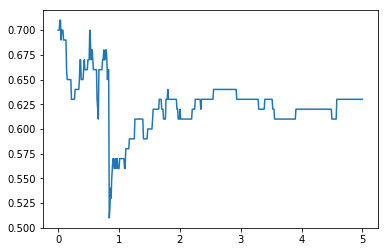

In [78]:
res1_2 = perform_IRL_3Attrs(optimalAction1, transition_probability,Rmax1 , lamda_list)
accuracy1_2 = res1_2['accuracy']
plt.plot(lamda_list, accuracy1_2)
plt.show()

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.5706e+00 -0.0000e+00  7e+02  1e+01  7e+00  3e+00
 2: -7.5495e+00 -0.0000e+00  2e+03  1e+01  6e+00  8e+00
 3: -6.6356e+01 -0.0000e+00  2e+04  1e+01  7e+00  7e+01
 4: -1.2930e+03 -0.0000e+00  5e+05  1e+01  7e+00  1e+03
 5: -1.2779e+05 -0.0000e+00  5e+07  1e+01  7e+00  1e+05
 6: -1.2779e+07 -0.0000e+00  5e+09  1e+01  7e+00  1e+07
 7: -1.2779e+09 -0.0000e+00  5e+11  1e+01  7e+00  1e+09
Certificate of dual infeasibility found.
0.7
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.6041e+00 -0.0000e+00  7e+02  1e+01  7e+00  3e+00
 2: -7.1735e+00 -0.0000e+00  2e+03  1e+01  6e+00  8e+00
 3: -6.1204e+01 -0.0000e+00  2e+04  1e+01  7e+00  6e+01
 4: -1.1753e+03 -0.0000e+00  4e+05  1e+01  7e+00  1e+03
 5: -1.1589e+05 -0.0000e+00  4e+07  1e+01  7e+00  1e+05
 6: -1.1589e+07 -0.0000e+00  4e+09  1e+01  7e+00  1e+07
 7: -1.

0.69
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -2.9473e+00 -0.0000e+00  5e+02  1e+01  6e+00  3e+00
 2: -4.1149e+00 -0.0000e+00  5e+02  8e+00  4e+00  4e+00
 3: -2.0782e+01 -0.0000e+00  3e+03  7e+00  3e+00  2e+01
 4: -4.1967e+02 -0.0000e+00  6e+04  7e+00  3e+00  4e+02
 5: -3.9700e+04 -0.0000e+00  6e+06  7e+00  3e+00  4e+04
 6: -3.9700e+06 -0.0000e+00  6e+08  7e+00  3e+00  4e+06
 7: -3.9700e+08 -0.0000e+00  6e+10  7e+00  3e+00  4e+08
Certificate of dual infeasibility found.
0.69
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -2.9628e+00 -0.0000e+00  5e+02  1e+01  6e+00  3e+00
 2: -4.0069e+00 -0.0000e+00  5e+02  8e+00  4e+00  4e+00
 3: -1.9312e+01 -0.0000e+00  3e+03  6e+00  3e+00  2e+01
 4: -3.8779e+02 -0.0000e+00  5e+04  7e+00  3e+00  4e+02
 5: -3.6673e+04 -0.0000e+00  5e+06  7e+00  3e+00  4e+04
 6: -3.6672e+06 -0.0000e+00  5e+08  7e+00  3e+00  4e+06
 

0.68
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -3.1270e+00 -0.0000e+00  4e+02  1e+01  5e+00  3e+00
 2: -3.1205e+00 -0.0000e+00  3e+02  6e+00  3e+00  3e+00
 3: -6.2093e+00 -0.0000e+00  4e+02  4e+00  2e+00  6e+00
 4: -9.3348e+01 -0.0000e+00  7e+03  4e+00  2e+00  9e+01
 5: -5.4610e+03 -0.0000e+00  4e+05  4e+00  2e+00  5e+03
 6: -5.4602e+05 -0.0000e+00  4e+07  4e+00  2e+00  5e+05
 7: -5.4602e+07 -0.0000e+00  4e+09  4e+00  2e+00  5e+07
Certificate of dual infeasibility found.
0.68
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -3.1348e+00 -0.0000e+00  3e+02  1e+01  5e+00  3e+00
 2: -3.0809e+00 -0.0000e+00  2e+02  6e+00  3e+00  3e+00
 3: -5.7743e+00 -0.0000e+00  4e+02  4e+00  2e+00  6e+00
 4: -7.9253e+01 -0.0000e+00  6e+03  4e+00  2e+00  8e+01
 5: -4.0675e+03 -0.0000e+00  3e+05  4e+00  2e+00  4e+03
 6: -4.0666e+05 -0.0000e+00  3e+07  4e+00  2e+00  4e+05
 

0.69
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -3.1105e+00 -0.0000e+00  3e+02  1e+01  5e+00  3e+00
 2: -2.5796e+00 -0.0000e+00  2e+02  6e+00  3e+00  3e+00
 3: -2.5614e+00 -0.0000e+00  1e+02  3e+00  1e+00  3e+00
 4: -1.5419e+01 -0.0000e+00  9e+02  2e+00  1e+00  2e+01
 5: -2.3732e+02 -0.0000e+00  1e+04  2e+00  1e+00  2e+02
 6: -2.3377e+04 -0.0000e+00  1e+06  2e+00  1e+00  2e+04
 7: -2.3376e+06 -0.0000e+00  1e+08  2e+00  1e+00  2e+06
 8: -2.3376e+08 -0.0000e+00  1e+10  2e+00  1e+00  2e+08
Certificate of dual infeasibility found.
0.69
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -3.1011e+00 -0.0000e+00  3e+02  1e+01  5e+00  3e+00
 2: -2.5429e+00 -0.0000e+00  2e+02  5e+00  2e+00  3e+00
 3: -2.4213e+00 -0.0000e+00  1e+02  3e+00  1e+00  3e+00
 4: -1.3686e+01 -0.0000e+00  8e+02  2e+00  1e+00  1e+01
 5: -2.0034e+02 -0.0000e+00  1e+04  2e+00  1e+00  2e+02
 

0.7
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -2.9352e+00 -0.0000e+00  3e+02  1e+01  4e+00  3e+00
 2: -2.1089e+00 -0.0000e+00  1e+02  5e+00  2e+00  2e+00
 3: -1.1979e+00 -0.0000e+00  6e+01  2e+00  9e-01  1e+00
 4: -2.7742e+00 -0.0000e+00  1e+02  1e+00  6e-01  3e+00
 5: -3.2431e+01 -0.0000e+00  2e+03  1e+00  6e-01  3e+01
 6: -2.9572e+03 -0.0000e+00  2e+05  1e+00  6e-01  3e+03
 7: -2.9570e+05 -0.0000e+00  2e+07  1e+00  6e-01  3e+05
 8: -2.9570e+07 -0.0000e+00  2e+09  1e+00  6e-01  3e+07
Certificate of dual infeasibility found.
0.7
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -2.9197e+00 -0.0000e+00  3e+02  1e+01  4e+00  3e+00
 2: -2.0779e+00 -0.0000e+00  1e+02  5e+00  2e+00  2e+00
 3: -1.1348e+00 -0.0000e+00  6e+01  2e+00  8e-01  1e+00
 4: -2.4366e+00 -0.0000e+00  1e+02  1e+00  5e-01  2e+00
 5: -2.8432e+01 -0.0000e+00  2e+03  1e+00  6e-01  3e+01
 6:

0.7
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -2.6688e+00 -0.0000e+00  3e+02  1e+01  4e+00  3e+00
 2: -1.7019e+00 -0.0000e+00  9e+01  4e+00  2e+00  2e+00
 3: -5.3504e-01 -0.0000e+00  3e+01  1e+00  6e-01  6e-01
 4: -3.7731e-01 -0.0000e+00  2e+01  6e-01  3e-01  4e-01
 5: -3.1329e+00 -0.0000e+00  3e+02  9e-01  4e-01  3e+00
 6: -1.2972e+02 -0.0000e+00  1e+04  8e-01  3e-01  1e+02
 7: -1.2953e+04 -0.0000e+00  1e+06  8e-01  3e-01  1e+04
 8: -1.2952e+06 -0.0000e+00  1e+08  8e-01  3e-01  1e+06
 9: -1.2952e+08 -0.0000e+00  1e+10  8e-01  3e-01  1e+08
Certificate of dual infeasibility found.
0.7
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -2.6444e+00 -0.0000e+00  3e+02  1e+01  4e+00  3e+00
 2: -1.6738e+00 -0.0000e+00  8e+01  4e+00  2e+00  2e+00
 3: -5.1366e-01 -0.0000e+00  3e+01  1e+00  6e-01  6e-01
 4: -3.2737e-01 -0.0000e+00  2e+01  6e-01  2e-01  3e-01
 5:

0.67
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -2.3896e+00 -0.0000e+00  3e+02  1e+01  4e+00  3e+00
 2: -1.3793e+00 -0.0000e+00  7e+01  3e+00  1e+00  1e+00
 3: -3.7903e-01 -0.0000e+00  2e+01  1e+00  5e-01  4e-01
 4: -1.1420e-01 -0.0000e+00  8e+00  5e-01  2e-01  1e-01
 5: -2.9792e-02 -0.0000e+00  2e+00  2e-01  6e-02  3e-02
 6: -1.2960e-02 -0.0000e+00  2e+00  1e-01  5e-02  2e-02
 7: -4.1424e-03 -0.0000e+00  6e-01  5e-02  2e-02  6e-03
 8: -8.9442e-04 -0.0000e+00  2e-01  2e-02  7e-03  2e-03
 9: -1.1404e-04 -0.0000e+00  7e-02  7e-03  3e-03  3e-04
10:  1.5778e-05 -0.0000e+00  7e-03  8e-04  3e-04  9e-06
11:  5.7172e-07 -0.0000e+00  2e-04  3e-05  1e-05  3e-07
12:  5.7279e-09 -0.0000e+00  2e-06  3e-07  1e-07  3e-09
13:  5.7279e-11 -0.0000e+00  2e-08  3e-09  1e-09  3e-11
Optimal solution found.
0.52
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -2.3677e+00 -0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -2.1408e+00 -0.0000e+00  3e+02  1e+01  4e+00  2e+00
 2: -1.1391e+00 -0.0000e+00  5e+01  3e+00  1e+00  1e+00
 3: -2.3067e-01 -0.0000e+00  2e+01  1e+00  4e-01  3e-01
 4: -3.6763e-02 -0.0000e+00  3e+00  3e-01  1e-01  5e-02
 5: -5.2494e-03 -0.0000e+00  5e-01  5e-02  2e-02  7e-03
 6:  3.6051e-05 -0.0000e+00  3e-02  3e-03  1e-03  7e-05
 7:  3.6424e-07 -0.0000e+00  3e-04  3e-05  1e-05  7e-07
 8:  3.6422e-09 -0.0000e+00  3e-06  3e-07  1e-07  7e-09
 9:  3.6422e-11 -0.0000e+00  3e-08  3e-09  1e-09  7e-11
Optimal solution found.
0.56
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -2.1214e+00 -0.0000e+00  3e+02  1e+01  3e+00  2e+00
 2: -1.1305e+00 -0.0000e+00  5e+01  3e+00  1e+00  1e+00
 3: -2.1495e-01 -0.0000e+00  2e+01  1e+00  4e-01  2e-01
 4: -3.0276e-02 -0.0000e+00  3e+00  3e-01  9e-02  4e-02
 5: -5.0317e-03 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.9053e+00 -0.0000e+00  3e+02  9e+00  3e+00  2e+00
 2: -1.0113e+00 -0.0000e+00  6e+01  3e+00  1e+00  1e+00
 3: -1.3824e-01 -0.0000e+00  1e+01  7e-01  3e-01  2e-01
 4: -1.6397e-02 -0.0000e+00  2e+00  1e-01  5e-02  2e-02
 5:  6.9667e-05 -0.0000e+00  1e-01  1e-02  4e-03  3e-04
 6:  7.1388e-07 -0.0000e+00  1e-03  1e-04  4e-05  3e-06
 7:  7.1382e-09 -0.0000e+00  1e-05  1e-06  4e-07  3e-08
 8:  7.1382e-11 -0.0000e+00  1e-07  1e-08  4e-09  3e-10
 9:  7.1382e-13 -0.0000e+00  1e-09  1e-10  4e-11  3e-12
Optimal solution found.
0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.8885e+00 -0.0000e+00  3e+02  9e+00  3e+00  2e+00
 2: -1.0007e+00 -0.0000e+00  6e+01  3e+00  1e+00  1e+00
 3: -1.3607e-01 -0.0000e+00  1e+01  7e-01  2e-01  2e-01
 4: -1.7702e-02 -0.0000e+00  2e+00  1e-01  5e-02  2e-02
 5:  5.9675e-05 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.6678e+00 -0.0000e+00  3e+02  9e+00  3e+00  2e+00
 2: -8.7672e-01 -0.0000e+00  6e+01  3e+00  1e+00  1e+00
 3: -1.2703e-01 -0.0000e+00  9e+00  6e-01  2e-01  1e-01
 4: -1.8590e-02 -0.0000e+00  1e+00  1e-01  4e-02  2e-02
 5: -1.3201e-04 -0.0000e+00  3e-02  3e-03  8e-04  2e-04
 6: -1.3191e-06 -0.0000e+00  3e-04  3e-05  8e-06  2e-06
 7: -1.3191e-08 -0.0000e+00  3e-06  3e-07  8e-08  2e-08
 8: -1.3191e-10 -0.0000e+00  3e-08  3e-09  8e-10  2e-10
Optimal solution found.
0.59
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.6519e+00 -0.0000e+00  3e+02  9e+00  3e+00  2e+00
 2: -8.6698e-01 -0.0000e+00  6e+01  3e+00  1e+00  1e+00
 3: -1.4248e-01 -0.0000e+00  9e+00  7e-01  2e-01  2e-01
 4: -2.4117e-02 -0.0000e+00  2e+00  1e-01  4e-02  3e-02
 5: -1.4624e-04 -0.0000e+00  4e-02  4e-03  1e-03  3e-04
 6: -1.4617e-06 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  9e+00  1e+00
 1: -1.4647e+00 -0.0000e+00  3e+02  9e+00  3e+00  2e+00
 2: -7.4159e-01 -0.0000e+00  6e+01  3e+00  9e-01  8e-01
 3: -1.9060e-01 -0.0000e+00  1e+01  9e-01  3e-01  2e-01
 4: -1.8276e-02 -0.0000e+00  2e+00  1e-01  4e-02  2e-02
 5: -1.4040e-04 -0.0000e+00  3e-02  2e-03  7e-04  2e-04
 6: -1.4031e-06 -0.0000e+00  3e-04  2e-05  7e-06  2e-06
 7: -1.4031e-08 -0.0000e+00  3e-06  2e-07  7e-08  2e-08
 8: -1.4031e-10 -0.0000e+00  3e-08  2e-09  7e-10  2e-10
Optimal solution found.
0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  9e+00  1e+00
 1: -1.4516e+00 -0.0000e+00  3e+02  9e+00  3e+00  2e+00
 2: -7.3224e-01 -0.0000e+00  6e+01  3e+00  9e-01  8e-01
 3: -1.8907e-01 -0.0000e+00  1e+01  9e-01  3e-01  2e-01
 4: -1.7244e-02 -0.0000e+00  1e+00  1e-01  4e-02  2e-02
 5: -1.3635e-04 -0.0000e+00  2e-02  2e-03  6e-04  2e-04
 6: -1.3627e-06 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  9e+00  1e+00
 1: -1.2960e+00 -0.0000e+00  3e+02  9e+00  3e+00  2e+00
 2: -6.1689e-01 -0.0000e+00  5e+01  3e+00  8e-01  7e-01
 3: -1.5172e-01 -0.0000e+00  1e+01  8e-01  2e-01  2e-01
 4: -2.8560e-03 -0.0000e+00  6e-01  5e-02  1e-02  4e-03
 5: -2.8146e-05 -0.0000e+00  6e-03  5e-04  1e-04  4e-05
 6: -2.8142e-07 -0.0000e+00  6e-05  5e-06  1e-06  4e-07
 7: -2.8142e-09 -0.0000e+00  6e-07  5e-08  1e-08  4e-09
 8: -2.8142e-11 -0.0000e+00  6e-09  5e-10  1e-10  4e-11
Optimal solution found.
0.63
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  9e+00  1e+00
 1: -1.2851e+00 -0.0000e+00  3e+02  9e+00  3e+00  2e+00
 2: -6.0853e-01 -0.0000e+00  5e+01  3e+00  8e-01  7e-01
 3: -1.4823e-01 -0.0000e+00  1e+01  7e-01  2e-01  2e-01
 4: -1.7424e-03 -0.0000e+00  5e-01  4e-02  1e-02  3e-03
 5: -1.7370e-05 -0.0000e+00  6e-03  5e-04  1e-04  3e-05
 6: -1.7367e-07 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  8e+00  1e+00
 1: -1.1547e+00 -0.0000e+00  3e+02  9e+00  2e+00  1e+00
 2: -5.0697e-01 -0.0000e+00  5e+01  2e+00  7e-01  6e-01
 3: -9.7276e-02 -0.0000e+00  7e+00  5e-01  1e-01  1e-01
 4: -6.9342e-04 -0.0000e+00  2e-01  2e-02  5e-03  1e-03
 5: -6.9834e-06 -0.0000e+00  2e-03  2e-04  5e-05  1e-05
 6: -6.9830e-08 -0.0000e+00  2e-05  2e-06  5e-07  1e-07
 7: -6.9830e-10 -0.0000e+00  2e-07  2e-08  5e-09  1e-09
 8: -6.9830e-12 -0.0000e+00  2e-09  2e-10  5e-11  1e-11
Optimal solution found.
0.62
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  8e+00  1e+00
 1: -1.1455e+00 -0.0000e+00  3e+02  9e+00  2e+00  1e+00
 2: -4.9969e-01 -0.0000e+00  5e+01  2e+00  6e-01  6e-01
 3: -9.3446e-02 -0.0000e+00  7e+00  5e-01  1e-01  1e-01
 4: -8.9597e-04 -0.0000e+00  2e-01  2e-02  5e-03  2e-03
 5: -9.0179e-06 -0.0000e+00  2e-03  2e-04  5e-05  2e-05
 6: -9.0174e-08 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  8e+00  1e+00
 1: -1.0353e+00 -0.0000e+00  3e+02  9e+00  2e+00  1e+00
 2: -4.1158e-01 -0.0000e+00  4e+01  2e+00  5e-01  5e-01
 3: -4.8397e-02 -0.0000e+00  4e+00  3e-01  8e-02  6e-02
 4: -4.1560e-04 -0.0000e+00  1e-01  1e-02  2e-03  7e-04
 5: -4.1599e-06 -0.0000e+00  1e-03  1e-04  3e-05  7e-06
 6: -4.1598e-08 -0.0000e+00  1e-05  1e-06  3e-07  7e-08
 7: -4.1598e-10 -0.0000e+00  1e-07  1e-08  3e-09  7e-10
 8: -4.1598e-12 -0.0000e+00  1e-09  1e-10  3e-11  7e-12
Optimal solution found.
0.63
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  8e+00  1e+00
 1: -1.0275e+00 -0.0000e+00  3e+02  9e+00  2e+00  1e+00
 2: -4.0528e-01 -0.0000e+00  4e+01  2e+00  5e-01  5e-01
 3: -4.5334e-02 -0.0000e+00  4e+00  3e-01  7e-02  5e-02
 4: -2.8745e-04 -0.0000e+00  1e-01  9e-03  2e-03  6e-04
 5: -2.8761e-06 -0.0000e+00  1e-03  9e-05  2e-05  6e-06
 6: -2.8760e-08 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  7e+00  1e+00
 1: -9.2015e-01 -0.0000e+00  3e+02  9e+00  2e+00  1e+00
 2: -3.2243e-01 -0.0000e+00  3e+01  2e+00  4e-01  4e-01
 3: -2.6302e-02 -0.0000e+00  3e+00  2e-01  5e-02  3e-02
 4: -2.6334e-04 -0.0000e+00  4e-02  3e-03  7e-04  4e-04
 5: -2.6320e-06 -0.0000e+00  4e-04  3e-05  7e-06  4e-06
 6: -2.6320e-08 -0.0000e+00  4e-06  3e-07  7e-08  4e-08
 7: -2.6320e-10 -0.0000e+00  4e-08  3e-09  7e-10  4e-10
Optimal solution found.
0.63
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  7e+00  1e+00
 1: -9.1360e-01 -0.0000e+00  3e+02  9e+00  2e+00  1e+00
 2: -3.1914e-01 -0.0000e+00  3e+01  2e+00  4e-01  4e-01
 3: -2.5671e-02 -0.0000e+00  3e+00  2e-01  5e-02  3e-02
 4: -2.5823e-04 -0.0000e+00  4e-02  3e-03  7e-04  4e-04
 5: -2.5810e-06 -0.0000e+00  4e-04  3e-05  7e-06  4e-06
 6: -2.5810e-08 -0.0000e+00  4e-06  3e-07  7e-08  4e-08
 7: -2.5810e-10 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  7e+00  1e+00
 1: -8.2291e-01 -0.0000e+00  3e+02  9e+00  2e+00  1e+00
 2: -2.7451e-01 -0.0000e+00  3e+01  2e+00  4e-01  3e-01
 3: -1.6351e-02 -0.0000e+00  2e+00  2e-01  3e-02  2e-02
 4: -1.6984e-04 -0.0000e+00  3e-02  2e-03  4e-04  2e-04
 5: -1.6979e-06 -0.0000e+00  3e-04  2e-05  4e-06  2e-06
 6: -1.6979e-08 -0.0000e+00  3e-06  2e-07  4e-08  2e-08
 7: -1.6979e-10 -0.0000e+00  3e-08  2e-09  4e-10  2e-10
Optimal solution found.
0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  7e+00  1e+00
 1: -8.1734e-01 -0.0000e+00  3e+02  9e+00  2e+00  1e+00
 2: -2.7182e-01 -0.0000e+00  3e+01  2e+00  4e-01  3e-01
 3: -1.5755e-02 -0.0000e+00  2e+00  2e-01  3e-02  2e-02
 4: -1.6371e-04 -0.0000e+00  3e-02  2e-03  4e-04  2e-04
 5: -1.6366e-06 -0.0000e+00  3e-04  2e-05  4e-06  2e-06
 6: -1.6366e-08 -0.0000e+00  3e-06  2e-07  4e-08  2e-08
 7: -1.6366e-10 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  6e+00  1e+00
 1: -7.4007e-01 -0.0000e+00  3e+02  8e+00  2e+00  1e+00
 2: -2.3523e-01 -0.0000e+00  3e+01  2e+00  3e-01  3e-01
 3: -7.4798e-03 -0.0000e+00  2e+00  1e-01  2e-02  1e-02
 4: -7.7096e-05 -0.0000e+00  2e-02  1e-03  2e-04  1e-04
 5: -7.7082e-07 -0.0000e+00  2e-04  1e-05  2e-06  1e-06
 6: -7.7082e-09 -0.0000e+00  2e-06  1e-07  2e-08  1e-08
 7: -7.7082e-11 -0.0000e+00  2e-08  1e-09  2e-10  1e-10
Optimal solution found.
0.62
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  6e+00  1e+00
 1: -7.3531e-01 -0.0000e+00  2e+02  8e+00  2e+00  1e+00
 2: -2.3301e-01 -0.0000e+00  3e+01  2e+00  3e-01  3e-01
 3: -7.2753e-03 -0.0000e+00  2e+00  1e-01  2e-02  1e-02
 4: -7.4956e-05 -0.0000e+00  2e-02  1e-03  2e-04  1e-04
 5: -7.4943e-07 -0.0000e+00  2e-04  1e-05  2e-06  1e-06
 6: -7.4943e-09 -0.0000e+00  2e-06  1e-07  2e-08  1e-08
 7: -7.4943e-11 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  6e+00  1e+00
 1: -6.6904e-01 -0.0000e+00  2e+02  8e+00  2e+00  9e-01
 2: -2.0261e-01 -0.0000e+00  3e+01  1e+00  3e-01  2e-01
 3: -5.6958e-03 -0.0000e+00  2e+00  1e-01  2e-02  9e-03
 4: -5.9224e-05 -0.0000e+00  2e-02  1e-03  2e-04  9e-05
 5: -5.9215e-07 -0.0000e+00  2e-04  1e-05  2e-06  9e-07
 6: -5.9215e-09 -0.0000e+00  2e-06  1e-07  2e-08  9e-09
 7: -5.9215e-11 -0.0000e+00  2e-08  1e-09  2e-10  9e-11
Optimal solution found.
0.62
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  6e+00  1e+00
 1: -6.6494e-01 -0.0000e+00  2e+02  8e+00  2e+00  9e-01
 2: -2.0076e-01 -0.0000e+00  3e+01  1e+00  3e-01  2e-01
 3: -5.6028e-03 -0.0000e+00  2e+00  1e-01  2e-02  9e-03
 4: -5.8254e-05 -0.0000e+00  2e-02  1e-03  2e-04  9e-05
 5: -5.8245e-07 -0.0000e+00  2e-04  1e-05  2e-06  9e-07
 6: -5.8245e-09 -0.0000e+00  2e-06  1e-07  2e-08  9e-09
 7: -5.8245e-11 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  6e+00  1e+00
 1: -6.0764e-01 -0.0000e+00  2e+02  8e+00  1e+00  9e-01
 2: -1.7523e-01 -0.0000e+00  3e+01  1e+00  2e-01  2e-01
 3: -4.3752e-03 -0.0000e+00  2e+00  9e-02  2e-02  7e-03
 4: -4.5251e-05 -0.0000e+00  2e-02  9e-04  2e-04  7e-05
 5: -4.5245e-07 -0.0000e+00  2e-04  9e-06  2e-06  7e-07
 6: -4.5245e-09 -0.0000e+00  2e-06  9e-08  2e-08  7e-09
 7: -4.5245e-11 -0.0000e+00  2e-08  9e-10  2e-10  7e-11
Optimal solution found.
0.63
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  6e+00  1e+00
 1: -6.0409e-01 -0.0000e+00  2e+02  8e+00  1e+00  9e-01
 2: -1.7366e-01 -0.0000e+00  3e+01  1e+00  2e-01  2e-01
 3: -4.3039e-03 -0.0000e+00  2e+00  9e-02  2e-02  7e-03
 4: -4.4493e-05 -0.0000e+00  2e-02  9e-04  2e-04  7e-05
 5: -4.4487e-07 -0.0000e+00  2e-04  9e-06  2e-06  7e-07
 6: -4.4487e-09 -0.0000e+00  2e-06  9e-08  2e-08  7e-09
 7: -4.4487e-11 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -5.5419e-01 -0.0000e+00  2e+02  8e+00  1e+00  8e-01
 2: -1.5196e-01 -0.0000e+00  3e+01  1e+00  2e-01  2e-01
 3: -3.3761e-03 -0.0000e+00  2e+00  8e-02  1e-02  6e-03
 4: -3.4788e-05 -0.0000e+00  2e-02  8e-04  1e-04  6e-05
 5: -3.4784e-07 -0.0000e+00  2e-04  8e-06  1e-06  6e-07
 6: -3.4784e-09 -0.0000e+00  2e-06  8e-08  1e-08  6e-09
 7: -3.4784e-11 -0.0000e+00  2e-08  8e-10  1e-10  6e-11
Optimal solution found.
0.62
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -5.5108e-01 -0.0000e+00  2e+02  8e+00  1e+00  8e-01
 2: -1.5072e-01 -0.0000e+00  3e+01  1e+00  2e-01  2e-01
 3: -3.3229e-03 -0.0000e+00  2e+00  8e-02  1e-02  6e-03
 4: -3.4228e-05 -0.0000e+00  2e-02  8e-04  1e-04  6e-05
 5: -3.4224e-07 -0.0000e+00  2e-04  8e-06  1e-06  6e-07
 6: -3.4224e-09 -0.0000e+00  2e-06  8e-08  1e-08  6e-09
 7: -3.4224e-11 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -5.0732e-01 -0.0000e+00  2e+02  7e+00  1e+00  7e-01
 2: -1.3653e-01 -0.0000e+00  3e+01  1e+00  2e-01  2e-01
 3: -2.6117e-03 -0.0000e+00  1e+00  7e-02  1e-02  5e-03
 4: -2.6596e-05 -0.0000e+00  1e-02  7e-04  1e-04  5e-05
 5: -2.6593e-07 -0.0000e+00  1e-04  7e-06  1e-06  5e-07
 6: -2.6593e-09 -0.0000e+00  1e-06  7e-08  1e-08  5e-09
 7: -2.6593e-11 -0.0000e+00  1e-08  7e-10  1e-10  5e-11
Optimal solution found.
0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -5.0459e-01 -0.0000e+00  2e+02  7e+00  1e+00  7e-01
 2: -1.3565e-01 -0.0000e+00  3e+01  1e+00  2e-01  2e-01
 3: -2.5939e-03 -0.0000e+00  1e+00  7e-02  1e-02  5e-03
 4: -2.6400e-05 -0.0000e+00  1e-02  7e-04  1e-04  5e-05
 5: -2.6397e-07 -0.0000e+00  1e-04  7e-06  1e-06  5e-07
 6: -2.6397e-09 -0.0000e+00  1e-06  7e-08  1e-08  5e-09
 7: -2.6397e-11 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -4.6598e-01 -0.0000e+00  2e+02  7e+00  1e+00  7e-01
 2: -1.2318e-01 -0.0000e+00  3e+01  1e+00  2e-01  2e-01
 3: -2.4951e-03 -0.0000e+00  1e+00  6e-02  1e-02  4e-03
 4: -2.5225e-05 -0.0000e+00  1e-02  6e-04  1e-04  5e-05
 5: -2.5223e-07 -0.0000e+00  1e-04  6e-06  1e-06  5e-07
 6: -2.5223e-09 -0.0000e+00  1e-06  6e-08  1e-08  5e-09
 7: -2.5223e-11 -0.0000e+00  1e-08  6e-10  1e-10  5e-11
Optimal solution found.
0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -4.6356e-01 -0.0000e+00  2e+02  7e+00  1e+00  7e-01
 2: -1.2240e-01 -0.0000e+00  3e+01  1e+00  2e-01  2e-01
 3: -2.4851e-03 -0.0000e+00  1e+00  6e-02  1e-02  4e-03
 4: -2.5114e-05 -0.0000e+00  1e-02  6e-04  1e-04  4e-05
 5: -2.5112e-07 -0.0000e+00  1e-04  6e-06  1e-06  4e-07
 6: -2.5112e-09 -0.0000e+00  1e-06  6e-08  1e-08  4e-09
 7: -2.5112e-11 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -4.2932e-01 -0.0000e+00  2e+02  7e+00  1e+00  7e-01
 2: -1.1129e-01 -0.0000e+00  3e+01  1e+00  2e-01  1e-01
 3: -2.2962e-03 -0.0000e+00  1e+00  5e-02  8e-03  4e-03
 4: -2.3092e-05 -0.0000e+00  1e-02  5e-04  8e-05  4e-05
 5: -2.3091e-07 -0.0000e+00  1e-04  5e-06  8e-07  4e-07
 6: -2.3091e-09 -0.0000e+00  1e-06  5e-08  8e-09  4e-09
 7: -2.3091e-11 -0.0000e+00  1e-08  5e-10  8e-11  4e-11
Optimal solution found.
0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -4.2716e-01 -0.0000e+00  2e+02  7e+00  1e+00  6e-01
 2: -1.1059e-01 -0.0000e+00  3e+01  1e+00  2e-01  1e-01
 3: -2.2816e-03 -0.0000e+00  1e+00  5e-02  8e-03  4e-03
 4: -2.2939e-05 -0.0000e+00  1e-02  5e-04  8e-05  4e-05
 5: -2.2938e-07 -0.0000e+00  1e-04  5e-06  8e-07  4e-07
 6: -2.2937e-09 -0.0000e+00  1e-06  5e-08  8e-09  4e-09
 7: -2.2937e-11 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -3.9923e-01 -0.0000e+00  2e+02  7e+00  1e+00  6e-01
 2: -1.0119e-01 -0.0000e+00  2e+01  1e+00  2e-01  1e-01
 3: -2.0582e-03 -0.0000e+00  1e+00  5e-02  7e-03  4e-03
 4: -2.0630e-05 -0.0000e+00  1e-02  5e-04  7e-05  4e-05
 5: -2.0629e-07 -0.0000e+00  1e-04  5e-06  7e-07  4e-07
 6: -2.0629e-09 -0.0000e+00  1e-06  5e-08  7e-09  4e-09
 7: -2.0629e-11 -0.0000e+00  1e-08  5e-10  7e-11  4e-11
Optimal solution found.
0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -3.9775e-01 -0.0000e+00  2e+02  7e+00  1e+00  6e-01
 2: -1.0066e-01 -0.0000e+00  2e+01  1e+00  2e-01  1e-01
 3: -2.0441e-03 -0.0000e+00  1e+00  5e-02  7e-03  4e-03
 4: -2.0486e-05 -0.0000e+00  1e-02  5e-04  7e-05  4e-05
 5: -2.0485e-07 -0.0000e+00  1e-04  5e-06  7e-07  4e-07
 6: -2.0485e-09 -0.0000e+00  1e-06  5e-08  7e-09  4e-09
 7: -2.0485e-11 -0.0000

0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -3.7660e-01 -0.0000e+00  2e+02  7e+00  9e-01  6e-01
 2: -9.2975e-02 -0.0000e+00  2e+01  1e+00  1e-01  1e-01
 3: -1.8291e-03 -0.0000e+00  9e-01  4e-02  5e-03  3e-03
 4: -1.8299e-05 -0.0000e+00  9e-03  4e-04  5e-05  3e-05
 5: -1.8298e-07 -0.0000e+00  9e-05  4e-06  5e-07  3e-07
 6: -1.8298e-09 -0.0000e+00  9e-07  4e-08  5e-09  3e-09
 7: -1.8298e-11 -0.0000e+00  9e-09  4e-10  5e-11  3e-11
Optimal solution found.
0.6
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -3.7527e-01 -0.0000e+00  2e+02  7e+00  9e-01  6e-01
 2: -9.2481e-02 -0.0000e+00  2e+01  1e+00  1e-01  1e-01
 3: -1.8146e-03 -0.0000e+00  9e-01  4e-02  5e-03  3e-03
 4: -1.8153e-05 -0.0000e+00  9e-03  4e-04  5e-05  3e-05
 5: -1.8152e-07 -0.0000e+00  9e-05  4e-06  5e-07  3e-07
 6: -1.8152e-09 -0.0000e+00  9e-07  4e-08  5e-09  3e-09
 7: -1.8152e-11 -0.

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -3.5626e-01 -0.0000e+00  2e+02  7e+00  9e-01  6e-01
 2: -8.6083e-02 -0.0000e+00  2e+01  1e+00  1e-01  1e-01
 3: -1.6049e-03 -0.0000e+00  7e-01  3e-02  4e-03  3e-03
 4: -1.6038e-05 -0.0000e+00  7e-03  3e-04  4e-05  3e-05
 5: -1.6038e-07 -0.0000e+00  7e-05  3e-06  4e-07  3e-07
 6: -1.6038e-09 -0.0000e+00  7e-07  3e-08  4e-09  3e-09
 7: -1.6038e-11 -0.0000e+00  7e-09  3e-10  4e-11  3e-11
Optimal solution found.
0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -3.5506e-01 -0.0000e+00  2e+02  7e+00  8e-01  6e-01
 2: -8.5770e-02 -0.0000e+00  2e+01  1e+00  1e-01  1e-01
 3: -1.5920e-03 -0.0000e+00  7e-01  3e-02  4e-03  3e-03
 4: -1.5909e-05 -0.0000e+00  7e-03  3e-04  4e-05  3e-05
 5: -1.5909e-07 -0.0000e+00  7e-05  3e-06  4e-07  3e-07
 6: -1.5909e-09 -0.0000e+00  7e-07  3e-08  4e-09  3e-09
 7: -1.5909e-11 -0.0000

0.62
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -3.3792e-01 -0.0000e+00  2e+02  6e+00  8e-01  5e-01
 2: -8.1203e-02 -0.0000e+00  2e+01  1e+00  1e-01  1e-01
 3: -1.4248e-03 -0.0000e+00  7e-01  3e-02  4e-03  2e-03
 4: -1.4234e-05 -0.0000e+00  7e-03  3e-04  4e-05  2e-05
 5: -1.4234e-07 -0.0000e+00  7e-05  3e-06  4e-07  2e-07
 6: -1.4234e-09 -0.0000e+00  7e-07  3e-08  4e-09  2e-09
 7: -1.4234e-11 -0.0000e+00  7e-09  3e-10  4e-11  2e-11
Optimal solution found.
0.62
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -3.3683e-01 -0.0000e+00  2e+02  6e+00  8e-01  5e-01
 2: -8.0966e-02 -0.0000e+00  2e+01  1e+00  1e-01  1e-01
 3: -1.4149e-03 -0.0000e+00  7e-01  3e-02  3e-03  2e-03
 4: -1.4135e-05 -0.0000e+00  7e-03  3e-04  3e-05  2e-05
 5: -1.4135e-07 -0.0000e+00  7e-05  3e-06  3e-07  2e-07
 6: -1.4135e-09 -0.0000e+00  7e-07  3e-08  3e-09  2e-09
 7: -1.4135e-11 -0

0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -3.2133e-01 -0.0000e+00  2e+02  6e+00  8e-01  5e-01
 2: -7.7362e-02 -0.0000e+00  2e+01  1e+00  1e-01  1e-01
 3: -1.2704e-03 -0.0000e+00  6e-01  2e-02  3e-03  2e-03
 4: -1.2690e-05 -0.0000e+00  6e-03  2e-04  3e-05  2e-05
 5: -1.2689e-07 -0.0000e+00  6e-05  2e-06  3e-07  2e-07
 6: -1.2689e-09 -0.0000e+00  6e-07  2e-08  3e-09  2e-09
 7: -1.2689e-11 -0.0000e+00  6e-09  2e-10  3e-11  2e-11
Optimal solution found.
0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -3.2035e-01 -0.0000e+00  2e+02  6e+00  8e-01  5e-01
 2: -7.7119e-02 -0.0000e+00  2e+01  1e+00  1e-01  1e-01
 3: -1.2609e-03 -0.0000e+00  6e-01  2e-02  3e-03  2e-03
 4: -1.2595e-05 -0.0000e+00  6e-03  2e-04  3e-05  2e-05
 5: -1.2595e-07 -0.0000e+00  6e-05  2e-06  3e-07  2e-07
 6: -1.2595e-09 -0.0000e+00  6e-07  2e-08  3e-09  2e-09
 7: -1.2595e-11 -0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -3.0629e-01 -0.0000e+00  2e+02  6e+00  7e-01  5e-01
 2: -7.3475e-02 -0.0000e+00  2e+01  9e-01  1e-01  1e-01
 3: -1.1221e-03 -0.0000e+00  5e-01  2e-02  2e-03  2e-03
 4: -1.1208e-05 -0.0000e+00  5e-03  2e-04  2e-05  2e-05
 5: -1.1208e-07 -0.0000e+00  5e-05  2e-06  2e-07  2e-07
 6: -1.1208e-09 -0.0000e+00  5e-07  2e-08  2e-09  2e-09
 7: -1.1208e-11 -0.0000e+00  5e-09  2e-10  2e-11  2e-11
Optimal solution found.
0.62
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -3.0540e-01 -0.0000e+00  2e+02  6e+00  7e-01  5e-01
 2: -7.3233e-02 -0.0000e+00  2e+01  9e-01  1e-01  1e-01
 3: -1.1146e-03 -0.0000e+00  5e-01  2e-02  2e-03  2e-03
 4: -1.1134e-05 -0.0000e+00  5e-03  2e-04  2e-05  2e-05
 5: -1.1134e-07 -0.0000e+00  5e-05  2e-06  2e-07  2e-07
 6: -1.1134e-09 -0.0000e+00  5e-07  2e-08  2e-09  2e-09
 7: -1.1134e-11 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.9257e-01 -0.0000e+00  2e+02  6e+00  7e-01  5e-01
 2: -6.9586e-02 -0.0000e+00  2e+01  9e-01  1e-01  1e-01
 3: -1.0592e-03 -0.0000e+00  5e-01  2e-02  2e-03  2e-03
 4: -1.0580e-05 -0.0000e+00  5e-03  2e-04  2e-05  2e-05
 5: -1.0580e-07 -0.0000e+00  5e-05  2e-06  2e-07  2e-07
 6: -1.0580e-09 -0.0000e+00  5e-07  2e-08  2e-09  2e-09
 7: -1.0580e-11 -0.0000e+00  5e-09  2e-10  2e-11  2e-11
Optimal solution found.
0.6
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.9164e-01 -0.0000e+00  2e+02  6e+00  7e-01  5e-01
 2: -6.9285e-02 -0.0000e+00  2e+01  9e-01  1e-01  1e-01
 3: -1.0515e-03 -0.0000e+00  5e-01  2e-02  2e-03  2e-03
 4: -1.0504e-05 -0.0000e+00  5e-03  2e-04  2e-05  2e-05
 5: -1.0504e-07 -0.0000e+00  5e-05  2e-06  2e-07  2e-07
 6: -1.0504e-09 -0.0000e+00  5e-07  2e-08  2e-09  2e-09
 7: -1.0504e-11 -0.0000e

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.7832e-01 -0.0000e+00  2e+02  6e+00  7e-01  5e-01
 2: -6.4988e-02 -0.0000e+00  2e+01  9e-01  1e-01  9e-02
 3: -9.4557e-04 -0.0000e+00  5e-01  2e-02  2e-03  2e-03
 4: -9.4459e-06 -0.0000e+00  5e-03  2e-04  2e-05  2e-05
 5: -9.4457e-08 -0.0000e+00  5e-05  2e-06  2e-07  2e-07
 6: -9.4457e-10 -0.0000e+00  5e-07  2e-08  2e-09  2e-09
 7: -9.4457e-12 -0.0000e+00  5e-09  2e-10  2e-11  2e-11
Optimal solution found.
0.63
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.7747e-01 -0.0000e+00  2e+02  6e+00  7e-01  5e-01
 2: -6.4715e-02 -0.0000e+00  2e+01  9e-01  1e-01  9e-02
 3: -9.3909e-04 -0.0000e+00  5e-01  2e-02  2e-03  2e-03
 4: -9.3811e-06 -0.0000e+00  5e-03  2e-04  2e-05  2e-05
 5: -9.3809e-08 -0.0000e+00  5e-05  2e-06  2e-07  2e-07
 6: -9.3809e-10 -0.0000e+00  5e-07  2e-08  2e-09  2e-09
 7: -9.3809e-12 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.6532e-01 -0.0000e+00  2e+02  6e+00  6e-01  5e-01
 2: -6.0856e-02 -0.0000e+00  2e+01  9e-01  9e-02  9e-02
 3: -8.5055e-04 -0.0000e+00  5e-01  2e-02  2e-03  1e-03
 4: -8.4969e-06 -0.0000e+00  5e-03  2e-04  2e-05  1e-05
 5: -8.4968e-08 -0.0000e+00  5e-05  2e-06  2e-07  1e-07
 6: -8.4968e-10 -0.0000e+00  5e-07  2e-08  2e-09  1e-09
 7: -8.4968e-12 -0.0000e+00  5e-09  2e-10  2e-11  1e-11
Optimal solution found.
0.62
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.6455e-01 -0.0000e+00  2e+02  6e+00  6e-01  5e-01
 2: -6.0658e-02 -0.0000e+00  2e+01  9e-01  9e-02  9e-02
 3: -8.4645e-04 -0.0000e+00  5e-01  2e-02  2e-03  1e-03
 4: -8.4560e-06 -0.0000e+00  5e-03  2e-04  2e-05  1e-05
 5: -8.4558e-08 -0.0000e+00  5e-05  2e-06  2e-07  1e-07
 6: -8.4558e-10 -0.0000e+00  5e-07  2e-08  2e-09  1e-09
 7: -8.4558e-12 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.5344e-01 -0.0000e+00  2e+02  6e+00  6e-01  4e-01
 2: -5.7808e-02 -0.0000e+00  2e+01  8e-01  9e-02  8e-02
 3: -7.8839e-04 -0.0000e+00  5e-01  2e-02  2e-03  1e-03
 4: -7.8762e-06 -0.0000e+00  5e-03  2e-04  2e-05  1e-05
 5: -7.8761e-08 -0.0000e+00  5e-05  2e-06  2e-07  1e-07
 6: -7.8761e-10 -0.0000e+00  5e-07  2e-08  2e-09  1e-09
 7: -7.8761e-12 -0.0000e+00  5e-09  2e-10  2e-11  1e-11
Optimal solution found.
0.61
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.5274e-01 -0.0000e+00  2e+02  6e+00  6e-01  4e-01
 2: -5.7625e-02 -0.0000e+00  2e+01  8e-01  9e-02  8e-02
 3: -7.8474e-04 -0.0000e+00  5e-01  2e-02  2e-03  1e-03
 4: -7.8397e-06 -0.0000e+00  5e-03  2e-04  2e-05  1e-05
 5: -7.8396e-08 -0.0000e+00  5e-05  2e-06  2e-07  1e-07
 6: -7.8396e-10 -0.0000e+00  5e-07  2e-08  2e-09  1e-09
 7: -7.8396e-12 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.4257e-01 -0.0000e+00  2e+02  6e+00  6e-01  4e-01
 2: -5.4979e-02 -0.0000e+00  3e+01  8e-01  8e-02  8e-02
 3: -7.3287e-04 -0.0000e+00  4e-01  2e-02  2e-03  1e-03
 4: -7.3217e-06 -0.0000e+00  4e-03  2e-04  2e-05  1e-05
 5: -7.3216e-08 -0.0000e+00  4e-05  2e-06  2e-07  1e-07
 6: -7.3216e-10 -0.0000e+00  4e-07  2e-08  2e-09  1e-09
 7: -7.3216e-12 -0.0000e+00  4e-09  2e-10  2e-11  1e-11
Optimal solution found.
0.6


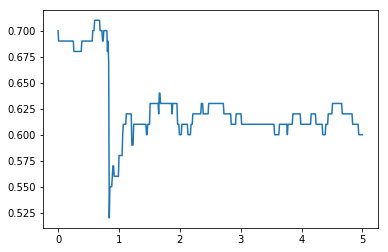

In [79]:
res1 = perform_IRL_4Attrs(optimalAction1, transition_probability,Rmax1 , lamda_list)
accuracy1 = res1['accuracy']
plt.plot(lamda_list, accuracy1)
plt.show()

### Q12 find lamda max###

In [80]:
# best accuracy with the 4 attributes IRL, Rmax is included in X and counted as an attribute
max_accuracy1 = max(accuracy1)
maxLamda1 = lamda_list[accuracy1.index(max_accuracy1)]
print(maxLamda1, max_accuracy1)

0.6012024048096192 0.71


In [81]:
# best accuracy with the 3 attributes IRL, the only difference is that here we take the Rmax out from X and put it in the bounding
max_accuracy1_2 = max(accuracy1_2)
maxLamda1_2 = lamda_list[accuracy1_2.index(max_accuracy1_2)]
print(maxLamda1_2, max_accuracy1_2)

0.03006012024048096 0.71


### Q13 generate heat maps of the ground truth and extracted reward###

In [34]:
res = perform_IRL_4Attrs(optimalAction1, transition_probability, Rmax1, [maxLamda1])
er = np.zeros([10,10])
for s in range(100):
    y = int(s / height)
    x = int(s % height)
    er[x,y] = res['reward'][s]
extracted_reward_max_lamda1 = er

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -2.3737e+00 -0.0000e+00  3e+02  1e+01  4e+00  3e+00
 2: -1.3572e+00 -0.0000e+00  6e+01  3e+00  1e+00  1e+00
 3: -4.2092e-01 -0.0000e+00  2e+01  1e+00  5e-01  5e-01
 4: -9.0198e-02 -0.0000e+00  6e+00  4e-01  1e-01  1e-01
 5: -7.4130e-02 -0.0000e+00  5e+00  3e-01  1e-01  8e-02
 6: -5.5652e-02 -0.0000e+00  5e+00  2e-01  1e-01  6e-02
 7: -3.8756e-02 -0.0000e+00  6e+00  2e-01  7e-02  4e-02
 8: -7.4525e-02 -0.0000e+00  1e+01  1e-01  5e-02  8e-02
 9: -1.6983e+00 -0.0000e+00  2e+02  9e-02  4e-02  2e+00
10: -1.6865e+02 -0.0000e+00  2e+04  9e-02  4e-02  2e+02
11: -1.6865e+04 -0.0000e+00  2e+06  9e-02  4e-02  2e+04
12: -1.6865e+06 -0.0000e+00  2e+08  9e-02  4e-02  2e+06
Certificate of dual infeasibility found.
0.63


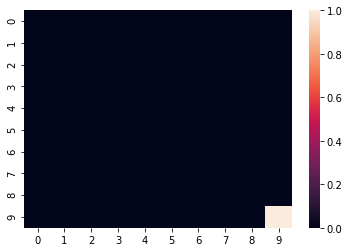

In [35]:
hm_rfunc1 = sns.heatmap(Rfunc1)

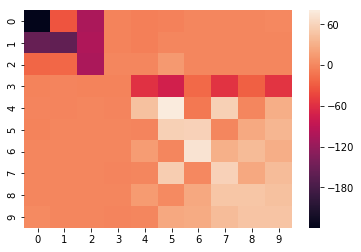

In [36]:
# print(extracted_reward_max_lamda1.reshape((height, width)))
hm_er1 = sns.heatmap(extracted_reward_max_lamda1)

### Q14 compute the optimal values of the states with extracted reward and generate heatmap ###

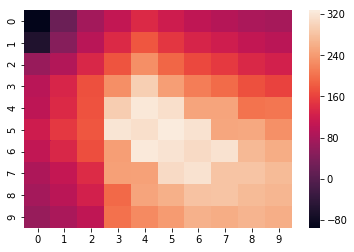

In [37]:
Vs_max_lamda1 = np.zeros(height * width)
# calVs(Vs_max_lamda1, tp, extracted_reward_max_lamda1, discount, theta)
Vs_max_lamda1 = calVs_new(Vs_max_lamda1, tp, extracted_reward_max_lamda1, discount, theta)
Vs_max_lamda1_2d = Vs_max_lamda1.reshape((height, width))
hm_vs = sns.heatmap(Vs_max_lamda1_2d)

### Q16 Use the extracted reward function found in question 13 to compute the optimal policy of the agent. ###

In [ ]:
optimalAction_max_lamda1_2 = np.zeros(height * width)
calOptimalAction(optimalAction_max_lamda1, tp,extracted_reward_max_lamda1 , Vs_max_lamda1, discount)
optimalAction_max_lamda1_2d = optimalAction_max_lamda1.reshape((height, width))
arrows_max_lamda1 = action2Arrow(optimalAction_max_lamda1, arrows)
path_max_lamda1 = np.array(arrows_max_lamda1).reshape((height,width)).T
# print(tabulate(optimalAction_max_lamda1_2d.T,  tablefmt='fancy_grid'))
print_path(path_max_lamda1)

In [39]:
# Q18
# print(optimalAction2)
res = perform_IRL_4Attrs(optimalAction2, transition_probability, Rmax2, lamda_list)
accuracy2 = res['accuracy']


     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.5466e+00 -0.0000e+00  7e+02  1e+01  9e+00  3e+00
 2: -5.5235e+00 -0.0000e+00  2e+03  1e+01  8e+00  6e+00
 3: -2.0158e+01 -0.0000e+00  8e+03  1e+01  9e+00  2e+01
 4: -1.3025e+02 -0.0000e+00  5e+04  1e+01  9e+00  1e+02
 5: -1.2123e+04 -0.0000e+00  5e+06  1e+01  9e+00  1e+04
 6: -1.2122e+06 -0.0000e+00  5e+08  1e+01  9e+00  1e+06
 7: -1.2122e+08 -0.0000e+00  5e+10  1e+01  9e+00  1e+08
 8: -1.2122e+10 -0.0000e+00  5e+12  1e+01  9e+00  1e+10
Certificate of dual infeasibility found.
0.79
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.5716e+00 -0.0000e+00  7e+02  1e+01  9e+00  3e+00
 2: -5.3086e+00 -0.0000e+00  2e+03  1e+01  8e+00  6e+00
 3: -1.8819e+01 -0.0000e+00  7e+03  1e+01  8e+00  2e+01
 4: -1.1115e+02 -0.0000e+00  4e+04  1e+01  8e+00  1e+02
 5: -1.0113e+04 -0.0000e+00  4e+06  1e+01  8e+00  1e+04
 6: -1

0.81
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.8895e+00 -0.0000e+00  5e+02  1e+01  8e+00  3e+00
 2: -4.0674e+00 -0.0000e+00  7e+02  1e+01  6e+00  4e+00
 3: -1.1239e+01 -0.0000e+00  2e+03  9e+00  5e+00  1e+01
 4: -4.0184e+01 -0.0000e+00  9e+03  8e+00  5e+00  4e+01
 5: -2.3234e+03 -0.0000e+00  5e+05  8e+00  5e+00  2e+03
 6: -2.3221e+05 -0.0000e+00  5e+07  8e+00  5e+00  2e+05
 7: -2.3221e+07 -0.0000e+00  5e+09  8e+00  5e+00  2e+07
 8: -2.3221e+09 -0.0000e+00  5e+11  8e+00  5e+00  2e+09
Certificate of dual infeasibility found.
0.81
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.9117e+00 -0.0000e+00  5e+02  1e+01  8e+00  3e+00
 2: -4.0216e+00 -0.0000e+00  7e+02  1e+01  6e+00  4e+00
 3: -1.0603e+01 -0.0000e+00  2e+03  8e+00  5e+00  1e+01
 4: -3.6329e+01 -0.0000e+00  8e+03  8e+00  5e+00  4e+01
 5: -1.9431e+03 -0.0000e+00  4e+05  8e+00  5e+00  2e+03
 

0.8
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -3.1436e+00 -0.0000e+00  4e+02  1e+01  7e+00  4e+00
 2: -3.5837e+00 -0.0000e+00  4e+02  8e+00  5e+00  4e+00
 3: -6.1792e+00 -0.0000e+00  8e+02  6e+00  4e+00  6e+00
 4: -1.7671e+01 -0.0000e+00  3e+03  6e+00  4e+00  2e+01
 5: -4.8114e+02 -0.0000e+00  7e+04  5e+00  3e+00  5e+02
 6: -4.7744e+04 -0.0000e+00  7e+06  5e+00  3e+00  5e+04
 7: -4.7744e+06 -0.0000e+00  7e+08  5e+00  3e+00  5e+06
 8: -4.7744e+08 -0.0000e+00  7e+10  5e+00  3e+00  5e+08
Certificate of dual infeasibility found.
0.81
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -3.1565e+00 -0.0000e+00  4e+02  1e+01  7e+00  4e+00
 2: -3.5552e+00 -0.0000e+00  4e+02  8e+00  5e+00  4e+00
 3: -5.9914e+00 -0.0000e+00  8e+02  6e+00  4e+00  6e+00
 4: -1.7063e+01 -0.0000e+00  3e+03  6e+00  4e+00  2e+01
 5: -4.4843e+02 -0.0000e+00  6e+04  5e+00  3e+00  4e+02
 6

 8: -2.1793e+07 -0.0000e+00  3e+09  4e+00  3e+00  2e+07
 9: -2.1793e+09 -0.0000e+00  3e+11  4e+00  3e+00  2e+09
Certificate of dual infeasibility found.
0.82
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -3.1306e+00 -0.0000e+00  4e+02  1e+01  7e+00  3e+00
 2: -3.0690e+00 -0.0000e+00  3e+02  7e+00  4e+00  3e+00
 3: -3.8244e+00 -0.0000e+00  4e+02  5e+00  3e+00  4e+00
 4: -6.4171e+00 -0.0000e+00  8e+02  5e+00  3e+00  7e+00
 5: -2.3886e+01 -0.0000e+00  3e+03  4e+00  3e+00  2e+01
 6: -1.7456e+03 -0.0000e+00  2e+05  4e+00  2e+00  2e+03
 7: -1.7450e+05 -0.0000e+00  2e+07  4e+00  2e+00  2e+05
 8: -1.7449e+07 -0.0000e+00  2e+09  4e+00  2e+00  2e+07
 9: -1.7449e+09 -0.0000e+00  2e+11  4e+00  2e+00  2e+09
Certificate of dual infeasibility found.
0.82
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -3.1170e+00 -0.0000e+00  4e+02  1e+01  7e+00  3e+00
 2: -3.0291e+00 

 9: -1.8922e+08 -0.0000e+00  2e+10  3e+00  2e+00  2e+08
Certificate of dual infeasibility found.
0.82
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -2.9234e+00 -0.0000e+00  4e+02  1e+01  6e+00  3e+00
 2: -2.5972e+00 -0.0000e+00  2e+02  6e+00  3e+00  3e+00
 3: -2.3531e+00 -0.0000e+00  2e+02  4e+00  2e+00  2e+00
 4: -3.1142e+00 -0.0000e+00  4e+02  4e+00  2e+00  3e+00
 5: -7.1815e+00 -0.0000e+00  9e+02  3e+00  2e+00  7e+00
 6: -1.6736e+02 -0.0000e+00  2e+04  3e+00  1e+00  2e+02
 7: -1.6596e+04 -0.0000e+00  2e+06  3e+00  1e+00  2e+04
 8: -1.6596e+06 -0.0000e+00  2e+08  3e+00  1e+00  2e+06
 9: -1.6596e+08 -0.0000e+00  2e+10  3e+00  1e+00  2e+08
Certificate of dual infeasibility found.
0.82
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -2.9052e+00 -0.0000e+00  4e+02  1e+01  6e+00  3e+00
 2: -2.5639e+00 -0.0000e+00  2e+02  6e+00  3e+00  3e+00
 3: -2.2715e+00 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -2.6673e+00 -0.0000e+00  4e+02  1e+01  6e+00  3e+00
 2: -2.1834e+00 -0.0000e+00  1e+02  5e+00  3e+00  2e+00
 3: -1.5216e+00 -0.0000e+00  1e+02  3e+00  2e+00  2e+00
 4: -1.7404e+00 -0.0000e+00  2e+02  3e+00  1e+00  2e+00
 5: -3.1993e+00 -0.0000e+00  4e+02  2e+00  1e+00  3e+00
 6: -3.3237e+01 -0.0000e+00  4e+03  2e+00  1e+00  3e+01
 7: -3.0836e+03 -0.0000e+00  4e+05  2e+00  1e+00  3e+03
 8: -3.0834e+05 -0.0000e+00  4e+07  2e+00  1e+00  3e+05
 9: -3.0834e+07 -0.0000e+00  4e+09  2e+00  1e+00  3e+07
Certificate of dual infeasibility found.
0.81
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -2.6448e+00 -0.0000e+00  4e+02  1e+01  6e+00  3e+00
 2: -2.1527e+00 -0.0000e+00  1e+02  5e+00  3e+00  2e+00
 3: -1.4731e+00 -0.0000e+00  1e+02  3e+00  2e+00  2e+00
 4: -1.6449e+00 -0.0000e+00  2e+02  3e+00  1e+00  2e+00
 5: -2

0.77
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -2.4041e+00 -0.0000e+00  4e+02  1e+01  6e+00  3e+00
 2: -1.8649e+00 -0.0000e+00  1e+02  5e+00  3e+00  2e+00
 3: -1.2156e+00 -0.0000e+00  1e+02  3e+00  2e+00  1e+00
 4: -9.3630e-01 -0.0000e+00  8e+01  2e+00  1e+00  1e+00
 5: -8.6627e-01 -0.0000e+00  2e+02  2e+00  9e-01  9e-01
 6: -1.2524e+00 -0.0000e+00  3e+02  2e+00  8e-01  1e+00
 7: -2.2184e+01 -0.0000e+00  4e+03  1e+00  6e-01  2e+01
 8: -2.2026e+03 -0.0000e+00  4e+05  1e+00  6e-01  2e+03
 9: -2.2025e+05 -0.0000e+00  4e+07  1e+00  6e-01  2e+05
10: -2.2025e+07 -0.0000e+00  4e+09  1e+00  6e-01  2e+07
Certificate of dual infeasibility found.
0.77
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -2.3830e+00 -0.0000e+00  4e+02  1e+01  6e+00  3e+00
 2: -1.8401e+00 -0.0000e+00  1e+02  5e+00  3e+00  2e+00
 3: -1.1961e+00 -0.0000e+00  1e+02  3e+00  2e+00  1e+00
 

0.77
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -2.1615e+00 -0.0000e+00  3e+02  1e+01  5e+00  3e+00
 2: -1.5835e+00 -0.0000e+00  1e+02  5e+00  2e+00  2e+00
 3: -9.8808e-01 -0.0000e+00  8e+01  3e+00  2e+00  1e+00
 4: -4.9263e-01 -0.0000e+00  4e+01  1e+00  7e-01  5e-01
 5: -3.3759e-01 -0.0000e+00  5e+01  1e+00  6e-01  4e-01
 6: -3.4843e-01 -0.0000e+00  4e+01  7e-01  3e-01  4e-01
 7: -1.8107e+00 -0.0000e+00  3e+02  7e-01  3e-01  2e+00
 8: -1.3013e+02 -0.0000e+00  2e+04  6e-01  3e-01  1e+02
 9: -1.3008e+04 -0.0000e+00  2e+06  6e-01  3e-01  1e+04
10: -1.3008e+06 -0.0000e+00  2e+08  6e-01  3e-01  1e+06
11: -1.3008e+08 -0.0000e+00  2e+10  6e-01  3e-01  1e+08
Certificate of dual infeasibility found.
0.77
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -2.1424e+00 -0.0000e+00  3e+02  1e+01  5e+00  3e+00
 2: -1.5618e+00 -0.0000e+00  1e+02  5e+00  2e+00  2e+00
 

 8: -1.0088e-01 -0.0000e+00  3e+01  2e-01  9e-02  1e-01
 9: -1.3405e+00 -0.0000e+00  3e+02  2e-01  7e-02  1e+00
10: -1.3239e+02 -0.0000e+00  3e+04  2e-01  7e-02  1e+02
11: -1.3239e+04 -0.0000e+00  3e+06  2e-01  7e-02  1e+04
12: -1.3239e+06 -0.0000e+00  3e+08  2e-01  7e-02  1e+06
13: -1.3239e+08 -0.0000e+00  3e+10  2e-01  7e-02  1e+08
Certificate of dual infeasibility found.
0.68
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.9612e+00 -0.0000e+00  3e+02  1e+01  5e+00  2e+00
 2: -1.3590e+00 -0.0000e+00  1e+02  5e+00  2e+00  2e+00
 3: -8.0511e-01 -0.0000e+00  7e+01  3e+00  1e+00  9e-01
 4: -3.3081e-01 -0.0000e+00  3e+01  1e+00  5e-01  4e-01
 5: -1.7281e-01 -0.0000e+00  2e+01  8e-01  4e-01  2e-01
 6: -7.0020e-02 -0.0000e+00  7e+00  3e-01  1e-01  8e-02
 7: -5.3837e-02 -0.0000e+00  7e+00  2e-01  1e-01  6e-02
 8: -4.9388e-02 -0.0000e+00  6e+00  1e-01  6e-02  5e-02
 9: -1.1445e-01 -0.0000e+00  2e+01  1e-01  6e-02  1e-01
10: 

 1: -1.8135e+00 -0.0000e+00  3e+02  1e+01  5e+00  2e+00
 2: -1.2069e+00 -0.0000e+00  1e+02  5e+00  2e+00  1e+00
 3: -6.8106e-01 -0.0000e+00  6e+01  3e+00  1e+00  8e-01
 4: -2.4314e-01 -0.0000e+00  2e+01  1e+00  4e-01  3e-01
 5: -3.3244e-02 -0.0000e+00  5e+00  3e-01  1e-01  4e-02
 6: -2.3778e-03 -0.0000e+00  1e+00  9e-02  4e-02  5e-03
 7:  2.1853e-04 -0.0000e+00  1e-01  1e-02  5e-03  2e-04
 8:  3.5473e-06 -0.0000e+00  2e-03  2e-04  8e-05  2e-06
 9:  3.5459e-08 -0.0000e+00  2e-05  2e-06  8e-07  2e-08
10:  3.5459e-10 -0.0000e+00  2e-07  2e-08  8e-09  2e-10
11:  3.5459e-12 -0.0000e+00  2e-09  2e-10  8e-11  2e-12
Optimal solution found.
0.7
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.7968e+00 -0.0000e+00  3e+02  1e+01  5e+00  2e+00
 2: -1.1918e+00 -0.0000e+00  1e+02  5e+00  2e+00  1e+00
 3: -6.6900e-01 -0.0000e+00  6e+01  3e+00  1e+00  8e-01
 4: -2.3419e-01 -0.0000e+00  2e+01  1e+00  4e-01  3e-01
 5: -3.2433e-02 -0.000

0.68
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.6175e+00 -0.0000e+00  3e+02  1e+01  4e+00  2e+00
 2: -1.0397e+00 -0.0000e+00  1e+02  4e+00  2e+00  1e+00
 3: -5.4981e-01 -0.0000e+00  5e+01  3e+00  1e+00  6e-01
 4: -1.5289e-01 -0.0000e+00  1e+01  8e-01  3e-01  2e-01
 5: -1.6825e-02 -0.0000e+00  3e+00  2e-01  1e-01  2e-02
 6: -4.9605e-04 -0.0000e+00  3e-01  3e-02  1e-02  1e-03
 7: -4.1236e-07 -0.0000e+00  5e-03  4e-04  2e-04  1e-05
 8: -4.1224e-09 -0.0000e+00  5e-05  4e-06  2e-06  1e-07
 9: -4.1224e-11 -0.0000e+00  5e-07  4e-08  2e-08  1e-09
10: -4.1224e-13 -0.0000e+00  5e-09  4e-10  2e-10  1e-11
Optimal solution found.
0.68
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.6025e+00 -0.0000e+00  3e+02  1e+01  4e+00  2e+00
 2: -1.0271e+00 -0.0000e+00  1e+02  4e+00  2e+00  1e+00
 3: -5.3998e-01 -0.0000e+00  5e+01  3e+00  1e+00  6e-01
 4: -1.4675e-01 -0

0.7
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.4370e+00 -0.0000e+00  3e+02  1e+01  4e+00  2e+00
 2: -8.8953e-01 -0.0000e+00  1e+02  4e+00  2e+00  1e+00
 3: -4.3463e-01 -0.0000e+00  5e+01  2e+00  9e-01  5e-01
 4: -8.6346e-02 -0.0000e+00  9e+00  6e-01  2e-01  1e-01
 5: -1.3581e-03 -0.0000e+00  1e+00  9e-02  3e-02  4e-03
 6:  1.3901e-06 -0.0000e+00  2e-02  2e-03  7e-04  6e-05
 7:  1.3880e-08 -0.0000e+00  2e-04  2e-05  7e-06  6e-07
 8:  1.3880e-10 -0.0000e+00  2e-06  2e-07  7e-08  6e-09
 9:  1.3880e-12 -0.0000e+00  2e-08  2e-09  7e-10  6e-11
Optimal solution found.
0.7
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.4244e+00 -0.0000e+00  3e+02  1e+01  4e+00  2e+00
 2: -8.7918e-01 -0.0000e+00  1e+02  4e+00  2e+00  1e+00
 3: -4.2685e-01 -0.0000e+00  5e+01  2e+00  9e-01  5e-01
 4: -8.2304e-02 -0.0000e+00  9e+00  6e-01  2e-01  1e-01
 5: -8.0841e-04 -0.0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.2845e+00 -0.0000e+00  3e+02  1e+01  4e+00  2e+00
 2: -7.6697e-01 -0.0000e+00  1e+02  4e+00  2e+00  9e-01
 3: -3.4386e-01 -0.0000e+00  4e+01  2e+00  8e-01  4e-01
 4: -5.3195e-02 -0.0000e+00  6e+00  4e-01  2e-01  7e-02
 5: -2.8180e-03 -0.0000e+00  5e-01  4e-02  2e-02  4e-03
 6: -2.8969e-05 -0.0000e+00  6e-03  5e-04  2e-04  4e-05
 7: -2.8962e-07 -0.0000e+00  6e-05  5e-06  2e-06  4e-07
 8: -2.8962e-09 -0.0000e+00  6e-07  5e-08  2e-08  4e-09
 9: -2.8962e-11 -0.0000e+00  6e-09  5e-10  2e-10  4e-11
Optimal solution found.
0.69
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.2737e+00 -0.0000e+00  3e+02  1e+01  4e+00  2e+00
 2: -7.5855e-01 -0.0000e+00  1e+02  4e+00  2e+00  9e-01
 3: -3.3774e-01 -0.0000e+00  4e+01  2e+00  8e-01  4e-01
 4: -5.1392e-02 -0.0000e+00  6e+00  4e-01  2e-01  7e-02
 5: -2.5198e-03 -0.0000

 8: -5.8768e-10 -0.0000e+00  3e-07  2e-08  7e-09  1e-09
 9: -5.8768e-12 -0.0000e+00  3e-09  2e-10  7e-11  1e-11
Optimal solution found.
0.73
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.1455e+00 -0.0000e+00  3e+02  1e+01  3e+00  1e+00
 2: -6.6039e-01 -0.0000e+00  9e+01  4e+00  1e+00  8e-01
 3: -2.6787e-01 -0.0000e+00  4e+01  2e+00  6e-01  3e-01
 4: -3.5183e-02 -0.0000e+00  5e+00  3e-01  1e-01  5e-02
 5: -5.3187e-04 -0.0000e+00  3e-01  2e-02  7e-03  1e-03
 6: -5.3927e-06 -0.0000e+00  3e-03  2e-04  7e-05  1e-05
 7: -5.3923e-08 -0.0000e+00  3e-05  2e-06  7e-07  1e-07
 8: -5.3923e-10 -0.0000e+00  3e-07  2e-08  7e-09  1e-09
 9: -5.3923e-12 -0.0000e+00  3e-09  2e-10  7e-11  1e-11
Optimal solution found.
0.73
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.1365e+00 -0.0000e+00  3e+02  1e+01  3e+00  1e+00
 2: -6.5364e-01 -0.0000e+00  9e+01  4e+00  1e+00  

 9: -1.8744e-12 -0.0000e+00  1e-09  1e-10  3e-11  5e-12
Optimal solution found.
0.75
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.0356e+00 -0.0000e+00  3e+02  1e+01  3e+00  1e+00
 2: -5.8028e-01 -0.0000e+00  9e+01  4e+00  1e+00  7e-01
 3: -2.1315e-01 -0.0000e+00  3e+01  2e+00  5e-01  3e-01
 4: -2.7427e-02 -0.0000e+00  4e+00  3e-01  9e-02  4e-02
 5: -1.8736e-04 -0.0000e+00  1e-01  9e-03  3e-03  5e-04
 6: -1.8753e-06 -0.0000e+00  1e-03  9e-05  3e-05  5e-06
 7: -1.8752e-08 -0.0000e+00  1e-05  9e-07  3e-07  5e-08
 8: -1.8752e-10 -0.0000e+00  1e-07  9e-09  3e-09  5e-10
 9: -1.8752e-12 -0.0000e+00  1e-09  9e-11  3e-11  5e-12
Optimal solution found.
0.75
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.0278e+00 -0.0000e+00  3e+02  1e+01  3e+00  1e+00
 2: -5.7475e-01 -0.0000e+00  9e+01  4e+00  1e+00  7e-01
 3: -2.0947e-01 -0.0000e+00  3e+01  2e+00  5e-01  

 1: -9.3404e-01 -0.0000e+00  3e+02  1e+01  3e+00  1e+00
 2: -5.0991e-01 -0.0000e+00  9e+01  4e+00  1e+00  6e-01
 3: -1.6745e-01 -0.0000e+00  3e+01  2e+00  5e-01  2e-01
 4: -2.0988e-02 -0.0000e+00  3e+00  2e-01  7e-02  3e-02
 5: -1.7474e-04 -0.0000e+00  6e-02  4e-03  1e-03  3e-04
 6: -1.7463e-06 -0.0000e+00  6e-04  4e-05  1e-05  3e-06
 7: -1.7463e-08 -0.0000e+00  6e-06  4e-07  1e-07  3e-08
 8: -1.7463e-10 -0.0000e+00  6e-08  4e-09  1e-09  3e-10
Optimal solution found.
0.73
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  9e+00  1e+00
 1: -9.2736e-01 -0.0000e+00  3e+02  1e+01  3e+00  1e+00
 2: -5.0541e-01 -0.0000e+00  9e+01  4e+00  1e+00  6e-01
 3: -1.6462e-01 -0.0000e+00  3e+01  2e+00  5e-01  2e-01
 4: -2.0585e-02 -0.0000e+00  3e+00  2e-01  7e-02  3e-02
 5: -1.7334e-04 -0.0000e+00  6e-02  4e-03  1e-03  3e-04
 6: -1.7322e-06 -0.0000e+00  6e-04  4e-05  1e-05  3e-06
 7: -1.7322e-08 -0.0000e+00  6e-06  4e-07  1e-07  3e-08
 8: -1.7322e-10 -0.00

 7: -1.4627e-08 -0.0000e+00  3e-06  2e-07  7e-08  2e-08
 8: -1.4627e-10 -0.0000e+00  3e-08  2e-09  7e-10  2e-10
Optimal solution found.
0.74
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  9e+00  1e+00
 1: -8.4091e-01 -0.0000e+00  3e+02  9e+00  3e+00  1e+00
 2: -4.4864e-01 -0.0000e+00  9e+01  4e+00  1e+00  6e-01
 3: -1.3009e-01 -0.0000e+00  2e+01  1e+00  4e-01  2e-01
 4: -1.5244e-02 -0.0000e+00  3e+00  2e-01  5e-02  2e-02
 5: -1.4346e-04 -0.0000e+00  3e-02  2e-03  6e-04  2e-04
 6: -1.4340e-06 -0.0000e+00  3e-04  2e-05  6e-06  2e-06
 7: -1.4340e-08 -0.0000e+00  3e-06  2e-07  6e-08  2e-08
 8: -1.4340e-10 -0.0000e+00  3e-08  2e-09  6e-10  2e-10
Optimal solution found.
0.73
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  9e+00  1e+00
 1: -8.3521e-01 -0.0000e+00  3e+02  9e+00  3e+00  1e+00
 2: -4.4499e-01 -0.0000e+00  9e+01  4e+00  1e+00  6e-01
 3: -1.2795e-01 -0.0000e+00  2e+01  1e+00  4e-01  

 8: -9.6907e-11 -0.0000e+00  2e-08  1e-09  4e-10  1e-10
Optimal solution found.
0.72
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  8e+00  1e+00
 1: -7.6102e-01 -0.0000e+00  3e+02  9e+00  2e+00  1e+00
 2: -3.9841e-01 -0.0000e+00  9e+01  4e+00  1e+00  5e-01
 3: -1.0151e-01 -0.0000e+00  2e+01  1e+00  3e-01  1e-01
 4: -9.4727e-03 -0.0000e+00  2e+00  1e-01  3e-02  1e-02
 5: -9.3475e-05 -0.0000e+00  2e-02  1e-03  4e-04  1e-04
 6: -9.3451e-07 -0.0000e+00  2e-04  1e-05  4e-06  1e-06
 7: -9.3451e-09 -0.0000e+00  2e-06  1e-07  4e-08  1e-08
 8: -9.3451e-11 -0.0000e+00  2e-08  1e-09  4e-10  1e-10
Optimal solution found.
0.72
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  8e+00  1e+00
 1: -7.5610e-01 -0.0000e+00  3e+02  9e+00  2e+00  1e+00
 2: -3.9538e-01 -0.0000e+00  9e+01  4e+00  1e+00  5e-01
 3: -9.9849e-02 -0.0000e+00  2e+01  1e+00  3e-01  1e-01
 4: -9.0957e-03 -0.0000e+00  2e+00  1e-01  3e-02  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  8e+00  1e+00
 1: -6.9625e-01 -0.0000e+00  3e+02  9e+00  2e+00  1e+00
 2: -3.5889e-01 -0.0000e+00  9e+01  4e+00  9e-01  5e-01
 3: -8.0211e-02 -0.0000e+00  2e+01  1e+00  3e-01  1e-01
 4: -5.3155e-03 -0.0000e+00  1e+00  8e-02  2e-02  8e-03
 5: -5.4014e-05 -0.0000e+00  1e-02  8e-04  2e-04  8e-05
 6: -5.4006e-07 -0.0000e+00  1e-04  8e-06  2e-06  8e-07
 7: -5.4006e-09 -0.0000e+00  1e-06  8e-08  2e-08  8e-09
 8: -5.4006e-11 -0.0000e+00  1e-08  8e-10  2e-10  8e-11
Optimal solution found.
0.72
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  8e+00  1e+00
 1: -6.9194e-01 -0.0000e+00  3e+02  9e+00  2e+00  1e+00
 2: -3.5628e-01 -0.0000e+00  9e+01  4e+00  9e-01  5e-01
 3: -7.8824e-02 -0.0000e+00  2e+01  1e+00  3e-01  1e-01
 4: -5.1487e-03 -0.0000e+00  1e+00  8e-02  2e-02  8e-03
 5: -5.2358e-05 -0.0000e+00  1e-02  8e-04  2e-04  8e-05
 6: -5.2351e-07 -0.0000

0.74
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  8e+00  1e+00
 1: -6.3554e-01 -0.0000e+00  3e+02  8e+00  2e+00  9e-01
 2: -3.2208e-01 -0.0000e+00  8e+01  4e+00  8e-01  4e-01
 3: -6.0220e-02 -0.0000e+00  2e+01  9e-01  2e-01  9e-02
 4: -3.0276e-03 -0.0000e+00  9e-01  5e-02  1e-02  5e-03
 5: -3.0559e-05 -0.0000e+00  9e-03  5e-04  1e-04  5e-05
 6: -3.0557e-07 -0.0000e+00  9e-05  5e-06  1e-06  5e-07
 7: -3.0557e-09 -0.0000e+00  9e-07  5e-08  1e-08  5e-09
 8: -3.0557e-11 -0.0000e+00  9e-09  5e-10  1e-10  5e-11
Optimal solution found.
0.74
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  7e+00  1e+00
 1: -6.3178e-01 -0.0000e+00  3e+02  8e+00  2e+00  9e-01
 2: -3.1977e-01 -0.0000e+00  8e+01  4e+00  8e-01  4e-01
 3: -5.8890e-02 -0.0000e+00  2e+01  9e-01  2e-01  9e-02
 4: -2.8699e-03 -0.0000e+00  8e-01  5e-02  1e-02  4e-03
 5: -2.8945e-05 -0.0000e+00  8e-03  5e-04  1e-04  4e-05
 6: -2.8943e-07 -0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  7e+00  1e+00
 1: -5.8568e-01 -0.0000e+00  3e+02  8e+00  2e+00  8e-01
 2: -2.9129e-01 -0.0000e+00  8e+01  3e+00  8e-01  4e-01
 3: -4.8967e-02 -0.0000e+00  2e+01  8e-01  2e-01  8e-02
 4: -1.8842e-03 -0.0000e+00  7e-01  4e-02  9e-03  3e-03
 5: -1.8902e-05 -0.0000e+00  7e-03  4e-04  9e-05  3e-05
 6: -1.8901e-07 -0.0000e+00  7e-05  4e-06  9e-07  3e-07
 7: -1.8901e-09 -0.0000e+00  7e-07  4e-08  9e-09  3e-09
 8: -1.8901e-11 -0.0000e+00  7e-09  4e-10  9e-11  3e-11
Optimal solution found.
0.76
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  7e+00  1e+00
 1: -5.8234e-01 -0.0000e+00  3e+02  8e+00  2e+00  8e-01
 2: -2.8981e-01 -0.0000e+00  8e+01  3e+00  8e-01  4e-01
 3: -4.8564e-02 -0.0000e+00  2e+01  8e-01  2e-01  7e-02
 4: -1.8470e-03 -0.0000e+00  7e-01  4e-02  8e-03  3e-03
 5: -1.8525e-05 -0.0000e+00  6e-03  4e-04  8e-05  3e-05
 6: -1.8524e-07 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  7e+00  1e+00
 1: -5.4136e-01 -0.0000e+00  3e+02  8e+00  2e+00  8e-01
 2: -2.7102e-01 -0.0000e+00  8e+01  3e+00  7e-01  4e-01
 3: -4.3124e-02 -0.0000e+00  2e+01  8e-01  2e-01  7e-02
 4: -1.3973e-03 -0.0000e+00  5e-01  3e-02  6e-03  2e-03
 5: -1.3981e-05 -0.0000e+00  5e-03  3e-04  6e-05  2e-05
 6: -1.3980e-07 -0.0000e+00  5e-05  3e-06  6e-07  2e-07
 7: -1.3980e-09 -0.0000e+00  5e-07  3e-08  6e-09  2e-09
 8: -1.3980e-11 -0.0000e+00  5e-09  3e-10  6e-11  2e-11
Optimal solution found.
0.76
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  7e+00  1e+00
 1: -5.3839e-01 -0.0000e+00  3e+02  8e+00  2e+00  8e-01
 2: -2.6959e-01 -0.0000e+00  8e+01  3e+00  7e-01  4e-01
 3: -4.2683e-02 -0.0000e+00  2e+01  8e-01  2e-01  7e-02
 4: -1.3654e-03 -0.0000e+00  5e-01  3e-02  6e-03  2e-03
 5: -1.3660e-05 -0.0000e+00  5e-03  3e-04  6e-05  2e-05
 6: -1.3660e-07 -0.0000

 6: -9.7817e-08 -0.0000e+00  4e-05  2e-06  4e-07  2e-07
 7: -9.7817e-10 -0.0000e+00  4e-07  2e-08  4e-09  2e-09
 8: -9.7817e-12 -0.0000e+00  4e-09  2e-10  4e-11  2e-11
Optimal solution found.
0.75
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  7e+00  1e+00
 1: -4.9911e-01 -0.0000e+00  3e+02  8e+00  2e+00  7e-01
 2: -2.4924e-01 -0.0000e+00  8e+01  3e+00  6e-01  3e-01
 3: -3.5721e-02 -0.0000e+00  1e+01  7e-01  1e-01  6e-02
 4: -9.5067e-04 -0.0000e+00  4e-01  2e-02  4e-03  2e-03
 5: -9.4990e-06 -0.0000e+00  4e-03  2e-04  4e-05  2e-05
 6: -9.4987e-08 -0.0000e+00  4e-05  2e-06  4e-07  2e-07
 7: -9.4987e-10 -0.0000e+00  4e-07  2e-08  4e-09  2e-09
 8: -9.4987e-12 -0.0000e+00  4e-09  2e-10  4e-11  2e-11
Optimal solution found.
0.75
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  7e+00  1e+00
 1: -4.9646e-01 -0.0000e+00  3e+02  8e+00  2e+00  7e-01
 2: -2.4772e-01 -0.0000e+00  8e+01  3e+00  6e-01  

 2: -2.2602e-01 -0.0000e+00  7e+01  3e+00  6e-01  3e-01
 3: -2.4683e-02 -0.0000e+00  1e+01  6e-01  1e-01  4e-02
 4: -5.6888e-04 -0.0000e+00  3e-01  1e-02  3e-03  1e-03
 5: -5.6840e-06 -0.0000e+00  3e-03  1e-04  3e-05  1e-05
 6: -5.6839e-08 -0.0000e+00  3e-05  1e-06  3e-07  1e-07
 7: -5.6839e-10 -0.0000e+00  3e-07  1e-08  3e-09  1e-09
 8: -5.6839e-12 -0.0000e+00  3e-09  1e-10  3e-11  1e-11
Optimal solution found.
0.75
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  6e+00  1e+00
 1: -4.6143e-01 -0.0000e+00  2e+02  7e+00  1e+00  7e-01
 2: -2.2422e-01 -0.0000e+00  7e+01  3e+00  6e-01  3e-01
 3: -2.3592e-02 -0.0000e+00  1e+01  6e-01  1e-01  4e-02
 4: -5.3672e-04 -0.0000e+00  2e-01  1e-02  3e-03  9e-04
 5: -5.3629e-06 -0.0000e+00  2e-03  1e-04  2e-05  9e-06
 6: -5.3628e-08 -0.0000e+00  2e-05  1e-06  2e-07  9e-08
 7: -5.3628e-10 -0.0000e+00  2e-07  1e-08  2e-09  9e-10
 8: -5.3628e-12 -0.0000e+00  2e-09  1e-10  2e-11  9e-12
Optimal solution foun

 3: -2.1622e-02 -0.0000e+00  1e+01  5e-01  1e-01  4e-02
 4: -4.5295e-04 -0.0000e+00  2e-01  1e-02  2e-03  8e-04
 5: -4.5261e-06 -0.0000e+00  2e-03  1e-04  2e-05  8e-06
 6: -4.5260e-08 -0.0000e+00  2e-05  1e-06  2e-07  8e-08
 7: -4.5260e-10 -0.0000e+00  2e-07  1e-08  2e-09  8e-10
 8: -4.5260e-12 -0.0000e+00  2e-09  1e-10  2e-11  8e-12
Optimal solution found.
0.74
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  6e+00  1e+00
 1: -4.2459e-01 -0.0000e+00  3e+02  7e+00  1e+00  7e-01
 2: -2.1153e-01 -0.0000e+00  8e+01  3e+00  5e-01  3e-01
 3: -2.1463e-02 -0.0000e+00  1e+01  5e-01  1e-01  4e-02
 4: -4.4672e-04 -0.0000e+00  2e-01  1e-02  2e-03  8e-04
 5: -4.4639e-06 -0.0000e+00  2e-03  1e-04  2e-05  8e-06
 6: -4.4639e-08 -0.0000e+00  2e-05  1e-06  2e-07  8e-08
 7: -4.4639e-10 -0.0000e+00  2e-07  1e-08  2e-09  8e-10
 8: -4.4639e-12 -0.0000e+00  2e-09  1e-10  2e-11  8e-12
Optimal solution found.
0.74
     pcost       dcost       gap    pres   dres 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  6e+00  1e+00
 1: -3.9166e-01 -0.0000e+00  3e+02  8e+00  1e+00  6e-01
 2: -2.0019e-01 -0.0000e+00  8e+01  3e+00  5e-01  3e-01
 3: -1.9207e-02 -0.0000e+00  1e+01  5e-01  9e-02  3e-02
 4: -3.6426e-04 -0.0000e+00  2e-01  9e-03  2e-03  7e-04
 5: -3.6401e-06 -0.0000e+00  2e-03  9e-05  2e-05  7e-06
 6: -3.6401e-08 -0.0000e+00  2e-05  9e-07  2e-07  7e-08
 7: -3.6401e-10 -0.0000e+00  2e-07  9e-09  2e-09  7e-10
 8: -3.6401e-12 -0.0000e+00  2e-09  9e-11  2e-11  7e-12
Optimal solution found.
0.74
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  6e+00  1e+00
 1: -3.8945e-01 -0.0000e+00  3e+02  8e+00  1e+00  6e-01
 2: -1.9942e-01 -0.0000e+00  8e+01  3e+00  5e-01  3e-01
 3: -1.9045e-02 -0.0000e+00  1e+01  5e-01  9e-02  3e-02
 4: -3.5873e-04 -0.0000e+00  2e-01  9e-03  2e-03  6e-04
 5: -3.5849e-06 -0.0000e+00  2e-03  9e-05  2e-05  6e-06
 6: -3.5848e-08 -0.0000

0.74
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  6e+00  1e+00
 1: -3.6013e-01 -0.0000e+00  3e+02  8e+00  1e+00  6e-01
 2: -1.8941e-01 -0.0000e+00  8e+01  3e+00  5e-01  3e-01
 3: -1.6788e-02 -0.0000e+00  1e+01  5e-01  8e-02  3e-02
 4: -2.8659e-04 -0.0000e+00  2e-01  8e-03  1e-03  5e-04
 5: -2.8642e-06 -0.0000e+00  2e-03  8e-05  1e-05  5e-06
 6: -2.8642e-08 -0.0000e+00  2e-05  8e-07  1e-07  5e-08
 7: -2.8642e-10 -0.0000e+00  2e-07  8e-09  1e-09  5e-10
 8: -2.8642e-12 -0.0000e+00  2e-09  8e-11  1e-11  5e-12
Optimal solution found.
0.74
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  6e+00  1e+00
 1: -3.5815e-01 -0.0000e+00  3e+02  8e+00  1e+00  6e-01
 2: -1.8874e-01 -0.0000e+00  8e+01  3e+00  5e-01  3e-01
 3: -1.6628e-02 -0.0000e+00  1e+01  4e-01  8e-02  3e-02
 4: -2.8182e-04 -0.0000e+00  2e-01  7e-03  1e-03  5e-04
 5: -2.8165e-06 -0.0000e+00  2e-03  7e-05  1e-05  5e-06
 6: -2.8165e-08 -0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -3.3373e-01 -0.0000e+00  3e+02  8e+00  1e+00  6e-01
 2: -1.8052e-01 -0.0000e+00  8e+01  3e+00  5e-01  3e-01
 3: -1.5501e-02 -0.0000e+00  1e+01  4e-01  7e-02  3e-02
 4: -2.5014e-04 -0.0000e+00  1e-01  7e-03  1e-03  5e-04
 5: -2.5001e-06 -0.0000e+00  1e-03  7e-05  1e-05  5e-06
 6: -2.5000e-08 -0.0000e+00  1e-05  7e-07  1e-07  5e-08
 7: -2.5000e-10 -0.0000e+00  1e-07  7e-09  1e-09  5e-10
 8: -2.5000e-12 -0.0000e+00  1e-09  7e-11  1e-11  5e-12
Optimal solution found.
0.73
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -3.3194e-01 -0.0000e+00  3e+02  8e+00  1e+00  6e-01
 2: -1.7993e-01 -0.0000e+00  8e+01  3e+00  5e-01  3e-01
 3: -1.5423e-02 -0.0000e+00  1e+01  4e-01  7e-02  3e-02
 4: -2.4813e-04 -0.0000e+00  1e-01  7e-03  1e-03  5e-04
 5: -2.4799e-06 -0.0000e+00  1e-03  7e-05  1e-05  5e-06
 6: -2.4799e-08 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -3.1104e-01 -0.0000e+00  3e+02  8e+00  1e+00  6e-01
 2: -1.7309e-01 -0.0000e+00  9e+01  3e+00  5e-01  3e-01
 3: -1.4608e-02 -0.0000e+00  1e+01  4e-01  7e-02  3e-02
 4: -2.2779e-04 -0.0000e+00  1e-01  6e-03  1e-03  4e-04
 5: -2.2767e-06 -0.0000e+00  1e-03  6e-05  1e-05  4e-06
 6: -2.2767e-08 -0.0000e+00  1e-05  6e-07  1e-07  4e-08
 7: -2.2767e-10 -0.0000e+00  1e-07  6e-09  1e-09  4e-10
 8: -2.2767e-12 -0.0000e+00  1e-09  6e-11  1e-11  4e-12
Optimal solution found.
0.73
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -3.0979e-01 -0.0000e+00  3e+02  8e+00  1e+00  6e-01
 2: -1.7270e-01 -0.0000e+00  9e+01  3e+00  5e-01  3e-01
 3: -1.4618e-02 -0.0000e+00  1e+01  4e-01  7e-02  3e-02
 4: -2.2839e-04 -0.0000e+00  1e-01  6e-03  1e-03  4e-04
 5: -2.2828e-06 -0.0000e+00  1e-03  6e-05  1e-05  4e-06
 6: -2.2828e-08 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -2.9418e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.6788e-01 -0.0000e+00  9e+01  3e+00  5e-01  3e-01
 3: -1.4707e-02 -0.0000e+00  1e+01  4e-01  7e-02  3e-02
 4: -2.3761e-04 -0.0000e+00  2e-01  6e-03  1e-03  4e-04
 5: -2.3749e-06 -0.0000e+00  2e-03  6e-05  1e-05  4e-06
 6: -2.3749e-08 -0.0000e+00  2e-05  6e-07  1e-07  4e-08
 7: -2.3749e-10 -0.0000e+00  2e-07  6e-09  1e-09  4e-10
 8: -2.3749e-12 -0.0000e+00  2e-09  6e-11  1e-11  4e-12
Optimal solution found.
0.73
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -2.9303e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.6753e-01 -0.0000e+00  9e+01  3e+00  5e-01  3e-01
 3: -1.4712e-02 -0.0000e+00  1e+01  4e-01  7e-02  3e-02
 4: -2.3807e-04 -0.0000e+00  2e-01  6e-03  1e-03  4e-04
 5: -2.3795e-06 -0.0000e+00  2e-03  6e-05  1e-05  4e-06
 6: -2.3795e-08 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -2.7878e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.6331e-01 -0.0000e+00  9e+01  3e+00  5e-01  3e-01
 3: -1.4751e-02 -0.0000e+00  1e+01  4e-01  6e-02  3e-02
 4: -2.3841e-04 -0.0000e+00  2e-01  6e-03  1e-03  4e-04
 5: -2.3830e-06 -0.0000e+00  2e-03  6e-05  1e-05  4e-06
 6: -2.3829e-08 -0.0000e+00  2e-05  6e-07  1e-07  4e-08
 7: -2.3829e-10 -0.0000e+00  2e-07  6e-09  1e-09  4e-10
 8: -2.3829e-12 -0.0000e+00  2e-09  6e-11  1e-11  4e-12
Optimal solution found.
0.73
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -2.7774e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.6301e-01 -0.0000e+00  9e+01  3e+00  5e-01  3e-01
 3: -1.4753e-02 -0.0000e+00  1e+01  4e-01  6e-02  3e-02
 4: -2.3819e-04 -0.0000e+00  2e-01  6e-03  1e-03  4e-04
 5: -2.3808e-06 -0.0000e+00  2e-03  6e-05  1e-05  4e-06
 6: -2.3808e-08 -0.0000

 7: -2.3446e-10 -0.0000e+00  2e-07  6e-09  9e-10  4e-10
 8: -2.3446e-12 -0.0000e+00  2e-09  6e-11  9e-12  4e-12
Optimal solution found.
0.72
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -2.6374e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.5907e-01 -0.0000e+00  9e+01  3e+00  4e-01  3e-01
 3: -1.4752e-02 -0.0000e+00  1e+01  4e-01  6e-02  3e-02
 4: -2.3424e-04 -0.0000e+00  2e-01  6e-03  9e-04  4e-04
 5: -2.3413e-06 -0.0000e+00  2e-03  6e-05  9e-06  4e-06
 6: -2.3413e-08 -0.0000e+00  2e-05  6e-07  9e-08  4e-08
 7: -2.3413e-10 -0.0000e+00  2e-07  6e-09  9e-10  4e-10
 8: -2.3413e-12 -0.0000e+00  2e-09  6e-11  9e-12  4e-12
Optimal solution found.
0.72
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -2.6278e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.5881e-01 -0.0000e+00  9e+01  3e+00  4e-01  3e-01
 3: -1.4751e-02 -0.0000e+00  1e+01  4e-01  6e-02  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -2.5002e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.5544e-01 -0.0000e+00  9e+01  3e+00  4e-01  3e-01
 3: -1.4716e-02 -0.0000e+00  1e+01  4e-01  6e-02  3e-02
 4: -2.2864e-04 -0.0000e+00  2e-01  6e-03  9e-04  4e-04
 5: -2.2854e-06 -0.0000e+00  2e-03  6e-05  9e-06  4e-06
 6: -2.2854e-08 -0.0000e+00  2e-05  6e-07  9e-08  4e-08
 7: -2.2854e-10 -0.0000e+00  2e-07  6e-09  9e-10  4e-10
 8: -2.2854e-12 -0.0000e+00  2e-09  6e-11  9e-12  4e-12
Optimal solution found.
0.72
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.4915e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.5522e-01 -0.0000e+00  1e+02  3e+00  4e-01  3e-01
 3: -1.4712e-02 -0.0000e+00  1e+01  4e-01  6e-02  3e-02
 4: -2.2823e-04 -0.0000e+00  2e-01  6e-03  9e-04  4e-04
 5: -2.2813e-06 -0.0000e+00  2e-03  6e-05  9e-06  4e-06
 6: -2.2813e-08 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.3830e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.5256e-01 -0.0000e+00  1e+02  3e+00  4e-01  2e-01
 3: -1.4655e-02 -0.0000e+00  1e+01  4e-01  6e-02  3e-02
 4: -2.2264e-04 -0.0000e+00  2e-01  6e-03  8e-04  4e-04
 5: -2.2254e-06 -0.0000e+00  2e-03  6e-05  8e-06  4e-06
 6: -2.2254e-08 -0.0000e+00  2e-05  6e-07  8e-08  4e-08
 7: -2.2254e-10 -0.0000e+00  2e-07  6e-09  8e-10  4e-10
 8: -2.2254e-12 -0.0000e+00  2e-09  6e-11  8e-12  4e-12
Optimal solution found.
0.72
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.3750e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.5237e-01 -0.0000e+00  1e+02  3e+00  4e-01  2e-01
 3: -1.4649e-02 -0.0000e+00  1e+01  4e-01  6e-02  3e-02
 4: -2.2219e-04 -0.0000e+00  2e-01  6e-03  8e-04  4e-04
 5: -2.2209e-06 -0.0000e+00  2e-03  6e-05  8e-06  4e-06
 6: -2.2209e-08 -0.0000

 3: -1.4572e-02 -0.0000e+00  1e+01  4e-01  6e-02  3e-02
 4: -2.1621e-04 -0.0000e+00  2e-01  6e-03  8e-04  4e-04
 5: -2.1612e-06 -0.0000e+00  2e-03  6e-05  8e-06  4e-06
 6: -2.1612e-08 -0.0000e+00  2e-05  6e-07  8e-08  4e-08
 7: -2.1612e-10 -0.0000e+00  2e-07  6e-09  8e-10  4e-10
 8: -2.1612e-12 -0.0000e+00  2e-09  6e-11  8e-12  4e-12
Optimal solution found.
0.72
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.2676e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.4995e-01 -0.0000e+00  1e+02  3e+00  4e-01  2e-01
 3: -1.4565e-02 -0.0000e+00  1e+01  4e-01  6e-02  3e-02
 4: -2.1574e-04 -0.0000e+00  2e-01  6e-03  8e-04  4e-04
 5: -2.1565e-06 -0.0000e+00  2e-03  6e-05  8e-06  4e-06
 6: -2.1565e-08 -0.0000e+00  2e-05  6e-07  8e-08  4e-08
 7: -2.1565e-10 -0.0000e+00  2e-07  6e-09  8e-10  4e-10
 8: -2.1565e-12 -0.0000e+00  2e-09  6e-11  8e-12  4e-12
Optimal solution found.
0.72
     pcost       dcost       gap    pres   dres 

 1: -2.1685e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.4793e-01 -0.0000e+00  1e+02  3e+00  4e-01  2e-01
 3: -1.4463e-02 -0.0000e+00  1e+01  4e-01  5e-02  3e-02
 4: -2.0910e-04 -0.0000e+00  2e-01  6e-03  7e-04  4e-04
 5: -2.0901e-06 -0.0000e+00  2e-03  6e-05  7e-06  4e-06
 6: -2.0901e-08 -0.0000e+00  2e-05  6e-07  7e-08  4e-08
 7: -2.0901e-10 -0.0000e+00  2e-07  6e-09  7e-10  4e-10
 8: -2.0901e-12 -0.0000e+00  2e-09  6e-11  7e-12  4e-12
Optimal solution found.
0.72
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.1617e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.4780e-01 -0.0000e+00  1e+02  3e+00  4e-01  2e-01
 3: -1.4455e-02 -0.0000e+00  1e+01  4e-01  5e-02  3e-02
 4: -2.0862e-04 -0.0000e+00  2e-01  6e-03  7e-04  4e-04
 5: -2.0853e-06 -0.0000e+00  2e-03  6e-05  7e-06  4e-06
 6: -2.0853e-08 -0.0000e+00  2e-05  6e-07  7e-08  4e-08
 7: -2.0853e-10 -0.0000e+00  2e-07  6e-09  7e-10  4e-10
 8: -2.0853e-12 -0.00

 2: -1.4627e-01 -0.0000e+00  1e+02  3e+00  4e-01  2e-01
 3: -1.4345e-02 -0.0000e+00  1e+01  4e-01  5e-02  3e-02
 4: -2.0240e-04 -0.0000e+00  2e-01  5e-03  7e-04  4e-04
 5: -2.0232e-06 -0.0000e+00  2e-03  5e-05  7e-06  4e-06
 6: -2.0232e-08 -0.0000e+00  2e-05  5e-07  7e-08  4e-08
 7: -2.0232e-10 -0.0000e+00  2e-07  5e-09  7e-10  4e-10
 8: -2.0232e-12 -0.0000e+00  2e-09  5e-11  7e-12  4e-12
Optimal solution found.
0.73
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.0707e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.4617e-01 -0.0000e+00  1e+02  3e+00  4e-01  2e-01
 3: -1.4336e-02 -0.0000e+00  1e+01  4e-01  5e-02  3e-02
 4: -2.0193e-04 -0.0000e+00  2e-01  5e-03  7e-04  4e-04
 5: -2.0185e-06 -0.0000e+00  2e-03  5e-05  7e-06  4e-06
 6: -2.0185e-08 -0.0000e+00  2e-05  5e-07  7e-08  4e-08
 7: -2.0185e-10 -0.0000e+00  2e-07  5e-09  7e-10  4e-10
 8: -2.0185e-12 -0.0000e+00  2e-09  5e-11  7e-12  4e-12
Optimal solution foun

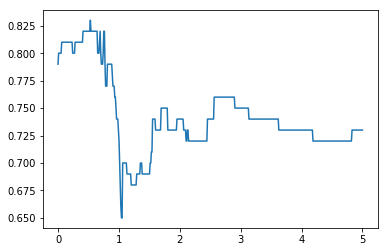

In [40]:
# Q18
plt.plot(lamda_list, accuracy2)
plt.show()

In [41]:
# Q19
max_accuracy2 = max(accuracy2)
maxLamda2 = lamda_list[accuracy2.index(max_accuracy2)]
print(maxLamda2, max_accuracy2)

0.531062124248497 0.83


     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  2.3351e+01 -2.1160e+04  2e+04  2e-02  2e+01  2e+00
 2:  3.8552e+01 -1.5674e+04  2e+04  1e-02  1e+01  3e+00
 3: -4.8809e+01 -6.8138e+03  8e+03  5e-03  5e+00  3e+00
 4: -3.8686e+02 -4.3152e+03  6e+03  3e-03  3e+00  3e+00
 5: -1.6886e+03 -5.4402e+03  9e+03  3e-03  3e+00  5e+00
 6: -2.2267e+03 -5.9767e+03  1e+04  3e-03  3e+00  6e+00
 7: -3.3361e+03 -5.7366e+03  8e+03  2e-03  2e+00  5e+00
 8: -4.2343e+03 -5.7148e+03  6e+03  1e-03  1e+00  4e+00
 9: -4.2886e+03 -5.4875e+03  5e+03  1e-03  9e-01  4e+00
10: -5.0307e+03 -5.4449e+03  2e+03  3e-04  3e-01  1e+00
11: -5.2021e+03 -5.4500e+03  1e+03  2e-04  2e-01  1e+00
12: -5.2737e+03 -5.4499e+03  9e+02  1e-04  1e-01  8e-01
13: -5.3924e+03 -5.4841e+03  5e+02  7e-05  7e-02  4e-01
14: -5.4083e+03 -5.4865e+03  4e+02  6e-05  6e-02  4e-01
15: -5.4938e+03 -5.5130e+03  1e+02  2e-05  1e-02  9e-02
16: -5.5095e+03 -5.5163e+03  3e+01  5e-06  5e-03  

0.66
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  3.0416e+01 -2.1097e+04  2e+04  2e-02  2e+01  2e+00
 2:  6.0236e+01 -1.5568e+04  2e+04  1e-02  1e+01  3e+00
 3: -7.7599e+00 -6.7365e+03  8e+03  5e-03  5e+00  3e+00
 4: -2.9549e+02 -3.8813e+03  5e+03  3e-03  3e+00  2e+00
 5: -1.4788e+03 -5.2056e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.9192e+03 -5.6218e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.8743e+03 -5.3253e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.7228e+03 -5.2104e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.9591e+03 -4.9926e+03  4e+03  8e-04  7e-01  3e+00
10: -4.5808e+03 -4.9646e+03  2e+03  3e-04  3e-01  1e+00
11: -4.7755e+03 -4.9719e+03  8e+02  2e-04  1e-01  6e-01
12: -4.8503e+03 -4.9854e+03  6e+02  1e-04  1e-01  5e-01
13: -4.9062e+03 -4.9906e+03  4e+02  7e-05  6e-02  3e-01
14: -4.9594e+03 -5.0053e+03  2e+02  4e-05  3e-02  2e-01
15: -4.9975e+03 -5.0186e+03  9e+01  2e-05  2e-02  9e-02
16: -5.0062e+03 -5.0204e+03  6e+01  1e-05  1e

0.67
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  3.7168e+01 -2.1035e+04  2e+04  2e-02  1e+01  2e+00
 2:  8.0688e+01 -1.5463e+04  2e+04  1e-02  1e+01  3e+00
 3:  2.8442e+01 -6.6400e+03  8e+03  5e-03  5e+00  3e+00
 4: -2.2389e+02 -3.4967e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.2932e+03 -4.9616e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.6599e+03 -5.2787e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.4899e+03 -4.9485e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.2456e+03 -4.7777e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.5742e+03 -4.6421e+03  4e+03  9e-04  8e-01  3e+00
10: -4.1082e+03 -4.5741e+03  2e+03  4e-04  3e-01  1e+00
11: -4.3166e+03 -4.5552e+03  1e+03  2e-04  2e-01  7e-01
12: -4.4220e+03 -4.5496e+03  5e+02  1e-04  9e-02  4e-01
13: -4.4774e+03 -4.5581e+03  3e+02  6e-05  6e-02  3e-01
14: -4.5391e+03 -4.5727e+03  1e+02  3e-05  2e-02  1e-01
15: -4.5520e+03 -4.5739e+03  9e+01  2e-05  2e-02  8e-02
16: -4.5714e+03 -4.5801e+03  4e+01  7e-06  6e

0.71
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  4.4681e+01 -2.0963e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.0316e+02 -1.5342e+04  2e+04  1e-02  1e+01  3e+00
 3:  6.5704e+01 -6.5076e+03  8e+03  5e-03  5e+00  3e+00
 4: -1.4860e+02 -3.2468e+03  4e+03  2e-03  2e+00  2e+00
 5: -1.1025e+03 -4.5637e+03  8e+03  3e-03  2e+00  4e+00
 6: -1.4104e+03 -4.8100e+03  9e+03  3e-03  2e+00  5e+00
 7: -2.0649e+03 -4.5175e+03  7e+03  2e-03  2e+00  5e+00
 8: -2.7770e+03 -4.2888e+03  5e+03  1e-03  1e+00  3e+00
 9: -3.0569e+03 -4.1766e+03  4e+03  9e-04  8e-01  3e+00
10: -3.5731e+03 -4.0858e+03  2e+03  4e-04  4e-01  2e+00
11: -3.8644e+03 -4.0812e+03  9e+02  2e-04  2e-01  7e-01
12: -3.9873e+03 -4.0829e+03  4e+02  8e-05  7e-02  3e-01
13: -4.0505e+03 -4.0891e+03  2e+02  3e-05  3e-02  1e-01
14: -4.0740e+03 -4.0926e+03  7e+01  1e-05  1e-02  7e-02
15: -4.0916e+03 -4.0970e+03  2e+01  4e-06  4e-03  2e-02
16: -4.0936e+03 -4.0974e+03  1e+01  3e-06  3e

0.72
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.1830e+01 -2.0891e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.2374e+02 -1.5265e+04  2e+04  1e-02  1e+01  3e+00
 3:  9.8411e+01 -6.3700e+03  8e+03  5e-03  4e+00  3e+00
 4: -8.6289e+01 -3.0997e+03  4e+03  2e-03  2e+00  2e+00
 5: -8.1868e+02 -3.9338e+03  6e+03  2e-03  2e+00  3e+00
 6: -1.4641e+03 -4.0721e+03  7e+03  2e-03  2e+00  4e+00
 7: -1.6951e+03 -3.9972e+03  7e+03  2e-03  2e+00  4e+00
 8: -2.4004e+03 -3.8226e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.8731e+03 -3.7363e+03  3e+03  7e-04  6e-01  2e+00
10: -2.9878e+03 -3.5636e+03  2e+03  5e-04  4e-01  2e+00
11: -3.4013e+03 -3.6169e+03  8e+02  2e-04  2e-01  7e-01
12: -3.5514e+03 -3.6276e+03  3e+02  6e-05  5e-02  3e-01
13: -3.6046e+03 -3.6389e+03  1e+02  3e-05  2e-02  1e-01
14: -3.6329e+03 -3.6442e+03  4e+01  9e-06  8e-03  4e-02
15: -3.6440e+03 -3.6467e+03  1e+01  2e-06  2e-03  1e-02
16: -3.6469e+03 -3.6474e+03  2e+00  4e-07  3e

0.68
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.8645e+01 -2.0820e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.4219e+02 -1.5240e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.2676e+02 -6.2177e+03  8e+03  5e-03  4e+00  2e+00
 4: -3.8441e+01 -2.9649e+03  4e+03  2e-03  2e+00  2e+00
 5: -5.9605e+02 -3.3545e+03  5e+03  2e-03  2e+00  3e+00
 6: -1.1640e+03 -3.4147e+03  5e+03  2e-03  2e+00  3e+00
 7: -1.4742e+03 -3.4248e+03  5e+03  2e-03  1e+00  3e+00
 8: -2.0350e+03 -3.4009e+03  4e+03  1e-03  9e-01  3e+00
 9: -2.3067e+03 -3.2896e+03  3e+03  8e-04  7e-01  2e+00
10: -2.5722e+03 -3.2111e+03  2e+03  5e-04  4e-01  2e+00
11: -2.9082e+03 -3.2008e+03  1e+03  2e-04  2e-01  9e-01
12: -3.0813e+03 -3.2068e+03  5e+02  1e-04  9e-02  4e-01
13: -3.1693e+03 -3.2037e+03  1e+02  3e-05  2e-02  1e-01
14: -3.1950e+03 -3.2099e+03  6e+01  1e-05  1e-02  6e-02
15: -3.2070e+03 -3.2125e+03  2e+01  4e-06  4e-03  2e-02
16: -3.2129e+03 -3.2139e+03  4e+00  8e-07  7e

20: -2.8502e+03 -2.8502e+03  2e-05  5e-12  4e-09  2e-08
Optimal solution found.
0.69
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.5150e+01 -2.0749e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.5921e+02 -1.5215e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.5146e+02 -6.0370e+03  7e+03  5e-03  4e+00  2e+00
 4: -1.8468e+00 -2.8312e+03  3e+03  2e-03  2e+00  1e+00
 5: -3.9969e+02 -2.8199e+03  4e+03  2e-03  2e+00  2e+00
 6: -9.5520e+02 -2.8950e+03  4e+03  2e-03  1e+00  2e+00
 7: -1.2598e+03 -2.9638e+03  4e+03  1e-03  1e+00  3e+00
 8: -1.6581e+03 -2.9829e+03  4e+03  1e-03  9e-01  3e+00
 9: -1.8918e+03 -2.8646e+03  3e+03  8e-04  6e-01  2e+00
10: -2.0223e+03 -2.7619e+03  3e+03  6e-04  5e-01  2e+00
11: -2.4789e+03 -2.7575e+03  1e+03  2e-04  2e-01  8e-01
12: -2.6271e+03 -2.7698e+03  5e+02  1e-04  1e-01  5e-01
13: -2.7532e+03 -2.7836e+03  1e+02  2e-05  2e-02  1e-01
14: -2.7738e+03 -2.7870e+03  5e+01  1e-05  9e-03  5e-02
15: -2.7824e+03 -2.78

17: -2.4379e+03 -2.4383e+03  2e+00  3e-07  3e-04  1e-03
18: -2.4383e+03 -2.4384e+03  1e-01  2e-08  2e-05  1e-04
19: -2.4384e+03 -2.4384e+03  1e-03  3e-10  2e-07  1e-06
20: -2.4384e+03 -2.4384e+03  1e-05  3e-12  2e-09  1e-08
Optimal solution found.
0.67
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.1369e+01 -2.0678e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.7497e+02 -1.5188e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.7307e+02 -5.8319e+03  7e+03  5e-03  4e+00  2e+00
 4:  2.9145e+01 -2.6800e+03  3e+03  2e-03  2e+00  1e+00
 5: -2.2653e+02 -2.4103e+03  4e+03  2e-03  1e+00  2e+00
 6: -8.1079e+02 -2.4604e+03  4e+03  1e-03  1e+00  2e+00
 7: -1.0338e+03 -2.5384e+03  4e+03  1e-03  1e+00  2e+00
 8: -1.3228e+03 -2.5841e+03  4e+03  1e-03  8e-01  2e+00
 9: -1.5602e+03 -2.4222e+03  3e+03  7e-04  6e-01  2e+00
10: -1.8866e+03 -2.3954e+03  2e+03  4e-04  3e-01  1e+00
11: -2.0527e+03 -2.3488e+03  1e+03  2e-04  2e-01  9e-01
12: -2.2457e+03 -2.37

0.71
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.7322e+01 -2.0608e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.8960e+02 -1.5162e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.9200e+02 -5.6056e+03  7e+03  5e-03  4e+00  2e+00
 4:  5.5690e+01 -2.5206e+03  3e+03  2e-03  2e+00  1e+00
 5: -1.1741e+02 -2.0733e+03  3e+03  2e-03  1e+00  2e+00
 6: -7.0068e+02 -2.0442e+03  3e+03  1e-03  8e-01  2e+00
 7: -8.4518e+02 -2.0925e+03  3e+03  1e-03  8e-01  2e+00
 8: -1.0487e+03 -2.1738e+03  3e+03  9e-04  7e-01  2e+00
 9: -1.1652e+03 -2.0723e+03  3e+03  7e-04  6e-01  2e+00
10: -1.4964e+03 -2.0092e+03  2e+03  4e-04  3e-01  1e+00
11: -1.6120e+03 -1.9896e+03  1e+03  3e-04  2e-01  1e+00
12: -1.8201e+03 -1.9863e+03  6e+02  1e-04  1e-01  5e-01
13: -1.9385e+03 -1.9916e+03  2e+02  4e-05  3e-02  2e-01
14: -1.9770e+03 -1.9983e+03  8e+01  2e-05  1e-02  8e-02
15: -1.9934e+03 -2.0015e+03  3e+01  7e-06  5e-03  3e-02
16: -2.0007e+03 -2.0028e+03  7e+00  2e-06  1e

0.71
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.3028e+01 -2.0538e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.0320e+02 -1.5134e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.0857e+02 -5.3606e+03  6e+03  4e-03  3e+00  2e+00
 4:  7.7999e+01 -2.3553e+03  3e+03  2e-03  1e+00  1e+00
 5: -4.2081e+01 -1.7699e+03  3e+03  1e-03  1e+00  1e+00
 6: -5.6503e+02 -1.6318e+03  2e+03  9e-04  7e-01  1e+00
 7: -7.1114e+02 -1.6917e+03  2e+03  8e-04  6e-01  2e+00
 8: -8.2265e+02 -1.7516e+03  3e+03  7e-04  6e-01  2e+00
 9: -9.2661e+02 -1.7035e+03  2e+03  6e-04  5e-01  2e+00
10: -1.1425e+03 -1.6244e+03  2e+03  4e-04  3e-01  1e+00
11: -1.3465e+03 -1.6347e+03  1e+03  2e-04  2e-01  8e-01
12: -1.4213e+03 -1.6303e+03  7e+02  2e-04  1e-01  6e-01
13: -1.5658e+03 -1.6390e+03  3e+02  6e-05  4e-02  2e-01
14: -1.5976e+03 -1.6387e+03  1e+02  3e-05  3e-02  1e-01
15: -1.6268e+03 -1.6435e+03  6e+01  1e-05  1e-02  6e-02
16: -1.6399e+03 -1.6457e+03  2e+01  5e-06  4e

0.7
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.7735e+01 -2.0478e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.1413e+02 -1.5110e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.2108e+02 -5.1371e+03  6e+03  4e-03  3e+00  2e+00
 4:  9.4124e+01 -2.2085e+03  3e+03  2e-03  1e+00  1e+00
 5:  4.2182e+00 -1.5247e+03  2e+03  1e-03  9e-01  1e+00
 6: -3.9115e+02 -1.3605e+03  2e+03  8e-04  6e-01  1e+00
 7: -5.7658e+02 -1.4457e+03  2e+03  7e-04  5e-01  1e+00
 8: -6.7885e+02 -1.4401e+03  2e+03  6e-04  5e-01  1e+00
 9: -7.9188e+02 -1.4287e+03  2e+03  5e-04  4e-01  1e+00
10: -8.9164e+02 -1.3699e+03  1e+03  4e-04  3e-01  1e+00
11: -1.0239e+03 -1.3216e+03  1e+03  2e-04  2e-01  8e-01
12: -1.1681e+03 -1.3340e+03  6e+02  1e-04  1e-01  5e-01
13: -1.2156e+03 -1.3343e+03  4e+02  1e-04  7e-02  4e-01
14: -1.3093e+03 -1.3450e+03  1e+02  3e-05  2e-02  1e-01
15: -1.3270e+03 -1.3481e+03  7e+01  2e-05  1e-02  7e-02
16: -1.3431e+03 -1.3508e+03  3e+01  6e-06  5e-

0.7
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.2284e+01 -2.0418e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.2443e+02 -1.5085e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.3217e+02 -4.9025e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.0770e+02 -2.0565e+03  3e+03  2e-03  1e+00  1e+00
 5:  3.7658e+01 -1.2874e+03  2e+03  1e-03  8e-01  1e+00
 6: -2.4826e+02 -1.1634e+03  2e+03  7e-04  5e-01  1e+00
 7: -4.3973e+02 -1.2320e+03  2e+03  6e-04  5e-01  1e+00
 8: -5.2409e+02 -1.2274e+03  2e+03  6e-04  4e-01  1e+00
 9: -6.9168e+02 -1.1699e+03  1e+03  4e-04  3e-01  1e+00
10: -7.6347e+02 -1.0869e+03  1e+03  3e-04  2e-01  8e-01
11: -8.7772e+02 -1.0593e+03  6e+02  1e-04  1e-01  5e-01
12: -9.8962e+02 -1.0587e+03  2e+02  6e-05  4e-02  2e-01
13: -1.0294e+03 -1.0646e+03  1e+02  3e-05  2e-02  1e-01
14: -1.0303e+03 -1.0640e+03  1e+02  3e-05  2e-02  1e-01
15: -1.0547e+03 -1.0663e+03  4e+01  9e-06  7e-03  4e-02
16: -1.0644e+03 -1.0671e+03  9e+00  2e-06  2e-

21: -8.1541e+02 -8.1541e+02  1e-04  4e-11  3e-08  1e-07
Optimal solution found.
0.68
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.7402e+01 -2.0348e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.3573e+02 -1.5056e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.4715e+02 -4.7186e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.2160e+02 -1.9009e+03  2e+03  2e-03  1e+00  1e+00
 5:  6.6032e+01 -1.0302e+03  1e+03  9e-04  6e-01  9e-01
 6: -9.3664e+01 -9.6134e+02  2e+03  7e-04  5e-01  1e+00
 7: -2.6066e+02 -9.7603e+02  2e+03  6e-04  4e-01  1e+00
 8: -2.7588e+02 -9.4015e+02  2e+03  5e-04  4e-01  1e+00
 9: -4.4994e+02 -8.7274e+02  1e+03  3e-04  2e-01  9e-01
10: -5.5177e+02 -8.3146e+02  8e+02  2e-04  2e-01  6e-01
11: -6.2627e+02 -7.8999e+02  5e+02  1e-04  9e-02  4e-01
12: -7.0960e+02 -7.8071e+02  2e+02  6e-05  4e-02  2e-01
13: -7.4317e+02 -7.7634e+02  1e+02  3e-05  2e-02  9e-02
14: -7.6479e+02 -7.7534e+02  3e+01  8e-06  6e-03  3e-02
15: -7.7273e+02 -7.75

14: -5.4121e+02 -5.5069e+02  3e+01  8e-06  5e-03  3e-02
15: -5.4794e+02 -5.5016e+02  6e+00  2e-06  1e-03  6e-03
16: -5.4937e+02 -5.5004e+02  2e+00  5e-07  4e-04  2e-03
17: -5.4990e+02 -5.5001e+02  3e-01  8e-08  6e-05  3e-04
18: -5.4999e+02 -5.5000e+02  5e-02  1e-08  9e-06  5e-05
19: -5.5000e+02 -5.5000e+02  1e-02  3e-09  2e-06  1e-05
20: -5.5000e+02 -5.5000e+02  1e-04  4e-11  2e-08  1e-07
Optimal solution found.
0.66
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  1.0233e+02 -2.0279e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.4632e+02 -1.5025e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.6876e+02 -4.8986e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.3364e+02 -1.8359e+03  2e+03  2e-03  1e+00  9e-01
 5:  8.8099e+01 -8.1478e+02  1e+03  7e-04  5e-01  7e-01
 6:  2.9662e+01 -7.3042e+02  1e+03  6e-04  4e-01  1e+00
 7: -1.2953e+02 -7.0008e+02  1e+03  5e-04  3e-01  1e+00
 8: -1.2892e+02 -6.5508e+02  1e+03  4e-04  3e-01  9e-01
 9: -1.5638e+02 -6.41

0.68
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0641e+02 -2.0219e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.5487e+02 -1.4999e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.8627e+02 -5.1136e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.4156e+02 -1.7916e+03  2e+03  2e-03  1e+00  9e-01
 5:  9.9761e+01 -6.9710e+02  1e+03  6e-04  4e-01  6e-01
 6:  8.6945e+01 -5.4225e+02  1e+03  5e-04  3e-01  7e-01
 7: -4.1713e+01 -4.0988e+02  8e+02  3e-04  2e-01  6e-01
 8: -8.1684e+01 -4.1001e+02  7e+02  3e-04  2e-01  6e-01
 9: -1.2609e+02 -3.8962e+02  6e+02  2e-04  1e-01  5e-01
10: -1.7513e+02 -3.6256e+02  5e+02  2e-04  1e-01  4e-01
11: -2.0433e+02 -3.4754e+02  4e+02  1e-04  8e-02  3e-01
12: -2.5412e+02 -3.3555e+02  2e+02  7e-05  4e-02  2e-01
13: -2.8148e+02 -3.2460e+02  1e+02  3e-05  2e-02  1e-01
14: -2.8848e+02 -3.2328e+02  9e+01  3e-05  2e-02  9e-02
15: -3.1215e+02 -3.2042e+02  2e+01  7e-06  4e-03  2e-02
16: -3.1698e+02 -3.1960e+02  7e+00  2e-06  1e

22: -1.7171e+02 -1.7176e+02  1e-01  4e-08  2e-05  1e-04
23: -1.7174e+02 -1.7175e+02  3e-02  8e-09  5e-06  3e-05
24: -1.7175e+02 -1.7175e+02  5e-04  1e-10  9e-08  5e-07
25: -1.7175e+02 -1.7175e+02  5e-06  1e-12  9e-10  5e-09
Optimal solution found.
0.7
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1037e+02 -2.0160e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.6299e+02 -1.4972e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.0299e+02 -5.3133e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.5088e+02 -1.7362e+03  2e+03  2e-03  1e+00  8e-01
 5:  1.0438e+02 -5.7128e+02  8e+02  5e-04  3e-01  5e-01
 6:  1.0487e+02 -3.8385e+02  7e+02  4e-04  2e-01  5e-01
 7:  3.9756e+01 -2.1481e+02  4e+02  2e-04  1e-01  4e-01
 8: -2.0772e+01 -2.1852e+02  4e+02  2e-04  1e-01  4e-01
 9: -1.8466e+01 -2.0731e+02  4e+02  2e-04  1e-01  3e-01
10: -3.6564e+01 -1.9760e+02  4e+02  1e-04  8e-02  3e-01
11: -5.5750e+01 -1.8729e+02  3e+02  1e-04  7e-02  3e-01
12: -5.9417e+01 -1.762

0.64
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1420e+02 -2.0100e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.7069e+02 -1.4944e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.1896e+02 -5.4982e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.5904e+02 -1.6742e+03  2e+03  1e-03  9e-01  8e-01
 5:  1.0356e+02 -4.6176e+02  7e+02  5e-04  3e-01  4e-01
 6:  9.9067e+01 -2.3571e+02  4e+02  3e-04  2e-01  4e-01
 7:  4.3159e+01 -6.5415e+01  1e+02  9e-05  5e-02  1e-01
 8:  1.7774e+01 -3.0279e+01  7e+01  4e-05  2e-02  7e-02
 9:  1.1561e+01 -2.5020e+01  6e+01  3e-05  2e-02  7e-02
10:  4.1717e+00 -2.2074e+01  5e+01  2e-05  1e-02  5e-02
11:  3.5500e+00 -2.0875e+01  5e+01  2e-05  1e-02  5e-02
12: -8.7862e+00 -1.4346e+01  1e+01  4e-06  3e-03  9e-03
13: -1.1166e+01 -1.2661e+01  3e+00  1e-06  7e-04  3e-03
14: -1.1818e+01 -1.2264e+01  9e-01  4e-07  2e-04  8e-04
15: -1.2001e+01 -1.2159e+01  3e-01  1e-07  8e-05  3e-04
16: -1.2080e+01 -1.2115e+01  7e-02  3e-08  2e

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2036e+02 -2.0001e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.8627e+02 -1.5052e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.4805e+02 -5.8198e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.7159e+02 -1.5678e+03  2e+03  1e-03  8e-01  7e-01
 5:  9.4243e+01 -3.0913e+02  5e+02  3e-04  2e-01  3e-01
 6:  5.0326e+01 -5.3834e+01  1e+02  8e-05  5e-02  1e-01
 7:  6.4228e+00 -1.4249e+00  8e+00  6e-06  4e-03  8e-03
 8:  7.2015e-02 -1.6081e-02  9e-02  7e-08  4e-05  9e-05
 9:  7.1999e-04 -1.6078e-04  9e-04  7e-10  4e-07  9e-07
10:  7.1999e-06 -1.6078e-06  9e-06  7e-12  4e-09  9e-09
11:  7.1999e-08 -1.6078e-08  9e-08  7e-14  4e-11  9e-11
Optimal solution found.
0.83
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2096e+02 -1.9991e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.8778e+02 -1.5063e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.5087e+02 -5.8500

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2680e+02 -1.9892e+04  2e+04  2e-02  9e+00  2e+00
 2:  3.0246e+02 -1.5162e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.7828e+02 -6.1341e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.8235e+02 -1.4317e+03  2e+03  1e-03  7e-01  7e-01
 5:  8.2318e+01 -2.5809e+02  4e+02  3e-04  2e-01  2e-01
 6:  1.8891e+01 -8.5868e+00  3e+01  2e-05  1e-02  3e-02
 7:  2.4382e-01 -8.7759e-02  3e-01  3e-07  1e-04  3e-04
 8:  2.4374e-03 -8.7731e-04  3e-03  3e-09  1e-06  3e-06
 9:  2.4374e-05 -8.7730e-06  3e-05  3e-11  1e-08  3e-08
10:  2.4374e-07 -8.7730e-08  3e-07  3e-13  1e-10  3e-10
11:  2.4374e-09 -8.7730e-10  3e-09  3e-15  3e-12  3e-12
Optimal solution found.
0.85
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2737e+02 -1.9883e+04  2e+04  2e-02  9e+00  2e+00
 2:  3.0389e+02 -1.5171e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.8094e+02 -6.1607

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3284e+02 -1.9789e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.1764e+02 -1.5260e+04  2e+04  1e-02  7e+00  3e+00
 3:  4.0685e+02 -6.4165e+03  8e+03  5e-03  3e+00  2e+00
 4:  1.9027e+02 -1.2789e+03  2e+03  1e-03  6e-01  6e-01
 5:  6.9539e+01 -2.2673e+02  3e+02  2e-04  1e-01  1e-01
 6:  1.3834e+01 -3.2353e+00  2e+01  1e-05  7e-03  2e-02
 7:  1.4186e-01 -3.3124e-02  2e-01  1e-07  7e-05  2e-04
 8:  1.4184e-03 -3.3120e-04  2e-03  1e-09  7e-07  2e-06
 9:  1.4184e-05 -3.3120e-06  2e-05  1e-11  7e-09  2e-08
10:  1.4184e-07 -3.3120e-08  2e-07  1e-13  7e-11  2e-10
11:  1.4184e-09 -3.3120e-10  2e-09  1e-15  2e-12  2e-12
Optimal solution found.
0.85
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3330e+02 -1.9784e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.1890e+02 -1.5267e+04  2e+04  1e-02  7e+00  3e+00
 3:  4.0942e+02 -6.4457

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3775e+02 -1.9735e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.3123e+02 -1.5334e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.3428e+02 -6.7177e+03  8e+03  6e-03  3e+00  3e+00
 4:  1.9611e+02 -1.1114e+03  1e+03  1e-03  5e-01  5e-01
 5:  6.3861e+01 -2.0788e+02  3e+02  2e-04  1e-01  1e-01
 6:  8.8062e+00 -2.4709e+00  1e+01  9e-06  5e-03  1e-02
 7:  8.8810e-02 -2.4909e-02  1e-01  9e-08  5e-05  1e-04
 8:  8.8804e-04 -2.4907e-04  1e-03  9e-10  5e-07  1e-06
 9:  8.8804e-06 -2.4907e-06  1e-05  9e-12  5e-09  1e-08
10:  8.8804e-08 -2.4907e-08  1e-07  9e-14  5e-11  1e-10
11:  8.8804e-10 -2.4907e-10  1e-09  9e-16  3e-12  1e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3819e+02 -1.9730e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.3242e+02 -1.5341e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.3670e+02 -6.7430

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4281e+02 -1.9674e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.4521e+02 -1.5407e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.6247e+02 -6.9995e+03  9e+03  6e-03  3e+00  3e+00
 4:  1.9953e+02 -9.1046e+02  1e+03  9e-04  4e-01  5e-01
 5:  5.6073e+01 -1.4043e+02  2e+02  2e-04  7e-02  9e-02
 6:  3.1551e+00 -1.5606e+00  5e+00  4e-06  2e-03  4e-03
 7:  3.1540e-02 -1.5598e-02  5e-02  4e-08  2e-05  4e-05
 8:  3.1539e-04 -1.5598e-04  5e-04  4e-10  2e-07  4e-07
 9:  3.1539e-06 -1.5598e-06  5e-06  4e-12  2e-09  4e-09
10:  3.1539e-08 -1.5598e-08  5e-08  4e-14  2e-11  4e-11
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4322e+02 -1.9668e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.4634e+02 -1.5413e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.6475e+02 -7.0210e+03  9e+03  6e-03  3e+00  3e+00
 4:  1.9968e+02 -8.9298

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4759e+02 -1.9609e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.5840e+02 -1.5473e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.8908e+02 -7.2387e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.0005e+02 -6.9407e+02  1e+03  7e-04  3e-01  4e-01
 5:  4.1303e+01 -7.2510e+01  1e+02  9e-05  4e-02  6e-02
 6:  7.7819e-01 -7.3798e-01  2e+00  1e-06  5e-04  9e-04
 7:  7.7794e-03 -7.3772e-03  2e-02  1e-08  5e-06  9e-06
 8:  7.7794e-05 -7.3772e-05  2e-04  1e-10  5e-08  9e-08
 9:  7.7794e-07 -7.3772e-07  2e-06  1e-12  5e-10  9e-10
10:  7.7794e-09 -7.3772e-09  2e-08  1e-14  6e-12  9e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4797e+02 -1.9603e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.5947e+02 -1.5478e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.9123e+02 -7.2568e+03  9e+03  6e-03  3e+00  3e+00
 4:  1.9997e+02 -6.7543

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.5211e+02 -1.9541e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.7085e+02 -1.5531e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.1428e+02 -7.4406e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.0599e+02 -6.4371e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.3241e+01 -4.6845e+01  8e+01  6e-05  3e-02  4e-02
 6:  4.1046e-01 -4.6741e-01  9e-01  7e-07  3e-04  5e-04
 7:  4.1039e-03 -4.6732e-03  9e-03  7e-09  3e-06  5e-06
 8:  4.1039e-05 -4.6732e-05  9e-05  7e-11  3e-08  5e-08
 9:  4.1039e-07 -4.6732e-07  9e-07  7e-13  3e-10  5e-10
10:  4.1039e-09 -4.6732e-09  9e-09  7e-15  3e-12  5e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.5248e+02 -1.9536e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.7186e+02 -1.5536e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.1632e+02 -7.4560e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.0674e+02 -6.4660

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5641e+02 -1.9472e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8262e+02 -1.5583e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.3823e+02 -7.6101e+03  9e+03  7e-03  3e+00  3e+00
 4:  2.1427e+02 -6.7594e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.9848e+01 -3.6287e+01  7e+01  5e-05  2e-02  3e-02
 6:  3.2448e-01 -3.6031e-01  7e-01  5e-07  2e-04  4e-04
 7:  3.2444e-03 -3.6027e-03  7e-03  5e-09  2e-06  4e-06
 8:  3.2444e-05 -3.6027e-05  7e-05  5e-11  2e-08  4e-08
 9:  3.2444e-07 -3.6027e-07  7e-07  5e-13  2e-10  4e-10
10:  3.2444e-09 -3.6027e-09  7e-09  6e-15  3e-12  4e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5676e+02 -1.9466e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8357e+02 -1.5587e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.4017e+02 -7.6229e+03  9e+03  7e-03  3e+00  3e+00
 4:  2.1489e+02 -6.7839

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.6050e+02 -1.9399e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9374e+02 -1.5630e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.6106e+02 -7.7509e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2122e+02 -7.0265e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.5762e+01 -2.2947e+01  5e+01  4e-05  2e-02  3e-02
 6:  2.6341e-01 -2.2932e-01  5e-01  4e-07  2e-04  3e-04
 7:  2.6338e-03 -2.2930e-03  5e-03  4e-09  2e-06  3e-06
 8:  2.6338e-05 -2.2930e-05  5e-05  4e-11  2e-08  3e-08
 9:  2.6338e-07 -2.2930e-07  5e-07  4e-13  2e-10  3e-10
10:  2.6338e-09 -2.2930e-09  5e-09  4e-15  2e-12  3e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.6083e+02 -1.9393e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9464e+02 -1.5633e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.6292e+02 -7.7615e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2175e+02 -7.0461

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6439e+02 -1.9325e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0427e+02 -1.5670e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.8288e+02 -7.8665e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2703e+02 -7.2347e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2456e+01 -1.0691e+01  3e+01  3e-05  1e-02  2e-02
 6:  2.2494e-01 -1.0703e-01  3e-01  3e-07  1e-04  2e-04
 7:  2.2492e-03 -1.0702e-03  3e-03  3e-09  1e-06  2e-06
 8:  2.2492e-05 -1.0702e-05  3e-05  3e-11  1e-08  2e-08
 9:  2.2492e-07 -1.0702e-07  3e-07  3e-13  1e-10  2e-10
10:  2.2492e-09 -1.0702e-09  3e-09  3e-15  1e-12  2e-12
Optimal solution found.
0.85
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6471e+02 -1.9319e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0512e+02 -1.5674e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.8466e+02 -7.8751e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.2747e+02 -7.2493

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6811e+02 -1.9250e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.1423e+02 -1.5706e+04  2e+04  1e-02  5e+00  3e+00
 3:  6.0378e+02 -7.9595e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.3185e+02 -7.3821e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2550e+01 -1.0324e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.2570e-01 -1.0335e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.2568e-03 -1.0334e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.2568e-05 -1.0334e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.2568e-07 -1.0334e-07  3e-07  3e-13  9e-11  2e-10
10:  2.2568e-09 -1.0334e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.
0.86
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6842e+02 -1.9243e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1504e+02 -1.5709e+04  2e+04  1e-02  5e+00  3e+00
 3:  6.0549e+02 -7.9663e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.3221e+02 -7.3916

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.7167e+02 -1.9172e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2366e+02 -1.5737e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.2385e+02 -8.0324e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.3588e+02 -7.4824e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2619e+01 -9.9275e+00  3e+01  3e-05  9e-03  3e-02
 6:  2.2623e-01 -9.9347e-02  3e-01  3e-07  9e-05  3e-04
 7:  2.2621e-03 -9.9340e-04  3e-03  3e-09  9e-07  3e-06
 8:  2.2621e-05 -9.9340e-06  3e-05  3e-11  9e-09  3e-08
 9:  2.2621e-07 -9.9340e-08  3e-07  3e-13  9e-11  3e-10
10:  2.2621e-09 -9.9340e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.
0.86
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.7196e+02 -1.9166e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2443e+02 -1.5739e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.2549e+02 -8.0376e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.3621e+02 -7.4936

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7509e+02 -1.9094e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3259e+02 -1.5764e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.4314e+02 -8.0872e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.3975e+02 -7.5564e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2660e+01 -9.5572e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2663e-01 -9.5648e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2661e-03 -9.5643e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2661e-05 -9.5642e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2661e-07 -9.5642e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2661e-09 -9.5642e-10  3e-09  3e-15  2e-12  3e-12
Optimal solution found.
0.86
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7536e+02 -1.9087e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3332e+02 -1.5766e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.4472e+02 -8.0910e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4005e+02 -7.5584

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7836e+02 -1.9013e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4105e+02 -1.5786e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.6172e+02 -8.1256e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4306e+02 -7.5637e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2546e+01 -9.1329e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2543e-01 -9.1386e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2541e-03 -9.1381e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2541e-05 -9.1380e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2541e-07 -9.1380e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2541e-09 -9.1380e-10  3e-09  3e-15  2e-12  3e-12
Optimal solution found.
0.86
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7863e+02 -1.9007e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4173e+02 -1.5788e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.6324e+02 -8.1281e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4331e+02 -7.5631

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.8150e+02 -1.8932e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4905e+02 -1.5804e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.7963e+02 -8.1492e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4962e+02 -7.9375e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.3186e+01 -9.4545e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.3183e-01 -9.4604e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.3182e-03 -9.4599e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.3182e-05 -9.4599e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.3182e-07 -9.4599e-08  3e-07  3e-13  8e-11  3e-10
10:  2.3182e-09 -9.4599e-10  3e-09  3e-15  2e-12  3e-12
Optimal solution found.
0.86
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.8176e+02 -1.8925e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4970e+02 -1.5806e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.8110e+02 -8.1505e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5021e+02 -7.9600

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8453e+02 -1.8850e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5663e+02 -1.5819e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.9692e+02 -8.1592e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5626e+02 -8.1731e+02  1e+03  9e-04  2e-01  3e-01
 5:  2.3268e+01 -9.5858e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.3261e-01 -9.5901e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.3260e-03 -9.5896e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.3260e-05 -9.5896e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.3260e-07 -9.5896e-08  3e-07  3e-13  8e-11  3e-10
10:  2.3260e-09 -9.5896e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8477e+02 -1.8843e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5724e+02 -1.5820e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.9834e+02 -8.1595e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5678e+02 -8.1895

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8744e+02 -1.8766e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6380e+02 -1.5830e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.1363e+02 -8.1567e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6213e+02 -8.3376e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.3083e+01 -9.6245e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.3072e-01 -9.6266e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.3071e-03 -9.6261e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.3071e-05 -9.6261e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.3071e-07 -9.6261e-08  3e-07  3e-13  7e-11  3e-10
10:  2.3071e-09 -9.6261e-10  3e-09  3e-15  8e-13  3e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8768e+02 -1.8759e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6438e+02 -1.5831e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.1500e+02 -8.1560e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6259e+02 -8.3483

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9025e+02 -1.8682e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7057e+02 -1.5838e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.2978e+02 -8.1428e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6727e+02 -8.4375e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2663e+01 -9.5853e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2648e-01 -9.5849e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2647e-03 -9.5845e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2647e-05 -9.5845e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2647e-07 -9.5845e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2647e-09 -9.5845e-10  3e-09  3e-15  2e-12  3e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9048e+02 -1.8675e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7112e+02 -1.5838e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.3111e+02 -8.1411e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6767e+02 -8.4431

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9296e+02 -1.8597e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7698e+02 -1.5843e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.4542e+02 -8.1181e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7169e+02 -8.4789e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2038e+01 -9.4808e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2019e-01 -9.4781e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2019e-03 -9.4777e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2019e-05 -9.4777e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2019e-07 -9.4777e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2019e-09 -9.4777e-10  3e-09  3e-15  9e-13  3e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9318e+02 -1.8590e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7750e+02 -1.5843e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.4670e+02 -8.1156e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7203e+02 -8.4798

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9557e+02 -1.8511e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8303e+02 -1.5844e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.6055e+02 -8.0836e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7542e+02 -8.4674e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1239e+01 -9.3220e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1217e-01 -9.3173e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1217e-03 -9.3169e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1217e-05 -9.3169e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1217e-07 -9.3169e-08  3e-07  2e-13  6e-11  3e-10
10:  2.1217e-09 -9.3169e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9579e+02 -1.8504e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8352e+02 -1.5844e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.6179e+02 -8.0803e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7570e+02 -8.4642

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9810e+02 -1.8424e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8874e+02 -1.5843e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.7520e+02 -8.0398e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7846e+02 -8.4084e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0295e+01 -9.1184e+00  3e+01  2e-05  6e-03  2e-02
 6:  2.0272e-01 -9.1120e-02  3e-01  2e-07  6e-05  2e-04
 7:  2.0272e-03 -9.1117e-04  3e-03  2e-09  6e-07  2e-06
 8:  2.0272e-05 -9.1117e-06  3e-05  2e-11  6e-09  2e-08
 9:  2.0272e-07 -9.1117e-08  3e-07  2e-13  6e-11  2e-10
10:  2.0272e-09 -9.1117e-10  3e-09  2e-15  9e-13  2e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9831e+02 -1.8417e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8920e+02 -1.5843e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.7640e+02 -8.0357e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7869e+02 -8.4015

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0055e+02 -1.8337e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.9413e+02 -1.5839e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8940e+02 -7.9873e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8085e+02 -8.3069e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.9248e+01 -8.9101e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.9225e-01 -8.9026e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.9224e-03 -8.9024e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.9224e-05 -8.9024e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.9224e-07 -8.9024e-08  3e-07  2e-13  5e-11  2e-10
10:  1.9224e-09 -8.9024e-10  3e-09  2e-15  6e-13  2e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0075e+02 -1.8330e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.9456e+02 -1.5839e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9057e+02 -7.9825e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8102e+02 -8.2967

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0291e+02 -1.8249e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9920e+02 -1.5833e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9957e+02 -8.0200e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8336e+02 -8.1788e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.8114e+01 -8.6839e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8092e-01 -8.6762e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8092e-03 -8.6759e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8092e-05 -8.6759e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.8092e-07 -8.6759e-08  3e-07  2e-13  5e-11  2e-10
10:  1.8092e-09 -8.6759e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0311e+02 -1.8242e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9961e+02 -1.5832e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0025e+02 -8.0261e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8357e+02 -8.1674

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0520e+02 -1.8161e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0398e+02 -1.5824e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0757e+02 -8.0860e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8573e+02 -8.0332e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.6962e+01 -8.4456e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.6942e-01 -8.4378e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.6942e-03 -8.4375e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.6942e-05 -8.4375e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.6942e-07 -8.4375e-08  3e-07  2e-13  5e-11  2e-10
10:  1.6942e-09 -8.4375e-10  3e-09  2e-15  2e-12  2e-12
Optimal solution found.
0.88
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0539e+02 -1.8153e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0436e+02 -1.5823e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0822e+02 -8.0908e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8590e+02 -8.0202

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0743e+02 -1.8072e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0847e+02 -1.5812e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1528e+02 -8.1366e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8759e+02 -7.8696e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.5820e+01 -8.1958e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.5802e-01 -8.1880e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.5802e-03 -8.1878e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.5802e-05 -8.1878e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.5802e-07 -8.1878e-08  2e-07  2e-13  4e-11  2e-10
10:  1.5802e-09 -8.1878e-10  2e-09  2e-15  7e-13  2e-12
Optimal solution found.
0.86
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0761e+02 -1.8064e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0884e+02 -1.5811e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1592e+02 -8.1402e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8772e+02 -7.8552

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0958e+02 -1.7982e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.1198e+02 -1.5804e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.2136e+02 -8.1704e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8858e+02 -7.6726e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.4636e+01 -7.9172e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.4620e-01 -7.9097e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.4620e-03 -7.9095e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.4620e-05 -7.9095e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.4620e-07 -7.9095e-08  2e-07  2e-13  4e-11  2e-10
10:  1.4620e-09 -7.9095e-10  2e-09  2e-15  1e-12  2e-12
Optimal solution found.
0.86
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0976e+02 -1.7975e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.1155e+02 -1.5808e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.2052e+02 -8.1694e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8826e+02 -7.6376

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.1167e+02 -1.7892e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0721e+02 -1.5848e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1237e+02 -8.1348e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8452e+02 -7.2439e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.2780e+01 -7.3905e+00  2e+01  2e-05  3e-03  2e-02
 6:  1.2767e-01 -7.3836e-02  2e-01  2e-07  3e-05  2e-04
 7:  1.2767e-03 -7.3835e-04  2e-03  2e-09  3e-07  2e-06
 8:  1.2767e-05 -7.3835e-06  2e-05  2e-11  3e-09  2e-08
 9:  1.2767e-07 -7.3835e-08  2e-07  2e-13  3e-11  2e-10
10:  1.2767e-09 -7.3835e-10  2e-09  2e-15  9e-13  2e-12
Optimal solution found.
0.86
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.1184e+02 -1.7885e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0684e+02 -1.5851e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1172e+02 -8.1298e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8415e+02 -7.2074

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1370e+02 -1.7802e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0314e+02 -1.5879e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0535e+02 -8.0572e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8235e+02 -7.1375e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.1607e+01 -7.2617e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1596e-01 -7.2552e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1596e-03 -7.2551e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1596e-05 -7.2551e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1596e-07 -7.2551e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1596e-09 -7.2551e-10  2e-09  2e-15  5e-13  1e-12
Optimal solution found.
0.86
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1386e+02 -1.7794e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0282e+02 -1.5881e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0484e+02 -8.0493e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8225e+02 -7.1418

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1567e+02 -1.7711e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9965e+02 -1.5899e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9978e+02 -7.9493e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8065e+02 -7.1410e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.0721e+01 -7.2630e+00  2e+01  1e-05  3e-03  1e-02
 6:  1.0712e-01 -7.2568e-02  2e-01  1e-07  3e-05  1e-04
 7:  1.0712e-03 -7.2567e-04  2e-03  1e-09  3e-07  1e-06
 8:  1.0712e-05 -7.2567e-06  2e-05  1e-11  3e-09  1e-08
 9:  1.0712e-07 -7.2567e-08  2e-07  1e-13  3e-11  1e-10
10:  1.0712e-09 -7.2567e-10  2e-09  1e-15  2e-12  1e-12
Optimal solution found.
0.86
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1583e+02 -1.7703e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9938e+02 -1.5900e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9937e+02 -7.9392e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8046e+02 -7.1369

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1705e+02 -1.7644e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9481e+02 -1.5924e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.9208e+02 -7.7999e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.7794e+02 -7.0909e+02  1e+03  8e-04  2e-01  4e-01
 5:  9.7820e+00 -7.2041e+00  2e+01  1e-05  3e-03  1e-02
 6:  9.7742e-02 -7.1983e-02  2e-01  1e-07  3e-05  1e-04
 7:  9.7740e-04 -7.1982e-04  2e-03  1e-09  3e-07  1e-06
 8:  9.7740e-06 -7.1982e-06  2e-05  1e-11  3e-09  1e-08
 9:  9.7740e-08 -7.1982e-08  2e-07  1e-13  3e-11  1e-10
10:  9.7740e-10 -7.1982e-10  2e-09  2e-15  8e-13  1e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1711e+02 -1.7642e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9424e+02 -1.5927e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.9116e+02 -7.7843e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.7766e+02 -7.0860

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1768e+02 -1.7611e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8854e+02 -1.5959e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8544e+02 -7.6557e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.7661e+02 -7.0918e+02  1e+03  8e-04  1e-01  4e-01
 5:  9.0243e+00 -7.2009e+00  2e+01  1e-05  2e-03  1e-02
 6:  9.0176e-02 -7.1955e-02  2e-01  1e-07  2e-05  1e-04
 7:  9.0175e-04 -7.1954e-04  2e-03  1e-09  2e-07  1e-06
 8:  9.0175e-06 -7.1954e-06  2e-05  1e-11  2e-09  1e-08
 9:  9.0175e-08 -7.1954e-08  2e-07  1e-13  2e-11  1e-10
10:  9.0175e-10 -7.1954e-10  2e-09  1e-15  7e-13  1e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1773e+02 -1.7608e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8807e+02 -1.5962e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8509e+02 -7.6445e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.7654e+02 -7.0909

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1826e+02 -1.7578e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8332e+02 -1.5985e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8188e+02 -7.5143e+03  9e+03  7e-03  1e+00  3e+00
 4:  2.7551e+02 -7.0460e+02  1e+03  8e-04  1e-01  4e-01
 5:  8.3394e+00 -7.1405e+00  2e+01  1e-05  2e-03  1e-02
 6:  8.3337e-02 -7.1355e-02  2e-01  1e-07  2e-05  1e-04
 7:  8.3336e-04 -7.1354e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.3336e-06 -7.1354e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.3336e-08 -7.1354e-08  2e-07  1e-13  2e-11  1e-10
10:  8.3336e-10 -7.1354e-10  2e-09  1e-15  6e-13  1e-12
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1830e+02 -1.7575e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8292e+02 -1.5987e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8165e+02 -7.5020e+03  9e+03  7e-03  1e+00  3e+00
 4:  2.7540e+02 -7.0390

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1878e+02 -1.7544e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7893e+02 -1.6003e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.7965e+02 -7.3611e+03  9e+03  7e-03  1e+00  3e+00
 4:  2.7393e+02 -6.9369e+02  1e+03  8e-04  1e-01  4e-01
 5:  7.6680e+00 -7.0090e+00  2e+01  1e-05  2e-03  9e-03
 6:  7.6631e-02 -7.0043e-02  2e-01  1e-07  2e-05  9e-05
 7:  7.6630e-04 -7.0043e-04  2e-03  1e-09  2e-07  9e-07
 8:  7.6630e-06 -7.0043e-06  2e-05  1e-11  2e-09  9e-09
 9:  7.6630e-08 -7.0043e-08  2e-07  1e-13  2e-11  9e-11
10:  7.6630e-10 -7.0043e-10  2e-09  1e-15  5e-13  9e-13
Optimal solution found.
0.87
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1882e+02 -1.7541e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7859e+02 -1.6004e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.7951e+02 -7.3479e+03  9e+03  7e-03  1e+00  3e+00
 4:  2.7378e+02 -6.9256

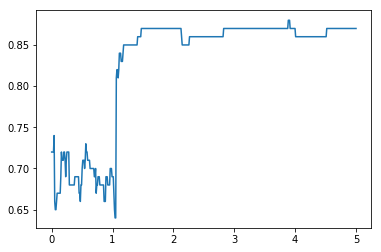

In [61]:
res2_2 = perform_IRL_3Attrs(optimalAction2, transition_probability,Rmax2 , lamda_list)
accuracy2_2 = res2_2['accuracy']
plt.plot(lamda_list, accuracy2_2)
plt.show()

In [63]:
max_accuracy2_2 = max(accuracy2_2)
maxLamda2_2 = lamda_list[accuracy2_2.index(max_accuracy2_2)]
print(maxLamda2_2, max_accuracy2_2)

3.8877755511022043 0.88


     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -2.9589e+00 -0.0000e+00  4e+02  1e+01  7e+00  3e+00
 2: -2.6646e+00 -0.0000e+00  2e+02  6e+00  3e+00  3e+00
 3: -2.5285e+00 -0.0000e+00  2e+02  4e+00  2e+00  3e+00
 4: -3.4162e+00 -0.0000e+00  4e+02  4e+00  2e+00  4e+00
 5: -8.0984e+00 -0.0000e+00  1e+03  4e+00  2e+00  8e+00
 6: -2.1778e+02 -0.0000e+00  2e+04  3e+00  2e+00  2e+02
 7: -2.1655e+04 -0.0000e+00  2e+06  3e+00  2e+00  2e+04
 8: -2.1655e+06 -0.0000e+00  2e+08  3e+00  2e+00  2e+06
 9: -2.1655e+08 -0.0000e+00  2e+10  3e+00  2e+00  2e+08
Certificate of dual infeasibility found.
0.83


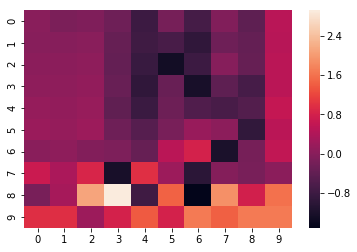

In [43]:
res = perform_IRL_4Attrs(optimalAction2, transition_probability, Rmax2, [maxLamda2])
er2 = np.zeros([10,10])
for s in range(100):
    y = int(s / height)
    x = int(s % height)
    er2[x,y] = res['reward'][s]
extracted_reward_max_lamda2 = er2
hm_er2 = sns.heatmap(extracted_reward_max_lamda2)

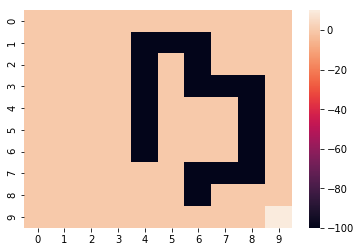

In [42]:
# Q20
hm_rfunc2 = sns.heatmap(Rfunc2)


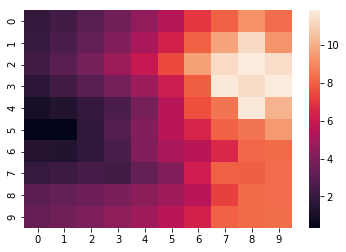

In [44]:
#Q21
Vs_max_lamda2 = np.zeros(height * width)
# calVs(Vs_max_lamda2, tp, extracted_reward_max_lamda2, discount, theta)
Vs_max_lamda2 = calVs_new(Vs_max_lamda2, tp, extracted_reward_max_lamda2, discount, theta)
Vs_max_lamda2_2d = Vs_max_lamda2.reshape((height, width))
hm_vs = sns.heatmap(Vs_max_lamda2_2d)

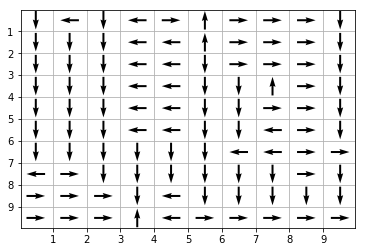

In [54]:
#Q23
optimalAction_max_lamda2 = np.zeros(height * width)
calOptimalAction(optimalAction_max_lamda2, tp,extracted_reward_max_lamda2 , Vs_max_lamda2, discount)
optimalAction_max_lamda2_2d = optimalAction_max_lamda2.reshape((height, width))
arrows_max_lamda2 = action2Arrow(optimalAction_max_lamda2, arrows)
path_max_lamda2 = np.array(arrows_max_lamda2).reshape((height,width)).T
# print(tabulate(optimalAction_max_lamda2_2d.T,  tablefmt='fancy_grid'))
print_path(path_max_lamda2)